# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:45:23.210539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:45:26.069227
2025-04-14 22:45:26.069227


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:45:19"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

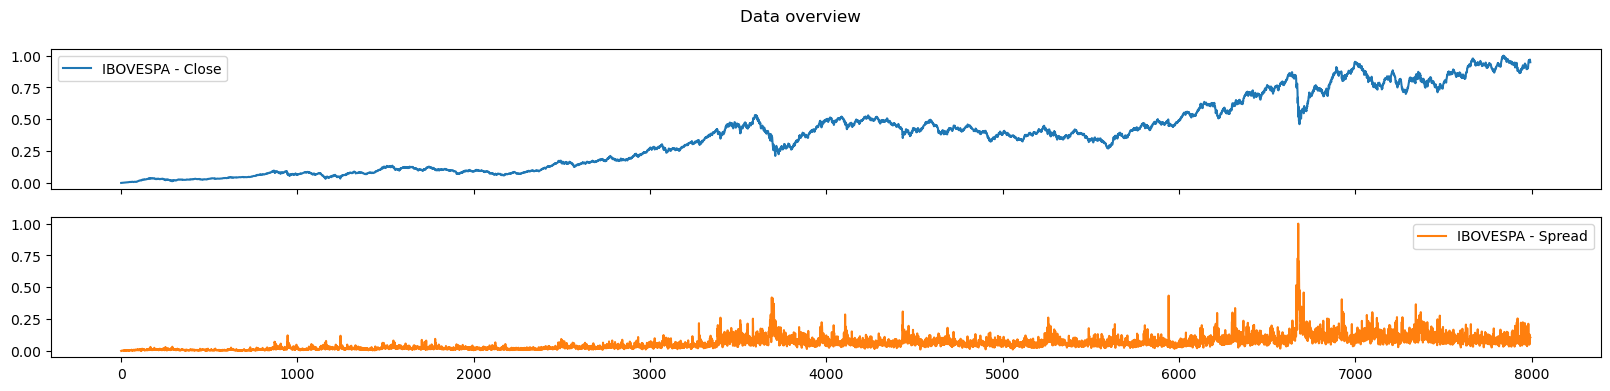

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

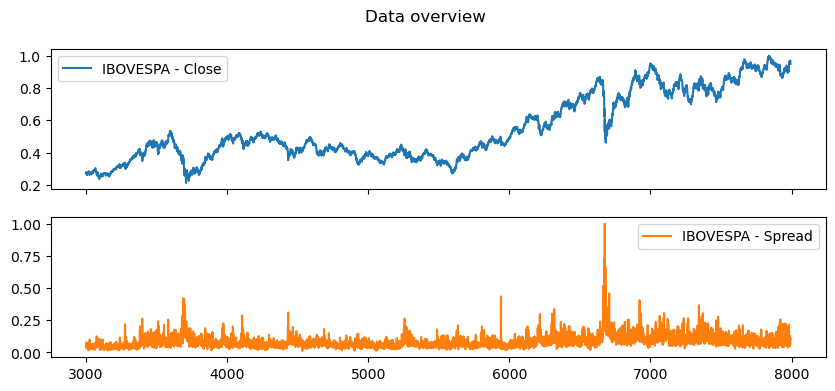

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

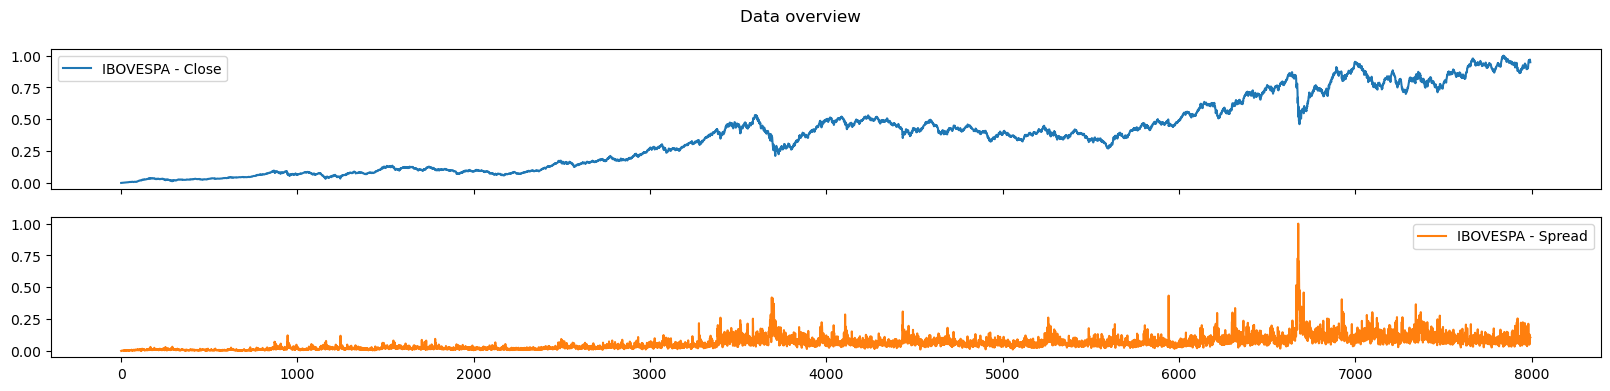

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

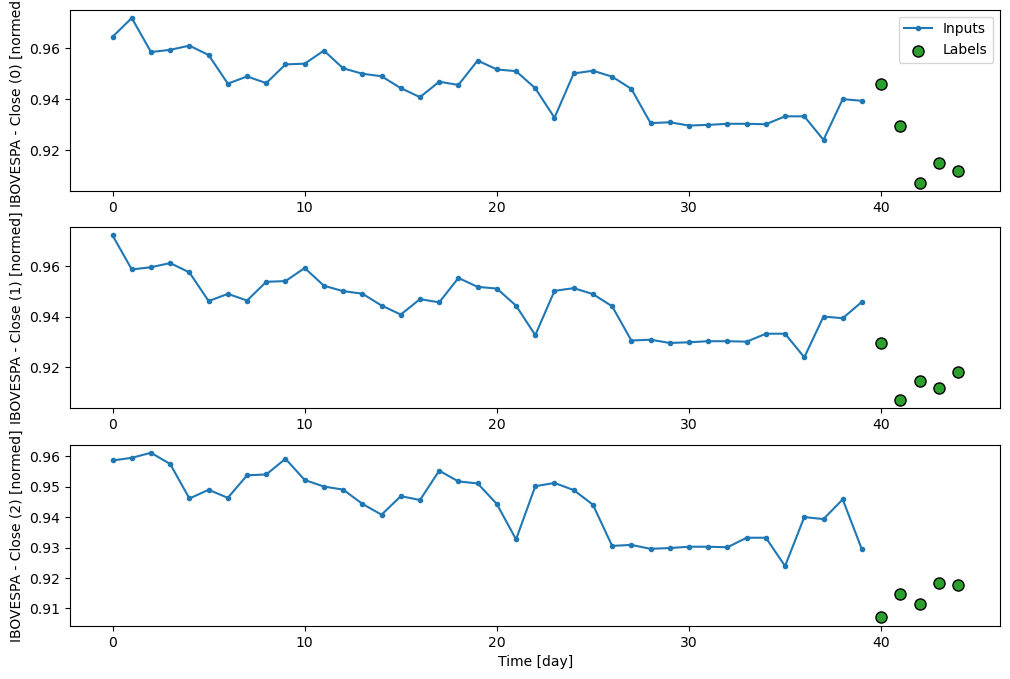

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12:42 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 74.8395 - mean_squared_error: 6.6282e-05 - root_mean_squared_error: 0.0079  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 64.3212 - mean_squared_error: 7.4885e-05 - root_mean_squared_error: 0.0085

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 56.7644 - mean_squared_error: 7.2979e-05 - root_mean_squared_error: 0.0084

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 51.3833 - mean_squared_error: 6.9256e-05 - root_mean_squared_error: 0.0082

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 47.1543 - mean_squared_error: 6.5216e-05 - root_mean_squared_error: 0.0080

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 43.8956 - mean_squared_error: 6.1893e-05 - root_mean_squared_error: 0.0078

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 41.2751 - mean_squared_error: 5.9051e-05 - root_mean_squared_error: 0.0076

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 40.1235 - mean_squared_error: 5.7762e-05 - root_mean_squared_error: 0.0075

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.0657 - mean_squared_error: 5.5373e-05 - root_mean_squared_error: 0.0073

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 36.2591 - mean_squared_error: 5.3196e-05 - root_mean_squared_error: 0.0072

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.4393 - mean_squared_error: 5.2191e-05 - root_mean_squared_error: 0.0071

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 34.6644 - mean_squared_error: 5.1229e-05 - root_mean_squared_error: 0.0070

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 33.9579 - mean_squared_error: 5.0545e-05 - root_mean_squared_error: 0.0070

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 33.3170 - mean_squared_error: 5.0240e-05 - root_mean_squared_error: 0.0070

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 32.7276 - mean_squared_error: 5.0238e-05 - root_mean_squared_error: 0.0070

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 32.1821 - mean_squared_error: 5.0600e-05 - root_mean_squared_error: 0.0070

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.2018 - mean_squared_error: 5.1988e-05 - root_mean_squared_error: 0.0071

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 30.7827 - mean_squared_error: 5.3402e-05 - root_mean_squared_error: 0.0072

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 30.3945 - mean_squared_error: 5.4883e-05 - root_mean_squared_error: 0.0073

 32/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 29.6681 - mean_squared_error: 5.7718e-05 - root_mean_squared_error: 0.0075

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 29.0044 - mean_squared_error: 6.0377e-05 - root_mean_squared_error: 0.0076

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 28.4921 - mean_squared_error: 6.4230e-05 - root_mean_squared_error: 0.0078 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 28.0687 - mean_squared_error: 6.8236e-05 - root_mean_squared_error: 0.0080

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 27.7263 - mean_squared_error: 7.3422e-05 - root_mean_squared_error: 0.0083

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 27.4658 - mean_squared_error: 8.0528e-05 - root_mean_squared_error: 0.0086

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 27.3473 - mean_squared_error: 8.4001e-05 - root_mean_squared_error: 0.0088

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.1198 - mean_squared_error: 9.0647e-05 - root_mean_squared_error: 0.0090

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 27.0048 - mean_squared_error: 9.3741e-05 - root_mean_squared_error: 0.0092

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 27.0379 - mean_squared_error: 1.8104e-04 - root_mean_squared_error: 0.0104

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.0683 - mean_squared_error: 2.6322e-04 - root_mean_squared_error: 0.0115

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.0910 - mean_squared_error: 3.4044e-04 - root_mean_squared_error: 0.0125

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 27.1106 - mean_squared_error: 4.1326e-04 - root_mean_squared_error: 0.0136

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.1316 - mean_squared_error: 5.4647e-04 - root_mean_squared_error: 0.0154

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 27.1201 - mean_squared_error: 6.6452e-04 - root_mean_squared_error: 0.0171

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 27.0954 - mean_squared_error: 7.6978e-04 - root_mean_squared_error: 0.0187

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 27.0701 - mean_squared_error: 8.6419e-04 - root_mean_squared_error: 0.0201

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 27.0601 - mean_squared_error: 9.4959e-04 - root_mean_squared_error: 0.0213

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 27.0332 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0225    

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 26.9927 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0236

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.9480 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0246

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 26.9054 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0255

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 26.8534 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0263

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 26.7744 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0274

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 26.7237 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0281

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 26.6775 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0287

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 26.6279 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0293

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 26.5771 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0299

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 26.4884 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0306

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 26.3881 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0313

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 26.3132 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0317

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 26.1926 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0323

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 26.1090 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0326

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 26.0259 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0330

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 25.9027 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0334

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 25.8213 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0337

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 25.7054 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0342

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 25.5924 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0346

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 25.5220 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 25.4163 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0355

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 25.3444 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 25.2796 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 25.1906 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 25.1307 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 25.0468 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 24.9719 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0382

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 24.9229 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0386

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 24.8454 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 24.7654 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0397

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 24.7094 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 24.6220 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 24.5347 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0409

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 24.4761 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0412

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 24.3853 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 24.2914 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 24.2280 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 24.1323 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 24.0675 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 24.0021 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 23.9369 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 23.8722 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0434

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 23.8073 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 23.7422 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 23.6440 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 23.5474 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 23.4840 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 23.3905 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 23.3307 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 23.2730 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 23.2170 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 23.1621 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 23.1084 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 23.0550 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 22.9756 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 22.9248 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 22.8486 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 22.7728 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 22.7224 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 22.6462 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 22.5750 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 22.5289 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 22.4599 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 22.3929 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 22.3492 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 22.2835 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 22.2395 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 22.1953 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 22.1292 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 22.0852 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 22.0410 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 21.9965 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 21.9524 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501 - val_loss: 0.0170 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 1.8018 - val_mean_squared_error: 4.9461e-04 - val_root_mean_squared_error: 0.0222 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.5952 - mean_absolute_error: 0.5952 - mean_absolute_percentage_error: 7996.0957 - mean_squared_error: 0.3542 - root_mean_squared_error: 0.5952

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5895 - mean_absolute_error: 0.5895 - mean_absolute_percentage_error: 6106.7773 - mean_squared_error: 0.3476 - root_mean_squared_error: 0.5896 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5824 - mean_absolute_error: 0.5824 - mean_absolute_percentage_error: 5292.2583 - mean_squared_error: 0.3396 - root_mean_squared_error: 0.5826

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5691 - mean_absolute_error: 0.5691 - mean_absolute_percentage_error: 4572.3213 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5699

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5600 - mean_absolute_error: 0.5600 - mean_absolute_percentage_error: 4136.4580 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5694

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5571 - mean_absolute_error: 0.5571 - mean_absolute_percentage_error: 3925.5630 - mean_squared_error: 0.3392 - root_mean_squared_error: 0.5803

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5478 - mean_absolute_error: 0.5478 - mean_absolute_percentage_error: 3729.5818 - mean_squared_error: 0.3424 - root_mean_squared_error: 0.5833

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5362 - mean_absolute_error: 0.5362 - mean_absolute_percentage_error: 3552.1030 - mean_squared_error: 0.3406 - root_mean_squared_error: 0.5819

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5229 - mean_absolute_error: 0.5229 - mean_absolute_percentage_error: 3389.4829 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5778

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5091 - mean_absolute_error: 0.5091 - mean_absolute_percentage_error: 3241.3682 - mean_squared_error: 0.3294 - root_mean_squared_error: 0.5721

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 3106.6165 - mean_squared_error: 0.3223 - root_mean_squared_error: 0.5656

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4766 - mean_absolute_error: 0.4766 - mean_absolute_percentage_error: 2925.9678 - mean_squared_error: 0.3111 - root_mean_squared_error: 0.5551

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 2817.9482 - mean_squared_error: 0.3037 - root_mean_squared_error: 0.5479

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 2671.6592 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5371

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4370 - mean_absolute_error: 0.4370 - mean_absolute_percentage_error: 2583.2859 - mean_squared_error: 0.2857 - root_mean_squared_error: 0.5300

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4269 - mean_absolute_error: 0.4269 - mean_absolute_percentage_error: 2501.3457 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5230

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2388.9995 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.5129

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 2320.2231 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.5064

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 2225.0491 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4969

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3826 - mean_absolute_error: 0.3826 - mean_absolute_percentage_error: 2166.3354 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4909

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 2111.0166 - mean_squared_error: 0.2437 - root_mean_squared_error: 0.4850

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3675 - mean_absolute_error: 0.3675 - mean_absolute_percentage_error: 2058.7837 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4794

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 2009.3782 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4739

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1962.5765 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4686

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1918.1764 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4634

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1875.9905 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4584

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1835.8546 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4536

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1779.1930 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4466

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1743.5896 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4421

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1709.5865 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4377

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1661.3510 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4314

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1630.8833 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4274

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1601.6647 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4235

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1573.6107 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4196

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1546.6488 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4159

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1508.1151 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.4105

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1483.6115 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.4071

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1448.4998 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.4020

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1415.2227 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3972

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1393.9833 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3940

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1373.4559 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3910

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1343.9174 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3865

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1325.0154 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3836

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1297.7651 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3794

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1280.2909 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3767

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1255.0579 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3727

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1238.8503 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3702

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1223.1094 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3677

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1200.3282 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3640

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1185.6733 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3616

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1164.4539 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3582

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1150.7804 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3559

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1137.4701 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3537

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1124.5107 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3516

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1111.8879 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3495

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1099.5862 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3475

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1087.5900 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3455

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1070.1389 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3426

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1058.8521 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3408

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1047.8337 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3389

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 1037.0769 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3371

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1026.5708 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3353

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1016.3023 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3336

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1006.2626 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3319

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 991.6151 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3293 

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 982.1151 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3277

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 968.2441 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3253

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 959.2387 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3237

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 950.4192 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3221

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 941.7805 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3206

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 933.3163 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3191

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 925.0214 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3176

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 916.8906 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3161

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 904.9909 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3140

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 897.2481 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3125

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 889.6532 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3111

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 878.5292 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3091

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 871.2858 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.3077

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 860.6708 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.3057

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 853.7560 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.3045

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 846.9662 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.3032

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 840.2973 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3019

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 833.7458 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.3007

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 824.1313 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2988

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 817.8586 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2976

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 808.6494 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2959

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 799.6702 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2941

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 793.8069 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2930

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 785.1902 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2913

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 776.7798 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2896

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 771.2861 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2886

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 765.8803 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2875

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 760.5591 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2865

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 755.3205 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2854

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 750.1626 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2844

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 742.5734 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2829

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 735.1541 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2814

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 730.2994 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2805

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 723.1505 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2790

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 716.1562 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2776

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 711.5767 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2767

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 704.8289 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2753

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 700.4171 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2744 - val_loss: 0.0448 - val_mean_absolute_error: 0.0448 - val_mean_absolute_percentage_error: 4.7344 - val_mean_squared_error: 0.0024 - val_root_mean_squared_error: 0.0495 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.5912 - mean_absolute_error: 0.5912 - mean_absolute_percentage_error: 7943.6787 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5912

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5885 - mean_absolute_error: 0.5885 - mean_absolute_percentage_error: 6628.7861 - mean_squared_error: 0.3463 - root_mean_squared_error: 0.5885 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5793 - mean_absolute_error: 0.5793 - mean_absolute_percentage_error: 5260.6157 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5795

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 4742.5850 - mean_squared_error: 0.3275 - root_mean_squared_error: 0.5721

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5627 - mean_absolute_error: 0.5627 - mean_absolute_percentage_error: 4383.3320 - mean_squared_error: 0.3181 - root_mean_squared_error: 0.5636

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 4098.6846 - mean_squared_error: 0.3076 - root_mean_squared_error: 0.5538

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5323 - mean_absolute_error: 0.5323 - mean_absolute_percentage_error: 3748.6904 - mean_squared_error: 0.2903 - root_mean_squared_error: 0.5371

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5164 - mean_absolute_error: 0.5164 - mean_absolute_percentage_error: 3546.5310 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5250

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4921 - mean_absolute_error: 0.4921 - mean_absolute_percentage_error: 3282.8193 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.5072

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4683 - mean_absolute_error: 0.4683 - mean_absolute_percentage_error: 3056.8982 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4902

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4532 - mean_absolute_error: 0.4532 - mean_absolute_percentage_error: 2923.9275 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4796

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 2803.0571 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4696

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4254 - mean_absolute_error: 0.4254 - mean_absolute_percentage_error: 2692.7122 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4601

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 2544.2661 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4468

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 2412.9741 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4345

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2333.5493 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4269

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 2224.8269 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4161

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 2158.4482 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.4094

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 2096.3857 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.4030

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 2038.2164 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3969

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1983.5814 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3911

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1907.5522 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3828

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1860.4147 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3776

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1815.8324 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3726

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1753.2985 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3655

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1714.2433 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3609

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1677.1038 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3566

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1641.7408 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3524

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1591.7551 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3464

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1560.3037 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3425

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1530.2286 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3388

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1501.4354 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3353

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1460.4681 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3301

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1421.9476 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3252

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1397.5195 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3220

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1374.0199 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3190

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1351.3962 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3160

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1329.5962 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3131

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1298.3448 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3090

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 1278.4124 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3063

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1259.1578 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3037

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1231.4691 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2999

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1213.7595 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2974

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1196.6127 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2950

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1180.0018 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2927

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1156.0344 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2893

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 1133.1339 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2861

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 1118.4242 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2840

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 1097.1454 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2809

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 1083.4612 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2789

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 1070.1560 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2769

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 1057.2140 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2750

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1044.6222 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2732

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 1032.3668 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2714

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 1020.4331 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2696

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 1008.8060 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2679

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 997.4719 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2662 

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 986.4195 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2645

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 975.6385 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2629

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 959.9532 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2605

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 949.8062 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2590

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1698 - mean_absolute_error: 0.1698 - mean_absolute_percentage_error: 935.0289 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2567

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 920.7603 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2545

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 911.5157 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2530

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 898.0312 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2509

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 884.9869 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2489

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 876.5259 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2475

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 864.1693 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2456

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 852.1967 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2437

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 844.4197 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2424

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 836.8005 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2412

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 829.3333 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2400

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 822.0133 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2388

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 814.8365 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2376

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 807.7996 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2364

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 797.4979 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2348

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 790.7915 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2336

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 780.9659 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2320

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 771.4113 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2304

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 765.1857 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2294

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 756.0552 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2278

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 747.1642 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2263

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 741.3657 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2254

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 732.8548 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2239

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 724.5590 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2225

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 719.1437 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2216

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 713.8181 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2206

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 708.5793 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2197

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 700.8812 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2184

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 695.8536 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2175

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 690.9060 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2167

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 686.0364 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2158

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 681.2430 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2150

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 674.1920 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2138

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 669.5810 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2130

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 662.7950 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2118

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 656.1605 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2107

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 651.8192 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2099

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 645.4263 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2088

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 639.1712 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2077

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 635.0823 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2069 - val_loss: 0.0169 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 1.8337 - val_mean_squared_error: 4.1922e-04 - val_root_mean_squared_error: 0.0205 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 4714.9946 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3510

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.3467 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 3595.4639 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3468 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 3113.2795 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3421

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 2679.4253 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3325

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 2477.3958 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.3245

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 2304.7549 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.3155

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 2156.7434 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.3065

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 2029.8376 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2980

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1867.4862 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2861

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1774.3977 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2788

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1691.0468 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2720

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1616.0045 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2656

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1548.0419 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2596

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1457.4009 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2514

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1403.3267 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2463

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1330.2079 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2393

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1286.0509 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2349

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1245.0852 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2307

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 1188.8804 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2249

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 1154.4857 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2213

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1106.9124 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2162

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 1063.5724 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2114

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 1036.7487 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2084

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 999.2589 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2042 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 964.7081 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2002

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 943.1357 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1976

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 912.7451 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1940

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 893.6857 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1917

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 875.5090 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1895

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 849.7640 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1863

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 833.5303 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1843

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 810.4496 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1814

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 795.8456 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1795

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 781.8229 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1777

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 761.8020 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1751

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 749.0827 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1735

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 730.8741 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1710

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 719.2772 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1695

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 708.0862 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1680

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 697.2794 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1665

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 686.8366 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1651

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 676.7390 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 666.9689 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1623

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 652.8923 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1604

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 639.4657 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1585

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 630.8531 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1572

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 618.4110 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1555

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 606.5064 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1538

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 598.8522 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1526

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 587.7692 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1510

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 577.1359 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1495

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 570.2830 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1484

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 560.3378 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1469

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 553.9202 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1460

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 547.6647 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1450

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 538.5716 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1437

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 532.6943 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1428

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 524.1421 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1414

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 515.8911 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1402

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 510.5496 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1393

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 505.3305 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1385

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 500.2291 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1377

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 492.7888 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1365

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 487.9643 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1358

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 480.9220 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1346

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 474.1025 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1336

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 469.6746 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1328

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 463.2028 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1318

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 456.9271 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1308

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 452.8475 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1301

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 446.8781 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1291

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 441.0815 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1282

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 437.3096 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1275

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 431.7848 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1266

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 428.1872 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1260

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 424.6558 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1254

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 421.1887 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1248

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 417.7842 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1242

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 412.7908 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1234

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 407.9286 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1226

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 404.7577 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1220

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 400.1030 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1212

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 395.5662 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1204

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 392.6047 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1199

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 388.2537 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1192

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 384.0092 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1184

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 381.2364 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1179

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 378.5078 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1175

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 375.8223 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1170

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 371.8727 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1163

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 368.0141 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1156

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 365.4909 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1152

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 361.7773 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1145

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 359.3478 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1141

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 356.9543 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1137

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 354.5958 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1132

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 352.2718 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1128

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 348.8521 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1122 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.3800 - val_mean_squared_error: 2.7616e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 2037.6007 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1523

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 1523.2219 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1449 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1210.0957 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1340

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1072.3671 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1268

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 932.8365 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1188 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 864.0608 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1145

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 806.0623 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1106

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 757.1075 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1071

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 715.0219 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1039

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 661.1528 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0997

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 630.2579 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0972

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 602.4976 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0949

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 577.4203 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0927

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 554.6429 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0907

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 524.0762 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0879

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 505.7673 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0862

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 480.9052 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0839

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 458.6835 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0817

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 445.1234 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0803

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 432.4448 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0790

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 420.5639 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0778

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 404.0746 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0761

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 388.9908 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0745

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 379.6268 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0735

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 366.5048 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 358.3152 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0711

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 350.5306 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0702

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 343.1216 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 336.0621 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 326.0711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 319.7766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 310.8336 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 302.4382 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0645

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 297.1213 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0639

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 289.5316 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0630

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 284.7104 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 280.0673 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 273.4149 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 267.1097 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 263.0853 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 257.2991 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 253.5984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 250.0157 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 246.5453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 241.5387 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 238.3264 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 235.2092 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 230.7019 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 226.3871 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 223.6107 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 220.9101 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 218.2820 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 215.7233 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 213.2311 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 210.8028 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 208.4359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 206.1278 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 202.7710 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 200.6006 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 197.4411 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 194.3915 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 192.4165 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 190.4861 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 187.6705 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 185.8448 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0490

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 183.1799 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 181.4504 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 179.7572 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 178.0990 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 176.4749 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 174.8837 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 172.5565 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 170.2976 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 168.1042 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0464

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 166.6770 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 164.5864 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 163.2250 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0457

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 161.2296 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0453

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 159.9294 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 158.6525 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0449

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 157.3982 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0448

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 156.1659 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0446

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 154.9551 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0444

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 153.7651 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 152.5956 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 151.4459 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 149.7572 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 148.6547 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0434

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 147.5704 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 145.9778 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 144.9374 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 143.4083 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0426

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 141.9153 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 140.9394 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 139.5037 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 138.1006 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 137.1827 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0418

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 135.8314 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0416

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 134.5098 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 133.2184 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187 - val_mean_absolute_percentage_error: 1.9856 - val_mean_squared_error: 5.0950e-04 - val_root_mean_squared_error: 0.0226 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1120.0468 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 825.2384 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0791  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 645.1721 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 574.6779 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 502.6237 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 449.9476 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 422.0600 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0581

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 387.1477 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 367.4275 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 349.9352 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 327.0542 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 313.6547 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 301.4830 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 290.3746 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0477

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 280.1855 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 270.8362 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 262.1984 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 254.1986 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 246.7543 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 236.5062 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 230.2110 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 221.4597 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 213.4387 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 208.4545 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 201.4638 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 197.0989 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 192.9469 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 188.9914 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 185.2195 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 179.8760 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 174.8732 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 171.7111 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 168.6774 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 164.3528 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 160.2778 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 157.6885 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 153.9809 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 150.4702 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 148.2315 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 145.0139 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 141.9568 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 140.0002 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 137.1801 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 134.4879 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 132.7601 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 130.2620 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 127.8703 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.3330 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 124.1058 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 122.6709 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 121.2739 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 119.2453 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 117.9359 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.6588 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 114.8013 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 113.5999 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.8507 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.7183 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 109.0677 - mean_squared_error: 9.9026e-04 - root_mean_squared_error: 0.0288

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.4722 - mean_squared_error: 9.7842e-04 - root_mean_squared_error: 0.0286

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.4377 - mean_squared_error: 9.7073e-04 - root_mean_squared_error: 0.0285

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.9279 - mean_squared_error: 9.5947e-04 - root_mean_squared_error: 0.0283

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 103.9483 - mean_squared_error: 9.5217e-04 - root_mean_squared_error: 0.0282

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.9894 - mean_squared_error: 9.4501e-04 - root_mean_squared_error: 0.0281

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 101.5883 - mean_squared_error: 9.3453e-04 - root_mean_squared_error: 0.0279

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 100.6780 - mean_squared_error: 9.2769e-04 - root_mean_squared_error: 0.0278

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 99.7860 - mean_squared_error: 9.2098e-04 - root_mean_squared_error: 0.0277 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 98.9119 - mean_squared_error: 9.1441e-04 - root_mean_squared_error: 0.0276

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.0552 - mean_squared_error: 9.0795e-04 - root_mean_squared_error: 0.0275

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.2152 - mean_squared_error: 9.0161e-04 - root_mean_squared_error: 0.0274

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.3915 - mean_squared_error: 8.9539e-04 - root_mean_squared_error: 0.0273

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 95.5835 - mean_squared_error: 8.8927e-04 - root_mean_squared_error: 0.0272

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 94.7910 - mean_squared_error: 8.8327e-04 - root_mean_squared_error: 0.0272

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 93.6303 - mean_squared_error: 8.7451e-04 - root_mean_squared_error: 0.0270

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 92.5016 - mean_squared_error: 8.6599e-04 - root_mean_squared_error: 0.0269

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 91.7664 - mean_squared_error: 8.6046e-04 - root_mean_squared_error: 0.0268

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.6881 - mean_squared_error: 8.5233e-04 - root_mean_squared_error: 0.0267

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 89.6385 - mean_squared_error: 8.4445e-04 - root_mean_squared_error: 0.0265

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 88.9539 - mean_squared_error: 8.3930e-04 - root_mean_squared_error: 0.0265

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 88.2812 - mean_squared_error: 8.3427e-04 - root_mean_squared_error: 0.0264

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 87.6201 - mean_squared_error: 8.2935e-04 - root_mean_squared_error: 0.0263

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 86.6495 - mean_squared_error: 8.2221e-04 - root_mean_squared_error: 0.0262

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 85.7033 - mean_squared_error: 8.1534e-04 - root_mean_squared_error: 0.0261

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 85.0856 - mean_squared_error: 8.1088e-04 - root_mean_squared_error: 0.0260

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 84.4778 - mean_squared_error: 8.0650e-04 - root_mean_squared_error: 0.0260

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 83.8799 - mean_squared_error: 8.0222e-04 - root_mean_squared_error: 0.0259

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 83.2919 - mean_squared_error: 7.9822e-04 - root_mean_squared_error: 0.0258

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 82.4274 - mean_squared_error: 7.9239e-04 - root_mean_squared_error: 0.0257

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 81.8624 - mean_squared_error: 7.8861e-04 - root_mean_squared_error: 0.0257

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 81.0314 - mean_squared_error: 7.8315e-04 - root_mean_squared_error: 0.0256

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 80.2194 - mean_squared_error: 7.7787e-04 - root_mean_squared_error: 0.0255

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 79.6883 - mean_squared_error: 7.7444e-04 - root_mean_squared_error: 0.0255

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 78.9066 - mean_squared_error: 7.6946e-04 - root_mean_squared_error: 0.0254

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 78.3952 - mean_squared_error: 7.6623e-04 - root_mean_squared_error: 0.0254

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 77.6420 - mean_squared_error: 7.6149e-04 - root_mean_squared_error: 0.0253

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 76.9051 - mean_squared_error: 7.5686e-04 - root_mean_squared_error: 0.0252

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 76.4226 - mean_squared_error: 7.5384e-04 - root_mean_squared_error: 0.0252

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 75.7124 - mean_squared_error: 7.4939e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1154 - val_mean_squared_error: 1.7990e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1461.5714 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1093

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 1080.1906 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1018 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 912.2126 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0953 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 750.2548 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0869

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 681.2134 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0829

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 627.5330 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0797

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 604.1923 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0782

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 563.3909 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0754

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 513.9227 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0719

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 473.7361 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0689

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 450.8582 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0671

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 420.9636 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0647

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 403.4727 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0632

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 387.6063 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0618

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 373.1142 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 359.8265 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0594

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 341.8570 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0577

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 330.9909 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 320.8908 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 311.4741 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 302.6686 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 294.4140 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 286.6583 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 275.8574 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 269.1575 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 259.7758 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 253.9244 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 248.3656 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 240.5291 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 235.6128 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 228.6554 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 222.1529 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 218.0462 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 214.1081 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 210.3288 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 206.6983 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 201.5114 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 198.2144 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 193.4923 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 189.0194 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 186.1652 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 182.0635 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 178.1621 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 175.6653 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 172.0651 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 169.7565 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 167.5172 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 164.2809 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 162.2012 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 159.1956 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 156.3155 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 154.4621 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 151.7762 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 150.0440 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 148.3567 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 145.9062 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 143.5457 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 142.0196 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 139.7981 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 138.3603 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 136.9555 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.9082 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.5812 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 132.2833 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.3892 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 129.1602 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.3648 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 126.1989 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 125.0568 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 123.9382 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 122.8425 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 121.7685 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 120.7155 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 119.1741 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 118.1714 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 116.7029 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.7467 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 114.8081 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 113.4323 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 112.5357 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 111.2211 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 110.3641 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 109.5221 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 108.6948 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 107.8814 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 106.6869 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 105.9070 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 104.7608 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 103.6431 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 102.9129 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 102.1945 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 101.1381 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 100.4474 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 99.4315 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.4387 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 97.7894 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 96.8334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 96.2079 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 95.2868 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 94.3864 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228 - val_mean_absolute_percentage_error: 2.4153 - val_mean_squared_error: 6.7307e-04 - val_root_mean_squared_error: 0.0259 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 2075.7544 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1548

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1562.4655 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1492 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1255.6147 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1408

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1064.2106 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1313

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 973.6276 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1261 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 873.8235 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1201

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 797.3849 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1150

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 754.5166 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1119

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 700.2820 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1079

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 654.6738 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1043

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 627.8297 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1021

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 592.1553 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0991

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 570.8699 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0973

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 542.1127 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0947

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 516.5627 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0923

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 501.0192 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0908

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 479.6030 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0887

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 460.1754 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0868

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 448.1879 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0855

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 431.4815 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0838

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 421.1077 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0827

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 411.2850 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0816

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 401.9694 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0806

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 393.1220 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0796

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 380.6490 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0782

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 369.0419 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0769

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 361.7410 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0760

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 351.3850 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0748

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 341.6788 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0736

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 335.5379 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0729

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 326.7816 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0718

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 318.5282 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0708

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 313.2827 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0701

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 305.7709 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0692

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 298.6555 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0683

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 294.1162 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 287.5923 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 283.4220 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 277.4166 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 271.6918 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0647

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 268.0210 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0642

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 262.7205 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 259.3167 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 256.0110 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 251.2280 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 248.1513 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 243.6933 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 239.4126 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 236.6517 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 232.6422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 228.7828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 226.2888 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 222.6603 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 220.3132 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 218.0212 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 215.7823 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 213.5947 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 210.4056 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 207.3217 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 205.3215 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 202.4016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 200.5063 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 198.6503 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 196.8326 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 195.0518 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 193.3071 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 191.5974 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 189.9213 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 187.4681 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0527

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 185.0852 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 183.5342 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 182.0123 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 180.5184 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 179.0519 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 176.9016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 175.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 173.4438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 172.1028 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 170.1346 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 168.2165 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 166.9646 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 165.7335 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 163.9244 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0490

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 162.7429 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 161.0065 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 159.8717 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 158.2030 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 156.5730 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 155.5071 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 153.9386 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 152.9124 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 151.9016 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 150.9056 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 149.9242 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 148.4785 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0466

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 147.0653 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0999 - val_mean_squared_error: 1.6725e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 1185.8728 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 877.9614 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 690.4107 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0763

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 612.7521 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 536.6504 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 482.4290 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 439.9713 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 416.5897 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 386.4584 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0582

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 369.1322 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 346.2676 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 326.4985 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 314.6972 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 298.7462 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0510

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 284.5661 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 275.9394 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 264.0586 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0477

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 253.2856 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 246.6441 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 240.3877 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 234.4839 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 228.9019 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 223.6149 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 218.5993 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 211.5411 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 204.9856 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 200.8701 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 196.9413 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 193.1869 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 189.5927 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 184.4790 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 181.2414 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 176.6218 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 172.2630 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 169.4908 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 166.8187 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 164.2413 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 160.5412 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 157.0265 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 154.7796 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 151.5436 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 148.4579 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 146.4790 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 143.6208 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 141.7848 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 139.1290 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 136.5871 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 134.9511 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 132.5809 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 130.3052 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 128.8368 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 126.7049 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 124.6520 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 123.3248 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 121.3932 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 119.5294 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 118.3225 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 116.5632 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 114.8621 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.7588 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 112.6793 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.6228 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.5886 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 109.5759 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.5838 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.1334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.1909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 104.8120 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.4731 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.6018 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.3261 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.0862 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.2785 - mean_squared_error: 9.9655e-04 - root_mean_squared_error: 0.0286

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.0946 - mean_squared_error: 9.8633e-04 - root_mean_squared_error: 0.0285

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 97.3229 - mean_squared_error: 9.7967e-04 - root_mean_squared_error: 0.0284

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.1912 - mean_squared_error: 9.6995e-04 - root_mean_squared_error: 0.0282

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.0891 - mean_squared_error: 9.6055e-04 - root_mean_squared_error: 0.0281

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.3704 - mean_squared_error: 9.5449e-04 - root_mean_squared_error: 0.0280

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.3155 - mean_squared_error: 9.4566e-04 - root_mean_squared_error: 0.0278

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.2870 - mean_squared_error: 9.3711e-04 - root_mean_squared_error: 0.0277

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.6155 - mean_squared_error: 9.3155e-04 - root_mean_squared_error: 0.0276

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.6288 - mean_squared_error: 9.2339e-04 - root_mean_squared_error: 0.0275

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.6662 - mean_squared_error: 9.1563e-04 - root_mean_squared_error: 0.0274

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.0373 - mean_squared_error: 9.1064e-04 - root_mean_squared_error: 0.0273

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.1127 - mean_squared_error: 9.0336e-04 - root_mean_squared_error: 0.0272

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.5084 - mean_squared_error: 8.9866e-04 - root_mean_squared_error: 0.0271

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 86.6194 - mean_squared_error: 8.9181e-04 - root_mean_squared_error: 0.0271

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 85.7507 - mean_squared_error: 8.8516e-04 - root_mean_squared_error: 0.0270

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 84.9016 - mean_squared_error: 8.7876e-04 - root_mean_squared_error: 0.0269

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 84.3461 - mean_squared_error: 8.7460e-04 - root_mean_squared_error: 0.0268

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 83.5283 - mean_squared_error: 8.6851e-04 - root_mean_squared_error: 0.0267

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 82.7281 - mean_squared_error: 8.6256e-04 - root_mean_squared_error: 0.0266

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 82.2044 - mean_squared_error: 8.5870e-04 - root_mean_squared_error: 0.0266

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 81.4335 - mean_squared_error: 8.5303e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2302 - val_mean_squared_error: 2.0299e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1418.1331 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1064

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1164.8309 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1032 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 901.8619 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 745.4980 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0885

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 676.2109 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0846

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 600.8774 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 543.4896 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0760

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 512.3378 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0738

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 473.1819 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0709

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 440.3829 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0682

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 421.3098 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0667

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 396.0027 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0645

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 381.0139 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0632

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 367.2704 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0620

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 348.7054 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0602

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 337.4951 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 322.1514 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0577

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 312.7826 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 299.8414 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 288.0724 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 280.7935 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 270.6291 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 261.2697 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 255.4296 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 247.2062 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 239.5635 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 234.7610 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 230.1727 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 225.7837 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 221.5807 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 217.5512 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 213.6851 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 209.9727 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 208.1709 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 206.4039 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 204.6705 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 202.9697 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 199.6628 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 196.4760 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 193.4026 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 190.4362 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 187.5712 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 184.8023 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 182.1246 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 179.5332 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 177.0239 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 174.5925 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 172.2357 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 169.9499 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 167.7321 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 165.5788 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 163.4875 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 161.4566 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 159.4824 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 157.5625 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 155.6942 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 154.7788 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 152.9840 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 151.2356 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 149.5318 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 147.8708 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 146.2511 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 144.6708 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 143.8950 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 143.1286 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 141.6234 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 140.1536 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 138.7183 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 137.3158 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 135.9451 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 134.6049 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 133.2941 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 132.0118 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 130.7570 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 129.5289 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 128.3265 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 127.1489 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 125.9956 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 124.8657 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 123.7587 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 123.2135 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 122.1390 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 121.6097 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 121.0855 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 120.0524 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 119.0392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 117.5553 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 116.5890 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 115.1728 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 113.7950 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 112.8971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 111.5799 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 110.2972 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 109.4606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 108.6382 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 107.8297 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 106.6420 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 105.8665 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 105.1037 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 104.3534 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 103.6152 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.8887 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.1736 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 101.4698 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 100.7768 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 100.0944 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 99.4225 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 98.7606 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 98.1087 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 97.7864 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 97.1488 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 96.5206 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 95.9015 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 94.9904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2416 - val_mean_squared_error: 2.0270e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1295.3761 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1062.3542 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 885.9294 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 764.3966 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0847

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 676.7789 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 613.4260 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 543.4391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 506.3431 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0693

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 461.1712 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0660

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 424.5523 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 403.7905 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0614

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 376.7040 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0592

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 360.8755 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0578

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 346.5205 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 333.4189 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 321.4130 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 305.1842 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 295.3745 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 281.9416 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 269.8315 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 262.3965 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 252.0796 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 242.6443 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 236.7884 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 228.5827 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 220.9997 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 216.2539 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 209.5559 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 203.3142 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 199.3825 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 193.7981 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 190.2681 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 185.2399 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 180.5044 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 177.4967 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 173.1925 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 170.4522 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 167.8084 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 165.2559 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 162.7900 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 159.2438 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.9750 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 154.7782 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 151.6103 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 149.5789 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 146.6450 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 144.7605 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 142.9309 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 141.1538 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 139.4265 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.9235 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.3105 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 132.9698 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 130.7188 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 129.2652 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.1518 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 125.1150 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.7978 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 121.8800 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 120.0283 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.8289 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.0794 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 115.3871 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.2893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 113.2146 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.1625 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.6251 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.1349 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.1666 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 106.7498 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.3745 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 104.4797 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 103.1694 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 101.8957 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 101.0661 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 99.8500 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285 

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 98.6665 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 97.8949 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 96.7631 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.6607 - mean_squared_error: 9.9838e-04 - root_mean_squared_error: 0.0279

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 94.9415 - mean_squared_error: 9.9171e-04 - root_mean_squared_error: 0.0278

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 94.2344 - mean_squared_error: 9.8518e-04 - root_mean_squared_error: 0.0277

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 93.5391 - mean_squared_error: 9.7877e-04 - root_mean_squared_error: 0.0276

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 92.8553 - mean_squared_error: 9.7248e-04 - root_mean_squared_error: 0.0275

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 92.1828 - mean_squared_error: 9.6639e-04 - root_mean_squared_error: 0.0274

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.5214 - mean_squared_error: 9.6054e-04 - root_mean_squared_error: 0.0274

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.5492 - mean_squared_error: 9.5195e-04 - root_mean_squared_error: 0.0272

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.9140 - mean_squared_error: 9.4639e-04 - root_mean_squared_error: 0.0272

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.9799 - mean_squared_error: 9.3829e-04 - root_mean_squared_error: 0.0271

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.0675 - mean_squared_error: 9.3044e-04 - root_mean_squared_error: 0.0269

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.4708 - mean_squared_error: 9.2533e-04 - root_mean_squared_error: 0.0269

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.5929 - mean_squared_error: 9.1789e-04 - root_mean_squared_error: 0.0268

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.7347 - mean_squared_error: 9.1067e-04 - root_mean_squared_error: 0.0267

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.1732 - mean_squared_error: 9.0596e-04 - root_mean_squared_error: 0.0266

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 84.3463 - mean_squared_error: 8.9905e-04 - root_mean_squared_error: 0.0265

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.5375 - mean_squared_error: 8.9232e-04 - root_mean_squared_error: 0.0264

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.2723 - mean_squared_error: 8.9012e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1327 - val_mean_squared_error: 1.7645e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 1207.3108 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 988.7339 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 761.7383 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 628.5679 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0742

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 570.8312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 507.0786 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0669

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 473.1320 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0646

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 431.7541 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0616

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 398.1278 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 379.0295 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 354.0912 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0555

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 332.6991 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0536

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 320.0279 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 302.9887 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 287.9294 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 278.8155 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 270.3360 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 262.4231 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 255.0207 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 248.0796 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 238.4406 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 229.6186 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 224.1390 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 216.4560 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 209.3518 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 204.9039 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 198.6245 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 194.6779 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 190.9072 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 185.5535 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 182.1699 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 177.3500 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 172.8123 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 169.9307 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 165.8071 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 161.9046 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 159.4167 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 155.8434 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 153.5607 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 151.3526 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.1720 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.1343 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 143.1944 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 141.3080 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 138.5820 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 135.9737 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 134.2970 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.8688 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 129.5383 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 128.0357 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 125.8545 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 124.4465 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 123.0738 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 121.0776 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.7871 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.9090 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 116.0969 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 114.9235 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 113.2131 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 111.5592 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 110.4865 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.4370 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 108.4097 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.9090 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 105.4545 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.5097 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 103.1279 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 101.7868 - mean_squared_error: 9.8976e-04 - root_mean_squared_error: 0.0281

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.9144 - mean_squared_error: 9.8199e-04 - root_mean_squared_error: 0.0280

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.6374 - mean_squared_error: 9.7064e-04 - root_mean_squared_error: 0.0278 

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 98.3967 - mean_squared_error: 9.5964e-04 - root_mean_squared_error: 0.0276

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 97.5888 - mean_squared_error: 9.5249e-04 - root_mean_squared_error: 0.0275

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 96.4049 - mean_squared_error: 9.4203e-04 - root_mean_squared_error: 0.0274

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.2531 - mean_squared_error: 9.3187e-04 - root_mean_squared_error: 0.0272

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 94.5025 - mean_squared_error: 9.2528e-04 - root_mean_squared_error: 0.0271

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 93.4015 - mean_squared_error: 9.1566e-04 - root_mean_squared_error: 0.0270

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.6836 - mean_squared_error: 9.0943e-04 - root_mean_squared_error: 0.0269

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 91.9784 - mean_squared_error: 9.0338e-04 - root_mean_squared_error: 0.0268

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 90.9430 - mean_squared_error: 8.9452e-04 - root_mean_squared_error: 0.0266

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 90.2673 - mean_squared_error: 8.8878e-04 - root_mean_squared_error: 0.0265

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.2749 - mean_squared_error: 8.8038e-04 - root_mean_squared_error: 0.0264

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.3067 - mean_squared_error: 8.7220e-04 - root_mean_squared_error: 0.0263

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 87.6747 - mean_squared_error: 8.6707e-04 - root_mean_squared_error: 0.0262

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 86.7457 - mean_squared_error: 8.5958e-04 - root_mean_squared_error: 0.0261

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.1387 - mean_squared_error: 8.5473e-04 - root_mean_squared_error: 0.0260

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 85.5413 - mean_squared_error: 8.5001e-04 - root_mean_squared_error: 0.0260

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.9532 - mean_squared_error: 8.4539e-04 - root_mean_squared_error: 0.0259

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.3743 - mean_squared_error: 8.4089e-04 - root_mean_squared_error: 0.0258

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.5225 - mean_squared_error: 8.3429e-04 - root_mean_squared_error: 0.0257

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.9654 - mean_squared_error: 8.3005e-04 - root_mean_squared_error: 0.0257

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.1455 - mean_squared_error: 8.2383e-04 - root_mean_squared_error: 0.0256

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.3437 - mean_squared_error: 8.1780e-04 - root_mean_squared_error: 0.0255

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 80.8189 - mean_squared_error: 8.1385e-04 - root_mean_squared_error: 0.0254

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.0460 - mean_squared_error: 8.0810e-04 - root_mean_squared_error: 0.0254

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.5408 - mean_squared_error: 8.0434e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1821 - val_mean_squared_error: 1.8708e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 1172.3478 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 871.6697 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0832  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 688.7072 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0762

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 610.5784 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 532.5069 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 476.8818 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 446.9454 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 410.0595 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 389.1856 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 362.1922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 346.4562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0544

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 332.2367 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 313.2666 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 301.9367 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 286.6287 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0491

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 273.0151 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 264.7326 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 253.3294 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 242.9930 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 236.6210 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 227.7451 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 219.5964 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 214.5225 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 209.7099 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 205.1374 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 200.7863 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 196.6414 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 190.7786 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 187.0866 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 183.5536 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 178.5293 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 175.3501 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 170.8169 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 166.5421 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 163.8246 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 159.9324 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.2446 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 153.8915 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.5093 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 147.2918 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.2321 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 143.2365 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 141.3024 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 138.5101 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 135.8405 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 134.1250 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 131.6441 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 129.2659 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 127.7339 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 125.5114 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 123.3747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 121.9954 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 119.9904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.6945 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 116.8089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.9902 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 113.8130 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.0977 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.9863 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 109.8996 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.3137 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 106.7788 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.7825 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 104.3267 - mean_squared_error: 9.8866e-04 - root_mean_squared_error: 0.0282

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 102.9156 - mean_squared_error: 9.7628e-04 - root_mean_squared_error: 0.0280

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 101.9988 - mean_squared_error: 9.6827e-04 - root_mean_squared_error: 0.0278

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 100.6579 - mean_squared_error: 9.5654e-04 - root_mean_squared_error: 0.0277

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.3561 - mean_squared_error: 9.4515e-04 - root_mean_squared_error: 0.0275 

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 98.5093 - mean_squared_error: 9.3774e-04 - root_mean_squared_error: 0.0274

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 97.2695 - mean_squared_error: 9.2692e-04 - root_mean_squared_error: 0.0272

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 96.4626 - mean_squared_error: 9.1989e-04 - root_mean_squared_error: 0.0271

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.2801 - mean_squared_error: 9.0959e-04 - root_mean_squared_error: 0.0269

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.1300 - mean_squared_error: 8.9959e-04 - root_mean_squared_error: 0.0268

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.3806 - mean_squared_error: 8.9309e-04 - root_mean_squared_error: 0.0267

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.2814 - mean_squared_error: 8.8356e-04 - root_mean_squared_error: 0.0265

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.2111 - mean_squared_error: 8.7431e-04 - root_mean_squared_error: 0.0264

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 90.5132 - mean_squared_error: 8.6833e-04 - root_mean_squared_error: 0.0263

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.4888 - mean_squared_error: 8.5959e-04 - root_mean_squared_error: 0.0261

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.4905 - mean_squared_error: 8.5117e-04 - root_mean_squared_error: 0.0260

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 87.8388 - mean_squared_error: 8.4569e-04 - root_mean_squared_error: 0.0259

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.8813 - mean_squared_error: 8.3767e-04 - root_mean_squared_error: 0.0258

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.9475 - mean_squared_error: 8.3007e-04 - root_mean_squared_error: 0.0257

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.3377 - mean_squared_error: 8.2520e-04 - root_mean_squared_error: 0.0256

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.4411 - mean_squared_error: 8.1809e-04 - root_mean_squared_error: 0.0255

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 83.5658 - mean_squared_error: 8.1127e-04 - root_mean_squared_error: 0.0254

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.9936 - mean_squared_error: 8.0684e-04 - root_mean_squared_error: 0.0253

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.1517 - mean_squared_error: 8.0038e-04 - root_mean_squared_error: 0.0252

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.3291 - mean_squared_error: 7.9415e-04 - root_mean_squared_error: 0.0251

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.7909 - mean_squared_error: 7.9010e-04 - root_mean_squared_error: 0.0251

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.2608 - mean_squared_error: 7.8614e-04 - root_mean_squared_error: 0.0250

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.7386 - mean_squared_error: 7.8225e-04 - root_mean_squared_error: 0.0249

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.2239 - mean_squared_error: 7.7842e-04 - root_mean_squared_error: 0.0249

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.7168 - mean_squared_error: 7.7468e-04 - root_mean_squared_error: 0.0248

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.9704 - mean_squared_error: 7.6918e-04 - root_mean_squared_error: 0.0247 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1986 - val_mean_squared_error: 1.8894e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 899.3162 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 661.6326 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0633 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 557.0958 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 459.9178 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 418.7123 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0516

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 371.5365 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 335.8659 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0462

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 316.2821 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 291.6107 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 271.0626 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 259.1584 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 243.4107 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 229.7706 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 221.6266 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 210.6133 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 200.8073 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 194.8389 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 186.6158 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 181.5634 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 174.5457 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 168.1215 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 164.1317 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 158.5368 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 153.3628 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 150.1228 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 145.5482 - mean_squared_error: 9.9233e-04 - root_mean_squared_error: 0.0292

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 141.2832 - mean_squared_error: 9.6349e-04 - root_mean_squared_error: 0.0287

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 138.5954 - mean_squared_error: 9.4529e-04 - root_mean_squared_error: 0.0284

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 134.7753 - mean_squared_error: 9.1941e-04 - root_mean_squared_error: 0.0280

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 132.3591 - mean_squared_error: 9.0304e-04 - root_mean_squared_error: 0.0277

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 130.0407 - mean_squared_error: 8.8736e-04 - root_mean_squared_error: 0.0274

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.8137 - mean_squared_error: 8.7229e-04 - root_mean_squared_error: 0.0271

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.6718 - mean_squared_error: 8.5779e-04 - root_mean_squared_error: 0.0269

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 122.6082 - mean_squared_error: 8.3707e-04 - root_mean_squared_error: 0.0265

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 120.6587 - mean_squared_error: 8.2388e-04 - root_mean_squared_error: 0.0263

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 117.8639 - mean_squared_error: 8.0499e-04 - root_mean_squared_error: 0.0259

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.2127 - mean_squared_error: 7.8709e-04 - root_mean_squared_error: 0.0256

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 113.5197 - mean_squared_error: 7.7569e-04 - root_mean_squared_error: 0.0254

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.0841 - mean_squared_error: 7.5931e-04 - root_mean_squared_error: 0.0251

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.5253 - mean_squared_error: 7.4885e-04 - root_mean_squared_error: 0.0249

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.0155 - mean_squared_error: 7.3873e-04 - root_mean_squared_error: 0.0247

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.8376 - mean_squared_error: 7.2419e-04 - root_mean_squared_error: 0.0244

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.4407 - mean_squared_error: 7.1493e-04 - root_mean_squared_error: 0.0242

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.4227 - mean_squared_error: 7.0168e-04 - root_mean_squared_error: 0.0240

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.4920 - mean_squared_error: 6.8915e-04 - root_mean_squared_error: 0.0238

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.2518 - mean_squared_error: 6.8130e-04 - root_mean_squared_error: 0.0236 

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.4564 - mean_squared_error: 6.6998e-04 - root_mean_squared_error: 0.0234

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.7342 - mean_squared_error: 6.5921e-04 - root_mean_squared_error: 0.0232

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 94.6240 - mean_squared_error: 6.5229e-04 - root_mean_squared_error: 0.0231

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.0128 - mean_squared_error: 6.4231e-04 - root_mean_squared_error: 0.0229

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.4630 - mean_squared_error: 6.3276e-04 - root_mean_squared_error: 0.0227

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 90.4621 - mean_squared_error: 6.2661e-04 - root_mean_squared_error: 0.0226

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 89.0065 - mean_squared_error: 6.1768e-04 - root_mean_squared_error: 0.0224

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.6035 - mean_squared_error: 6.0911e-04 - root_mean_squared_error: 0.0223

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 86.6960 - mean_squared_error: 6.0361e-04 - root_mean_squared_error: 0.0222

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.3746 - mean_squared_error: 5.9567e-04 - root_mean_squared_error: 0.0220

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.5190 - mean_squared_error: 5.9055e-04 - root_mean_squared_error: 0.0219

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.2717 - mean_squared_error: 5.8309e-04 - root_mean_squared_error: 0.0218

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.0654 - mean_squared_error: 5.7588e-04 - root_mean_squared_error: 0.0216

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.2831 - mean_squared_error: 5.7119e-04 - root_mean_squared_error: 0.0215

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.1409 - mean_squared_error: 5.6436e-04 - root_mean_squared_error: 0.0214

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.0347 - mean_squared_error: 5.5773e-04 - root_mean_squared_error: 0.0213

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.3163 - mean_squared_error: 5.5342e-04 - root_mean_squared_error: 0.0212

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.6126 - mean_squared_error: 5.4920e-04 - root_mean_squared_error: 0.0211

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.9233 - mean_squared_error: 5.4508e-04 - root_mean_squared_error: 0.0210

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.2480 - mean_squared_error: 5.4105e-04 - root_mean_squared_error: 0.0210

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.2598 - mean_squared_error: 5.3515e-04 - root_mean_squared_error: 0.0208

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.6171 - mean_squared_error: 5.3131e-04 - root_mean_squared_error: 0.0208

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.6763 - mean_squared_error: 5.2569e-04 - root_mean_squared_error: 0.0206

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.7626 - mean_squared_error: 5.2028e-04 - root_mean_squared_error: 0.0205

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.1677 - mean_squared_error: 5.1676e-04 - root_mean_squared_error: 0.0205

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.2959 - mean_squared_error: 5.1162e-04 - root_mean_squared_error: 0.0204

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.4479 - mean_squared_error: 5.0665e-04 - root_mean_squared_error: 0.0203

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.8953 - mean_squared_error: 5.0342e-04 - root_mean_squared_error: 0.0202

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.0848 - mean_squared_error: 4.9873e-04 - root_mean_squared_error: 0.0201

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.5563 - mean_squared_error: 4.9570e-04 - root_mean_squared_error: 0.0201

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.0372 - mean_squared_error: 4.9278e-04 - root_mean_squared_error: 0.0200

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.5271 - mean_squared_error: 4.8993e-04 - root_mean_squared_error: 0.0199

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.0256 - mean_squared_error: 4.8716e-04 - root_mean_squared_error: 0.0199

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.2892 - mean_squared_error: 4.8314e-04 - root_mean_squared_error: 0.0198

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.5710 - mean_squared_error: 4.7925e-04 - root_mean_squared_error: 0.0197

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.1019 - mean_squared_error: 4.7672e-04 - root_mean_squared_error: 0.0197

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.4130 - mean_squared_error: 4.7332e-04 - root_mean_squared_error: 0.0196

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.7406 - mean_squared_error: 4.7004e-04 - root_mean_squared_error: 0.0196

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.3012 - mean_squared_error: 4.6797e-04 - root_mean_squared_error: 0.0195

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.6551 - mean_squared_error: 4.6499e-04 - root_mean_squared_error: 0.0195

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.2327 - mean_squared_error: 4.6309e-04 - root_mean_squared_error: 0.0195

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.6111 - mean_squared_error: 4.6032e-04 - root_mean_squared_error: 0.0194

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.0037 - mean_squared_error: 4.5773e-04 - root_mean_squared_error: 0.0194

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.6064 - mean_squared_error: 4.5606e-04 - root_mean_squared_error: 0.0193

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.0213 - mean_squared_error: 4.5363e-04 - root_mean_squared_error: 0.0193

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.4490 - mean_squared_error: 4.5128e-04 - root_mean_squared_error: 0.0193

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.0744 - mean_squared_error: 4.4978e-04 - root_mean_squared_error: 0.0192

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.7058 - mean_squared_error: 4.4831e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1598 - val_mean_squared_error: 1.8032e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 1092.8167 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0823

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 893.9344 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0794  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 743.6223 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0753

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 639.5978 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 567.5799 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 496.5123 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 461.4155 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 431.5782 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 406.3558 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 384.5799 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 365.3402 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 348.2785 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0531

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 325.8752 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 312.7034 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0502

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 295.1042 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 279.6404 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 270.3402 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 257.6558 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 246.2578 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 239.2751 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 229.6094 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 220.7955 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 215.3357 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 207.7004 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 200.6574 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 196.2577 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 190.0556 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 184.2870 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 180.6593 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 175.5141 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 172.2655 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 167.6408 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 163.2914 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 160.5320 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 156.5860 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 152.8546 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 150.4775 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 148.1831 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.8871 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 142.7813 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 139.7503 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 136.8621 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.0108 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 133.2159 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.4746 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 128.9578 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.3402 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 125.0007 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 122.7576 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 121.3125 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 119.2158 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.1996 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 115.8980 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.6286 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 113.3902 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.1817 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.4228 - mean_squared_error: 9.8698e-04 - root_mean_squared_error: 0.0284

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 108.7255 - mean_squared_error: 9.7302e-04 - root_mean_squared_error: 0.0282

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 107.0864 - mean_squared_error: 9.5956e-04 - root_mean_squared_error: 0.0280

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.0245 - mean_squared_error: 9.5084e-04 - root_mean_squared_error: 0.0279

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 104.9861 - mean_squared_error: 9.4231e-04 - root_mean_squared_error: 0.0277

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 103.4709 - mean_squared_error: 9.2986e-04 - root_mean_squared_error: 0.0275

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 102.4881 - mean_squared_error: 9.2179e-04 - root_mean_squared_error: 0.0274

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 101.0528 - mean_squared_error: 9.1000e-04 - root_mean_squared_error: 0.0272

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 99.6622 - mean_squared_error: 8.9855e-04 - root_mean_squared_error: 0.0270 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 98.7589 - mean_squared_error: 8.9112e-04 - root_mean_squared_error: 0.0269

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 97.4384 - mean_squared_error: 8.8026e-04 - root_mean_squared_error: 0.0267

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 96.5802 - mean_squared_error: 8.7322e-04 - root_mean_squared_error: 0.0266

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 95.7389 - mean_squared_error: 8.6631e-04 - root_mean_squared_error: 0.0265

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 94.5077 - mean_squared_error: 8.5619e-04 - root_mean_squared_error: 0.0263

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.7067 - mean_squared_error: 8.4961e-04 - root_mean_squared_error: 0.0262

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 92.9211 - mean_squared_error: 8.4316e-04 - root_mean_squared_error: 0.0261

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.1503 - mean_squared_error: 8.3685e-04 - root_mean_squared_error: 0.0260

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.3940 - mean_squared_error: 8.3067e-04 - root_mean_squared_error: 0.0259

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 90.2856 - mean_squared_error: 8.2161e-04 - root_mean_squared_error: 0.0258

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.5634 - mean_squared_error: 8.1572e-04 - root_mean_squared_error: 0.0257

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.5044 - mean_squared_error: 8.0709e-04 - root_mean_squared_error: 0.0255

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.4733 - mean_squared_error: 7.9870e-04 - root_mean_squared_error: 0.0254

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.8009 - mean_squared_error: 7.9325e-04 - root_mean_squared_error: 0.0253

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.8141 - mean_squared_error: 7.8529e-04 - root_mean_squared_error: 0.0252

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.8527 - mean_squared_error: 7.7763e-04 - root_mean_squared_error: 0.0250

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 83.9154 - mean_squared_error: 7.7023e-04 - root_mean_squared_error: 0.0249

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.0014 - mean_squared_error: 7.6305e-04 - root_mean_squared_error: 0.0248

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.1097 - mean_squared_error: 7.5616e-04 - root_mean_squared_error: 0.0247

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.5274 - mean_squared_error: 7.5180e-04 - root_mean_squared_error: 0.0246

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.6714 - mean_squared_error: 7.4542e-04 - root_mean_squared_error: 0.0245

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.8357 - mean_squared_error: 7.3928e-04 - root_mean_squared_error: 0.0244

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.2894 - mean_squared_error: 7.3530e-04 - root_mean_squared_error: 0.0243

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.4856 - mean_squared_error: 7.2949e-04 - root_mean_squared_error: 0.0242

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.7001 - mean_squared_error: 7.2386e-04 - root_mean_squared_error: 0.0242

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.1864 - mean_squared_error: 7.2022e-04 - root_mean_squared_error: 0.0241

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.4300 - mean_squared_error: 7.1488e-04 - root_mean_squared_error: 0.0240

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.6903 - mean_squared_error: 7.0970e-04 - root_mean_squared_error: 0.0239

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.2061 - mean_squared_error: 7.0633e-04 - root_mean_squared_error: 0.0239

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 74.4931 - mean_squared_error: 7.0137e-04 - root_mean_squared_error: 0.0238

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 74.2592 - mean_squared_error: 6.9975e-04 - root_mean_squared_error: 0.0238 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1216 - val_mean_squared_error: 1.7216e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 796.2933 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0611

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 582.2902 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 488.6351 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 403.5085 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 367.3546 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 338.3054 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 314.6490 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 295.0010 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 278.0797 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 263.3242 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 250.2840 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 238.6624 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 223.3869 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 210.2167 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 202.3888 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 191.8486 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 182.5547 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 176.9225 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 169.2013 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 162.2234 - mean_squared_error: 9.8564e-04 - root_mean_squared_error: 0.0296

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 157.9290 - mean_squared_error: 9.6008e-04 - root_mean_squared_error: 0.0292

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 151.9539 - mean_squared_error: 9.2447e-04 - root_mean_squared_error: 0.0285

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 148.2517 - mean_squared_error: 9.0239e-04 - root_mean_squared_error: 0.0282

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 143.0722 - mean_squared_error: 8.7146e-04 - root_mean_squared_error: 0.0276

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 138.2927 - mean_squared_error: 8.4286e-04 - root_mean_squared_error: 0.0271

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 135.3064 - mean_squared_error: 8.2497e-04 - root_mean_squared_error: 0.0268

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 131.0975 - mean_squared_error: 7.9972e-04 - root_mean_squared_error: 0.0263

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 127.1852 - mean_squared_error: 7.7621e-04 - root_mean_squared_error: 0.0259

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 124.7255 - mean_squared_error: 7.6140e-04 - root_mean_squared_error: 0.0256

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 121.2359 - mean_squared_error: 7.4037e-04 - root_mean_squared_error: 0.0252

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 117.9644 - mean_squared_error: 7.2064e-04 - root_mean_squared_error: 0.0248

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 115.8943 - mean_squared_error: 7.0818e-04 - root_mean_squared_error: 0.0246

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 113.9073 - mean_squared_error: 6.9624e-04 - root_mean_squared_error: 0.0243

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.9974 - mean_squared_error: 6.8477e-04 - root_mean_squared_error: 0.0241

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.2671 - mean_squared_error: 6.6838e-04 - root_mean_squared_error: 0.0238

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 107.5309 - mean_squared_error: 6.5798e-04 - root_mean_squared_error: 0.0236

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 105.8574 - mean_squared_error: 6.4797e-04 - root_mean_squared_error: 0.0234

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.4566 - mean_squared_error: 6.3363e-04 - root_mean_squared_error: 0.0231

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.9243 - mean_squared_error: 6.2449e-04 - root_mean_squared_error: 0.0229

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.4436 - mean_squared_error: 6.1571e-04 - root_mean_squared_error: 0.0227

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.0118 - mean_squared_error: 6.0725e-04 - root_mean_squared_error: 0.0225 

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 97.6259 - mean_squared_error: 5.9907e-04 - root_mean_squared_error: 0.0224

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 95.6284 - mean_squared_error: 5.8731e-04 - root_mean_squared_error: 0.0221

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.3478 - mean_squared_error: 5.7980e-04 - root_mean_squared_error: 0.0220

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.1059 - mean_squared_error: 5.7256e-04 - root_mean_squared_error: 0.0218

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 91.9012 - mean_squared_error: 5.6561e-04 - root_mean_squared_error: 0.0217

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.7317 - mean_squared_error: 5.5891e-04 - root_mean_squared_error: 0.0215

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.5959 - mean_squared_error: 5.5246e-04 - root_mean_squared_error: 0.0214

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.4930 - mean_squared_error: 5.4633e-04 - root_mean_squared_error: 0.0213

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.8976 - mean_squared_error: 5.3762e-04 - root_mean_squared_error: 0.0211

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.8705 - mean_squared_error: 5.3206e-04 - root_mean_squared_error: 0.0210

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.3817 - mean_squared_error: 5.2411e-04 - root_mean_squared_error: 0.0208

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.4217 - mean_squared_error: 5.1902e-04 - root_mean_squared_error: 0.0207

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.4866 - mean_squared_error: 5.1411e-04 - root_mean_squared_error: 0.0206

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.5755 - mean_squared_error: 5.0941e-04 - root_mean_squared_error: 0.0205

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.1285 - mean_squared_error: 5.0710e-04 - root_mean_squared_error: 0.0205

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.6871 - mean_squared_error: 5.0483e-04 - root_mean_squared_error: 0.0204

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.8206 - mean_squared_error: 5.0037e-04 - root_mean_squared_error: 0.0203

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.9751 - mean_squared_error: 4.9603e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.1499 - mean_squared_error: 4.9180e-04 - root_mean_squared_error: 0.0202

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.7447 - mean_squared_error: 4.8974e-04 - root_mean_squared_error: 0.0201

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.9488 - mean_squared_error: 4.8570e-04 - root_mean_squared_error: 0.0200

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.1713 - mean_squared_error: 4.8177e-04 - root_mean_squared_error: 0.0200

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.4117 - mean_squared_error: 4.7794e-04 - root_mean_squared_error: 0.0199

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.6692 - mean_squared_error: 4.7420e-04 - root_mean_squared_error: 0.0198

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.9433 - mean_squared_error: 4.7053e-04 - root_mean_squared_error: 0.0197

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.2331 - mean_squared_error: 4.6694e-04 - root_mean_squared_error: 0.0196

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.5384 - mean_squared_error: 4.6342e-04 - root_mean_squared_error: 0.0196

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.8586 - mean_squared_error: 4.5998e-04 - root_mean_squared_error: 0.0195

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.1932 - mean_squared_error: 4.5660e-04 - root_mean_squared_error: 0.0194

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.5417 - mean_squared_error: 4.5329e-04 - root_mean_squared_error: 0.0194

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.9037 - mean_squared_error: 4.5004e-04 - root_mean_squared_error: 0.0193

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.2787 - mean_squared_error: 4.4685e-04 - root_mean_squared_error: 0.0192

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.6665 - mean_squared_error: 4.4373e-04 - root_mean_squared_error: 0.0192

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.3650 - mean_squared_error: 4.4221e-04 - root_mean_squared_error: 0.0191

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.7713 - mean_squared_error: 4.3920e-04 - root_mean_squared_error: 0.0191

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.1891 - mean_squared_error: 4.3625e-04 - root_mean_squared_error: 0.0190

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.6183 - mean_squared_error: 4.3335e-04 - root_mean_squared_error: 0.0189

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.0586 - mean_squared_error: 4.3051e-04 - root_mean_squared_error: 0.0189

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5096 - mean_squared_error: 4.2773e-04 - root_mean_squared_error: 0.0188

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.9712 - mean_squared_error: 4.2502e-04 - root_mean_squared_error: 0.0188

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.4428 - mean_squared_error: 4.2237e-04 - root_mean_squared_error: 0.0187

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.9243 - mean_squared_error: 4.1977e-04 - root_mean_squared_error: 0.0187

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.4152 - mean_squared_error: 4.1723e-04 - root_mean_squared_error: 0.0186

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.9154 - mean_squared_error: 4.1474e-04 - root_mean_squared_error: 0.0185

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.4246 - mean_squared_error: 4.1231e-04 - root_mean_squared_error: 0.0185

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.9425 - mean_squared_error: 4.0993e-04 - root_mean_squared_error: 0.0184

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4690 - mean_squared_error: 4.0761e-04 - root_mean_squared_error: 0.0184

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.2353 - mean_squared_error: 4.0647e-04 - root_mean_squared_error: 0.0184

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.7741 - mean_squared_error: 4.0426e-04 - root_mean_squared_error: 0.0183

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.3210 - mean_squared_error: 4.0214e-04 - root_mean_squared_error: 0.0183

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.8756 - mean_squared_error: 4.0006e-04 - root_mean_squared_error: 0.0182

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.4377 - mean_squared_error: 3.9805e-04 - root_mean_squared_error: 0.0182

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.0071 - mean_squared_error: 3.9610e-04 - root_mean_squared_error: 0.0182

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.5836 - mean_squared_error: 3.9419e-04 - root_mean_squared_error: 0.0181

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.1670 - mean_squared_error: 3.9231e-04 - root_mean_squared_error: 0.0181

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.7572 - mean_squared_error: 3.9056e-04 - root_mean_squared_error: 0.0180

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.3543 - mean_squared_error: 3.8897e-04 - root_mean_squared_error: 0.0180

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.9577 - mean_squared_error: 3.8741e-04 - root_mean_squared_error: 0.0180

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.5674 - mean_squared_error: 3.8592e-04 - root_mean_squared_error: 0.0180

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.1833 - mean_squared_error: 3.8451e-04 - root_mean_squared_error: 0.0179

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.8052 - mean_squared_error: 3.8315e-04 - root_mean_squared_error: 0.0179

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.4329 - mean_squared_error: 3.8184e-04 - root_mean_squared_error: 0.0179

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.0663 - mean_squared_error: 3.8057e-04 - root_mean_squared_error: 0.0179

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.8850 - mean_squared_error: 3.7995e-04 - root_mean_squared_error: 0.0179

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.5268 - mean_squared_error: 3.7880e-04 - root_mean_squared_error: 0.0178

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.1739 - mean_squared_error: 3.7767e-04 - root_mean_squared_error: 0.0178

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.9994 - mean_squared_error: 3.7712e-04 - root_mean_squared_error: 0.0178

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.6542 - mean_squared_error: 3.7605e-04 - root_mean_squared_error: 0.0178

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.3141 - mean_squared_error: 3.7501e-04 - root_mean_squared_error: 0.0178

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.8133 - mean_squared_error: 3.7354e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.3238 - mean_squared_error: 3.7218e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2253 - val_mean_squared_error: 2.1831e-04 - val_root_mean_squared_error: 0.0148 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 1074.1725 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0810

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 798.5541 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0764  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 677.7191 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 559.8478 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 488.9603 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 453.8344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 411.0233 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 387.7184 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 367.2910 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 349.3089 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 333.3073 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 318.8946 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 305.8687 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 294.0145 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 283.1670 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 278.0790 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 268.5211 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 259.7005 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 251.5213 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 247.6485 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 240.2994 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 233.4313 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 226.9994 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 220.9628 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 215.2839 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 209.9289 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 204.8712 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 202.4459 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 197.7876 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 193.3698 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 189.1755 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 185.1847 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 179.5544 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 174.3093 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 171.0047 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 166.3085 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.3391 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 160.4890 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 156.4244 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 153.8430 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 150.1494 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 147.7981 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.5297 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 142.2728 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 140.1930 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 137.2009 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.2858 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 133.4307 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.6329 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 129.8896 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 128.1984 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 126.5569 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 124.9626 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.4142 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 121.9099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 120.4471 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.3269 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 116.9601 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 114.9758 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 113.6951 - mean_squared_error: 9.9694e-04 - root_mean_squared_error: 0.0286

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 112.4464 - mean_squared_error: 9.8698e-04 - root_mean_squared_error: 0.0285

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 111.2284 - mean_squared_error: 9.7728e-04 - root_mean_squared_error: 0.0283

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 110.0400 - mean_squared_error: 9.6781e-04 - root_mean_squared_error: 0.0282

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 108.3104 - mean_squared_error: 9.5405e-04 - root_mean_squared_error: 0.0280

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 106.6419 - mean_squared_error: 9.4081e-04 - root_mean_squared_error: 0.0278

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 105.5616 - mean_squared_error: 9.3225e-04 - root_mean_squared_error: 0.0276

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 103.9871 - mean_squared_error: 9.1979e-04 - root_mean_squared_error: 0.0274

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.9667 - mean_squared_error: 9.1172e-04 - root_mean_squared_error: 0.0273

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 101.9688 - mean_squared_error: 9.0382e-04 - root_mean_squared_error: 0.0272

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 100.5124 - mean_squared_error: 8.9229e-04 - root_mean_squared_error: 0.0270

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.5674 - mean_squared_error: 8.8481e-04 - root_mean_squared_error: 0.0269 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 98.1871 - mean_squared_error: 8.7386e-04 - root_mean_squared_error: 0.0267

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 97.2906 - mean_squared_error: 8.6674e-04 - root_mean_squared_error: 0.0266

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.4126 - mean_squared_error: 8.5976e-04 - root_mean_squared_error: 0.0265

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.1288 - mean_squared_error: 8.4957e-04 - root_mean_squared_error: 0.0263

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 94.2944 - mean_squared_error: 8.4295e-04 - root_mean_squared_error: 0.0262

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 93.0735 - mean_squared_error: 8.3326e-04 - root_mean_squared_error: 0.0260

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.8880 - mean_squared_error: 8.2385e-04 - root_mean_squared_error: 0.0259

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 91.1166 - mean_squared_error: 8.1772e-04 - root_mean_squared_error: 0.0258

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.9869 - mean_squared_error: 8.0877e-04 - root_mean_squared_error: 0.0256

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 88.8885 - mean_squared_error: 8.0006e-04 - root_mean_squared_error: 0.0255

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.1730 - mean_squared_error: 7.9439e-04 - root_mean_squared_error: 0.0254

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.1239 - mean_squared_error: 7.8609e-04 - root_mean_squared_error: 0.0252

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.1027 - mean_squared_error: 7.7800e-04 - root_mean_squared_error: 0.0251

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.4367 - mean_squared_error: 7.7273e-04 - root_mean_squared_error: 0.0250

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 84.4594 - mean_squared_error: 7.6501e-04 - root_mean_squared_error: 0.0249

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.5071 - mean_squared_error: 7.5752e-04 - root_mean_squared_error: 0.0248

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.8857 - mean_squared_error: 7.5265e-04 - root_mean_squared_error: 0.0247

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.9730 - mean_squared_error: 7.4553e-04 - root_mean_squared_error: 0.0246

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 81.3771 - mean_squared_error: 7.4089e-04 - root_mean_squared_error: 0.0245

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 80.7909 - mean_squared_error: 7.3633e-04 - root_mean_squared_error: 0.0244

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 80.2143 - mean_squared_error: 7.3196e-04 - root_mean_squared_error: 0.0243

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 79.6472 - mean_squared_error: 7.2779e-04 - root_mean_squared_error: 0.0243

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 79.0892 - mean_squared_error: 7.2371e-04 - root_mean_squared_error: 0.0242

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.5401 - mean_squared_error: 7.1974e-04 - root_mean_squared_error: 0.0241

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.9996 - mean_squared_error: 7.1591e-04 - root_mean_squared_error: 0.0241

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.4676 - mean_squared_error: 7.1216e-04 - root_mean_squared_error: 0.0240

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 76.9437 - mean_squared_error: 7.0849e-04 - root_mean_squared_error: 0.0239

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 76.4279 - mean_squared_error: 7.0490e-04 - root_mean_squared_error: 0.0239

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.9199 - mean_squared_error: 7.0140e-04 - root_mean_squared_error: 0.0238

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.4195 - mean_squared_error: 6.9797e-04 - root_mean_squared_error: 0.0238

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 74.6827 - mean_squared_error: 6.9294e-04 - root_mean_squared_error: 0.0237

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.9622 - mean_squared_error: 6.8806e-04 - root_mean_squared_error: 0.0236

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 73.2573 - mean_squared_error: 6.8332e-04 - root_mean_squared_error: 0.0236

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.5682 - mean_squared_error: 6.7870e-04 - root_mean_squared_error: 0.0235 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0656 - val_mean_squared_error: 1.5719e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 544.6095 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 389.4065 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 324.6332 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 268.8133 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 243.8675 - mean_squared_error: 9.5015e-04 - root_mean_squared_error: 0.0302

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 216.0088 - mean_squared_error: 8.4798e-04 - root_mean_squared_error: 0.0284

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 195.2087 - mean_squared_error: 7.7016e-04 - root_mean_squared_error: 0.0269

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 178.7622 - mean_squared_error: 7.0767e-04 - root_mean_squared_error: 0.0257

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 169.5021 - mean_squared_error: 6.7209e-04 - root_mean_squared_error: 0.0250

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 157.5463 - mean_squared_error: 6.2592e-04 - root_mean_squared_error: 0.0240

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 150.6083 - mean_squared_error: 5.9909e-04 - root_mean_squared_error: 0.0234

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 141.4408 - mean_squared_error: 5.6363e-04 - root_mean_squared_error: 0.0227

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 133.4783 - mean_squared_error: 5.3273e-04 - root_mean_squared_error: 0.0220

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 128.7251 - mean_squared_error: 5.1421e-04 - root_mean_squared_error: 0.0215

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 122.3111 - mean_squared_error: 4.8912e-04 - root_mean_squared_error: 0.0209

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 118.4366 - mean_squared_error: 4.7393e-04 - root_mean_squared_error: 0.0206

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 114.8396 - mean_squared_error: 4.5981e-04 - root_mean_squared_error: 0.0202

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 111.4883 - mean_squared_error: 4.4664e-04 - root_mean_squared_error: 0.0199

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 108.3569 - mean_squared_error: 4.3433e-04 - root_mean_squared_error: 0.0196

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 104.0290 - mean_squared_error: 4.1739e-04 - root_mean_squared_error: 0.0192

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 101.3595 - mean_squared_error: 4.0694e-04 - root_mean_squared_error: 0.0189

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 97.6402 - mean_squared_error: 3.9237e-04 - root_mean_squared_error: 0.0185 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 94.2251 - mean_squared_error: 3.7899e-04 - root_mean_squared_error: 0.0182

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 92.0979 - mean_squared_error: 3.7064e-04 - root_mean_squared_error: 0.0179

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 90.0801 - mean_squared_error: 3.6271e-04 - root_mean_squared_error: 0.0177

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 88.1622 - mean_squared_error: 3.5517e-04 - root_mean_squared_error: 0.0175

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 86.3369 - mean_squared_error: 3.4798e-04 - root_mean_squared_error: 0.0173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 84.5986 - mean_squared_error: 3.4113e-04 - root_mean_squared_error: 0.0171

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 82.9402 - mean_squared_error: 3.3458e-04 - root_mean_squared_error: 0.0169

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 80.5898 - mean_squared_error: 3.2528e-04 - root_mean_squared_error: 0.0167

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 79.1064 - mean_squared_error: 3.1941e-04 - root_mean_squared_error: 0.0165

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 76.9958 - mean_squared_error: 3.1105e-04 - root_mean_squared_error: 0.0162

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.6604 - mean_squared_error: 3.0579e-04 - root_mean_squared_error: 0.0161

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 74.3779 - mean_squared_error: 3.0075e-04 - root_mean_squared_error: 0.0159

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 72.5453 - mean_squared_error: 2.9354e-04 - root_mean_squared_error: 0.0157

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 71.3805 - mean_squared_error: 2.8897e-04 - root_mean_squared_error: 0.0156

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 70.2583 - mean_squared_error: 2.8458e-04 - root_mean_squared_error: 0.0155

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 69.1764 - mean_squared_error: 2.8035e-04 - root_mean_squared_error: 0.0153

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 67.6237 - mean_squared_error: 2.7429e-04 - root_mean_squared_error: 0.0152

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 66.1496 - mean_squared_error: 2.6860e-04 - root_mean_squared_error: 0.0150

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.2075 - mean_squared_error: 2.6498e-04 - root_mean_squared_error: 0.0149

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.8509 - mean_squared_error: 2.5979e-04 - root_mean_squared_error: 0.0147

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 62.5577 - mean_squared_error: 2.5488e-04 - root_mean_squared_error: 0.0146

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.7287 - mean_squared_error: 2.5179e-04 - root_mean_squared_error: 0.0145

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 60.5320 - mean_squared_error: 2.4742e-04 - root_mean_squared_error: 0.0143

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.3880 - mean_squared_error: 2.4339e-04 - root_mean_squared_error: 0.0142

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.6531 - mean_squared_error: 2.4088e-04 - root_mean_squared_error: 0.0141

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.5915 - mean_squared_error: 2.3752e-04 - root_mean_squared_error: 0.0140

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.9086 - mean_squared_error: 2.3539e-04 - root_mean_squared_error: 0.0140

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.2444 - mean_squared_error: 2.3336e-04 - root_mean_squared_error: 0.0139

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.5979 - mean_squared_error: 2.3139e-04 - root_mean_squared_error: 0.0139

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.9685 - mean_squared_error: 2.2951e-04 - root_mean_squared_error: 0.0138

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.0547 - mean_squared_error: 2.2683e-04 - root_mean_squared_error: 0.0137

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.4648 - mean_squared_error: 2.2513e-04 - root_mean_squared_error: 0.0137

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.6073 - mean_squared_error: 2.2266e-04 - root_mean_squared_error: 0.0136

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.7807 - mean_squared_error: 2.2029e-04 - root_mean_squared_error: 0.0136

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.2463 - mean_squared_error: 2.1879e-04 - root_mean_squared_error: 0.0135

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.4684 - mean_squared_error: 2.1664e-04 - root_mean_squared_error: 0.0135

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.9650 - mean_squared_error: 2.1527e-04 - root_mean_squared_error: 0.0134

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.4731 - mean_squared_error: 2.1395e-04 - root_mean_squared_error: 0.0134

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.9923 - mean_squared_error: 2.1266e-04 - root_mean_squared_error: 0.0134

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.5222 - mean_squared_error: 2.1140e-04 - root_mean_squared_error: 0.0133

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.8361 - mean_squared_error: 2.0956e-04 - root_mean_squared_error: 0.0133

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.3911 - mean_squared_error: 2.0836e-04 - root_mean_squared_error: 0.0133

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.9555 - mean_squared_error: 2.0719e-04 - root_mean_squared_error: 0.0132

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.3193 - mean_squared_error: 2.0547e-04 - root_mean_squared_error: 0.0132

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.9060 - mean_squared_error: 2.0435e-04 - root_mean_squared_error: 0.0131

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.3020 - mean_squared_error: 2.0272e-04 - root_mean_squared_error: 0.0131

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.7163 - mean_squared_error: 2.0117e-04 - root_mean_squared_error: 0.0131

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.3355 - mean_squared_error: 2.0015e-04 - root_mean_squared_error: 0.0130

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.7783 - mean_squared_error: 1.9867e-04 - root_mean_squared_error: 0.0130

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.2371 - mean_squared_error: 1.9724e-04 - root_mean_squared_error: 0.0130

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.8851 - mean_squared_error: 1.9633e-04 - root_mean_squared_error: 0.0129

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.3696 - mean_squared_error: 1.9501e-04 - root_mean_squared_error: 0.0129

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.0338 - mean_squared_error: 1.9416e-04 - root_mean_squared_error: 0.0129

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.5417 - mean_squared_error: 1.9293e-04 - root_mean_squared_error: 0.0128

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.0628 - mean_squared_error: 1.9175e-04 - root_mean_squared_error: 0.0128

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.7507 - mean_squared_error: 1.9100e-04 - root_mean_squared_error: 0.0128

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.2927 - mean_squared_error: 1.8993e-04 - root_mean_squared_error: 0.0128

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.8468 - mean_squared_error: 1.8897e-04 - root_mean_squared_error: 0.0127

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.5559 - mean_squared_error: 1.8836e-04 - root_mean_squared_error: 0.0127

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.1288 - mean_squared_error: 1.8754e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.8500 - mean_squared_error: 1.8702e-04 - root_mean_squared_error: 0.0127

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.5758 - mean_squared_error: 1.8652e-04 - root_mean_squared_error: 0.0127

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.1728 - mean_squared_error: 1.8588e-04 - root_mean_squared_error: 0.0127

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.9098 - mean_squared_error: 1.8561e-04 - root_mean_squared_error: 0.0127

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.5232 - mean_squared_error: 1.8524e-04 - root_mean_squared_error: 0.0127

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.1458 - mean_squared_error: 1.8498e-04 - root_mean_squared_error: 0.0127

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.8991 - mean_squared_error: 1.8485e-04 - root_mean_squared_error: 0.0127

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.5361 - mean_squared_error: 1.8470e-04 - root_mean_squared_error: 0.0127

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.1815 - mean_squared_error: 1.8463e-04 - root_mean_squared_error: 0.0127

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.9496 - mean_squared_error: 1.8463e-04 - root_mean_squared_error: 0.0127

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.6082 - mean_squared_error: 1.8466e-04 - root_mean_squared_error: 0.0127

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.3848 - mean_squared_error: 1.8471e-04 - root_mean_squared_error: 0.0127

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.1646 - mean_squared_error: 1.8477e-04 - root_mean_squared_error: 0.0127

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.8404 - mean_squared_error: 1.8492e-04 - root_mean_squared_error: 0.0128

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.6285 - mean_squared_error: 1.8503e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1553 - val_mean_squared_error: 1.8625e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 885.4316 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0669

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 654.1011 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 513.4451 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 455.7261 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 397.9590 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 355.8673 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 333.7010 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 306.3233 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 290.8170 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 270.7711 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 253.6731 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 243.6071 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 230.1285 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 218.2752 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 211.1384 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 201.3918 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 195.4487 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 189.8932 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 182.2080 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 177.4692 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 170.8663 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 164.8031 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 161.0269 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 155.7221 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 150.8025 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 147.7166 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 143.3513 - mean_squared_error: 9.8828e-04 - root_mean_squared_error: 0.0293

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 139.2721 - mean_squared_error: 9.6057e-04 - root_mean_squared_error: 0.0288

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 136.6968 - mean_squared_error: 9.4307e-04 - root_mean_squared_error: 0.0285

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 134.2278 - mean_squared_error: 9.2627e-04 - root_mean_squared_error: 0.0282

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 131.8590 - mean_squared_error: 9.1016e-04 - root_mean_squared_error: 0.0279

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.5845 - mean_squared_error: 8.9469e-04 - root_mean_squared_error: 0.0276

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 126.3361 - mean_squared_error: 8.7260e-04 - root_mean_squared_error: 0.0273

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 124.2716 - mean_squared_error: 8.5855e-04 - root_mean_squared_error: 0.0270

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.3155 - mean_squared_error: 8.3844e-04 - root_mean_squared_error: 0.0266

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.4324 - mean_squared_error: 8.2563e-04 - root_mean_squared_error: 0.0264

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.6150 - mean_squared_error: 8.1328e-04 - root_mean_squared_error: 0.0262

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.0044 - mean_squared_error: 7.9557e-04 - root_mean_squared_error: 0.0259

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.3368 - mean_squared_error: 7.8429e-04 - root_mean_squared_error: 0.0256

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 110.9368 - mean_squared_error: 7.6811e-04 - root_mean_squared_error: 0.0253

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 109.4002 - mean_squared_error: 7.5777e-04 - root_mean_squared_error: 0.0252

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.1844 - mean_squared_error: 7.4292e-04 - root_mean_squared_error: 0.0249

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.0690 - mean_squared_error: 7.2888e-04 - root_mean_squared_error: 0.0246

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.7113 - mean_squared_error: 7.1998e-04 - root_mean_squared_error: 0.0244

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.7483 - mean_squared_error: 7.0720e-04 - root_mean_squared_error: 0.0242

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.8700 - mean_squared_error: 6.9522e-04 - root_mean_squared_error: 0.0240 

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.6620 - mean_squared_error: 6.8759e-04 - root_mean_squared_error: 0.0238

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.9116 - mean_squared_error: 6.7657e-04 - root_mean_squared_error: 0.0236

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.2306 - mean_squared_error: 6.6601e-04 - root_mean_squared_error: 0.0234

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.1464 - mean_squared_error: 6.5922e-04 - root_mean_squared_error: 0.0233

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.5717 - mean_squared_error: 6.4939e-04 - root_mean_squared_error: 0.0231

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.0558 - mean_squared_error: 6.3994e-04 - root_mean_squared_error: 0.0230

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.0761 - mean_squared_error: 6.3384e-04 - root_mean_squared_error: 0.0228

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.1200 - mean_squared_error: 6.2788e-04 - root_mean_squared_error: 0.0227

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.1867 - mean_squared_error: 6.2208e-04 - root_mean_squared_error: 0.0226

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.8281 - mean_squared_error: 6.1367e-04 - root_mean_squared_error: 0.0225

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.9486 - mean_squared_error: 6.0823e-04 - root_mean_squared_error: 0.0223

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.6667 - mean_squared_error: 6.0032e-04 - root_mean_squared_error: 0.0222

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.4276 - mean_squared_error: 5.9268e-04 - root_mean_squared_error: 0.0220

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.6241 - mean_squared_error: 5.8773e-04 - root_mean_squared_error: 0.0220

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.8381 - mean_squared_error: 5.8288e-04 - root_mean_squared_error: 0.0219

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.0689 - mean_squared_error: 5.7813e-04 - root_mean_squared_error: 0.0218

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.3160 - mean_squared_error: 5.7349e-04 - root_mean_squared_error: 0.0217

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.5788 - mean_squared_error: 5.6893e-04 - root_mean_squared_error: 0.0216

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.8568 - mean_squared_error: 5.6446e-04 - root_mean_squared_error: 0.0215

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.8013 - mean_squared_error: 5.5794e-04 - root_mean_squared_error: 0.0214

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.1156 - mean_squared_error: 5.5372e-04 - root_mean_squared_error: 0.0213

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.1124 - mean_squared_error: 5.4755e-04 - root_mean_squared_error: 0.0212

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.1385 - mean_squared_error: 5.4155e-04 - root_mean_squared_error: 0.0210

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.5049 - mean_squared_error: 5.3764e-04 - root_mean_squared_error: 0.0210

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.5772 - mean_squared_error: 5.3195e-04 - root_mean_squared_error: 0.0208

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.6756 - mean_squared_error: 5.2643e-04 - root_mean_squared_error: 0.0207

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.0884 - mean_squared_error: 5.2285e-04 - root_mean_squared_error: 0.0207

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.2276 - mean_squared_error: 5.1760e-04 - root_mean_squared_error: 0.0206

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.6667 - mean_squared_error: 5.1418e-04 - root_mean_squared_error: 0.0205

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.8438 - mean_squared_error: 5.0918e-04 - root_mean_squared_error: 0.0204

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.0423 - mean_squared_error: 5.0433e-04 - root_mean_squared_error: 0.0203

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.5197 - mean_squared_error: 5.0119e-04 - root_mean_squared_error: 0.0202

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.0059 - mean_squared_error: 4.9812e-04 - root_mean_squared_error: 0.0202

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.5010 - mean_squared_error: 4.9514e-04 - root_mean_squared_error: 0.0201

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.0046 - mean_squared_error: 4.9223e-04 - root_mean_squared_error: 0.0200

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.5163 - mean_squared_error: 4.8937e-04 - root_mean_squared_error: 0.0200

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.0361 - mean_squared_error: 4.8658e-04 - root_mean_squared_error: 0.0199

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.5637 - mean_squared_error: 4.8384e-04 - root_mean_squared_error: 0.0199

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.0993 - mean_squared_error: 4.8133e-04 - root_mean_squared_error: 0.0198

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.8699 - mean_squared_error: 4.8011e-04 - root_mean_squared_error: 0.0198

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.4166 - mean_squared_error: 4.7770e-04 - root_mean_squared_error: 0.0198

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.9706 - mean_squared_error: 4.7537e-04 - root_mean_squared_error: 0.0197

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.5316 - mean_squared_error: 4.7314e-04 - root_mean_squared_error: 0.0197

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0994 - mean_squared_error: 4.7096e-04 - root_mean_squared_error: 0.0196

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.6739 - mean_squared_error: 4.6883e-04 - root_mean_squared_error: 0.0196

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.2549 - mean_squared_error: 4.6676e-04 - root_mean_squared_error: 0.0196

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.6383 - mean_squared_error: 4.6376e-04 - root_mean_squared_error: 0.0195

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.2350 - mean_squared_error: 4.6182e-04 - root_mean_squared_error: 0.0195

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.6411 - mean_squared_error: 4.5899e-04 - root_mean_squared_error: 0.0194

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.2524 - mean_squared_error: 4.5716e-04 - root_mean_squared_error: 0.0194

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.8694 - mean_squared_error: 4.5537e-04 - root_mean_squared_error: 0.0194

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.4919 - mean_squared_error: 4.5363e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.1204 - mean_squared_error: 4.5191e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0507 - val_mean_squared_error: 1.5432e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 598.3617 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 431.7018 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 360.5618 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 298.8239 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 272.1111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 241.5068 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 218.6391 - mean_squared_error: 9.6431e-04 - root_mean_squared_error: 0.0302

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 206.1480 - mean_squared_error: 9.1212e-04 - root_mean_squared_error: 0.0293

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 190.4051 - mean_squared_error: 8.4590e-04 - root_mean_squared_error: 0.0281

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 177.2690 - mean_squared_error: 7.9014e-04 - root_mean_squared_error: 0.0271

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 169.6149 - mean_squared_error: 7.5749e-04 - root_mean_squared_error: 0.0265

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 159.4951 - mean_squared_error: 7.1430e-04 - root_mean_squared_error: 0.0256

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 150.6905 - mean_squared_error: 6.7652e-04 - root_mean_squared_error: 0.0249

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 145.4392 - mean_squared_error: 6.5392e-04 - root_mean_squared_error: 0.0244

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 138.3691 - mean_squared_error: 6.2344e-04 - root_mean_squared_error: 0.0238

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 134.1074 - mean_squared_error: 6.0505e-04 - root_mean_squared_error: 0.0234

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 128.2761 - mean_squared_error: 5.7989e-04 - root_mean_squared_error: 0.0228

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 123.0126 - mean_squared_error: 5.5713e-04 - root_mean_squared_error: 0.0223

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 119.7747 - mean_squared_error: 5.4314e-04 - root_mean_squared_error: 0.0220

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 115.2707 - mean_squared_error: 5.2362e-04 - root_mean_squared_error: 0.0216

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 111.1440 - mean_squared_error: 5.0570e-04 - root_mean_squared_error: 0.0212

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 108.5788 - mean_squared_error: 4.9455e-04 - root_mean_squared_error: 0.0209

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 104.9790 - mean_squared_error: 4.7885e-04 - root_mean_squared_error: 0.0206

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 101.6480 - mean_squared_error: 4.6429e-04 - root_mean_squared_error: 0.0202

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 99.5608 - mean_squared_error: 4.5514e-04 - root_mean_squared_error: 0.0200 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 96.6132 - mean_squared_error: 4.4219e-04 - root_mean_squared_error: 0.0197

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 94.7604 - mean_squared_error: 4.3402e-04 - root_mean_squared_error: 0.0195

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.9892 - mean_squared_error: 4.2620e-04 - root_mean_squared_error: 0.0193

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.4718 - mean_squared_error: 4.1506e-04 - root_mean_squared_error: 0.0190

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.8792 - mean_squared_error: 4.0801e-04 - root_mean_squared_error: 0.0188

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.3509 - mean_squared_error: 4.0125e-04 - root_mean_squared_error: 0.0186

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 85.8832 - mean_squared_error: 3.9479e-04 - root_mean_squared_error: 0.0185

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.4717 - mean_squared_error: 3.8857e-04 - root_mean_squared_error: 0.0183

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.1127 - mean_squared_error: 3.8259e-04 - root_mean_squared_error: 0.0181

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.8036 - mean_squared_error: 3.7683e-04 - root_mean_squared_error: 0.0180

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.9277 - mean_squared_error: 3.6859e-04 - root_mean_squared_error: 0.0178

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.7317 - mean_squared_error: 3.6336e-04 - root_mean_squared_error: 0.0176

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.0131 - mean_squared_error: 3.5585e-04 - root_mean_squared_error: 0.0174

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.3797 - mean_squared_error: 3.4878e-04 - root_mean_squared_error: 0.0172

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.3345 - mean_squared_error: 3.4428e-04 - root_mean_squared_error: 0.0171

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.3221 - mean_squared_error: 3.3993e-04 - root_mean_squared_error: 0.0170

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.3410 - mean_squared_error: 3.3573e-04 - root_mean_squared_error: 0.0169

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.9248 - mean_squared_error: 3.2972e-04 - root_mean_squared_error: 0.0167

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.5715 - mean_squared_error: 3.2409e-04 - root_mean_squared_error: 0.0166

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.7021 - mean_squared_error: 3.2055e-04 - root_mean_squared_error: 0.0165

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.4443 - mean_squared_error: 3.1553e-04 - root_mean_squared_error: 0.0163

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.6364 - mean_squared_error: 3.1249e-04 - root_mean_squared_error: 0.0163

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.8510 - mean_squared_error: 3.0956e-04 - root_mean_squared_error: 0.0162

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.7126 - mean_squared_error: 3.0537e-04 - root_mean_squared_error: 0.0161

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.9787 - mean_squared_error: 3.0270e-04 - root_mean_squared_error: 0.0160

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.9132 - mean_squared_error: 2.9886e-04 - root_mean_squared_error: 0.0159

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.8881 - mean_squared_error: 2.9523e-04 - root_mean_squared_error: 0.0158

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.2257 - mean_squared_error: 2.9290e-04 - root_mean_squared_error: 0.0158

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.2623 - mean_squared_error: 2.8951e-04 - root_mean_squared_error: 0.0157

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.3330 - mean_squared_error: 2.8625e-04 - root_mean_squared_error: 0.0156

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.7318 - mean_squared_error: 2.8418e-04 - root_mean_squared_error: 0.0155

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.8562 - mean_squared_error: 2.8120e-04 - root_mean_squared_error: 0.0155

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.0103 - mean_squared_error: 2.7833e-04 - root_mean_squared_error: 0.0154

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.4620 - mean_squared_error: 2.7648e-04 - root_mean_squared_error: 0.0153

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.6620 - mean_squared_error: 2.7378e-04 - root_mean_squared_error: 0.0153

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.8876 - mean_squared_error: 2.7115e-04 - root_mean_squared_error: 0.0152

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.3850 - mean_squared_error: 2.6945e-04 - root_mean_squared_error: 0.0152

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.6507 - mean_squared_error: 2.6695e-04 - root_mean_squared_error: 0.0151

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.9389 - mean_squared_error: 2.6452e-04 - root_mean_squared_error: 0.0150

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.4763 - mean_squared_error: 2.6294e-04 - root_mean_squared_error: 0.0150

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.0231 - mean_squared_error: 2.6141e-04 - root_mean_squared_error: 0.0150

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.5790 - mean_squared_error: 2.5991e-04 - root_mean_squared_error: 0.0149

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.1435 - mean_squared_error: 2.5845e-04 - root_mean_squared_error: 0.0149

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.5061 - mean_squared_error: 2.5630e-04 - root_mean_squared_error: 0.0148

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.0913 - mean_squared_error: 2.5489e-04 - root_mean_squared_error: 0.0148

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.4839 - mean_squared_error: 2.5288e-04 - root_mean_squared_error: 0.0147

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.0885 - mean_squared_error: 2.5158e-04 - root_mean_squared_error: 0.0147

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.5090 - mean_squared_error: 2.4968e-04 - root_mean_squared_error: 0.0146

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.9452 - mean_squared_error: 2.4786e-04 - root_mean_squared_error: 0.0146

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.5777 - mean_squared_error: 2.4667e-04 - root_mean_squared_error: 0.0146

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.0385 - mean_squared_error: 2.4496e-04 - root_mean_squared_error: 0.0145

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.5134 - mean_squared_error: 2.4332e-04 - root_mean_squared_error: 0.0145

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.1709 - mean_squared_error: 2.4228e-04 - root_mean_squared_error: 0.0145

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.6680 - mean_squared_error: 2.4080e-04 - root_mean_squared_error: 0.0144

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.1778 - mean_squared_error: 2.3942e-04 - root_mean_squared_error: 0.0144

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.8577 - mean_squared_error: 2.3854e-04 - root_mean_squared_error: 0.0144

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.3871 - mean_squared_error: 2.3725e-04 - root_mean_squared_error: 0.0143

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.9282 - mean_squared_error: 2.3620e-04 - root_mean_squared_error: 0.0143

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.6284 - mean_squared_error: 2.3559e-04 - root_mean_squared_error: 0.0143

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.1876 - mean_squared_error: 2.3475e-04 - root_mean_squared_error: 0.0143

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.7572 - mean_squared_error: 2.3403e-04 - root_mean_squared_error: 0.0143

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.4758 - mean_squared_error: 2.3359e-04 - root_mean_squared_error: 0.0143

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.0616 - mean_squared_error: 2.3299e-04 - root_mean_squared_error: 0.0143

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.7907 - mean_squared_error: 2.3265e-04 - root_mean_squared_error: 0.0143

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.5239 - mean_squared_error: 2.3235e-04 - root_mean_squared_error: 0.0143

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.2611 - mean_squared_error: 2.3207e-04 - root_mean_squared_error: 0.0143

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.8740 - mean_squared_error: 2.3170e-04 - root_mean_squared_error: 0.0143

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.4953 - mean_squared_error: 2.3137e-04 - root_mean_squared_error: 0.0143

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.1250 - mean_squared_error: 2.3114e-04 - root_mean_squared_error: 0.0143

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.0035 - mean_squared_error: 2.3107e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2373 - val_mean_squared_error: 2.2245e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 835.2096 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0639

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 680.7036 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 564.3787 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0579

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 484.5474 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 430.4966 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 392.3295 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 362.4411 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 326.4486 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 307.1835 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 282.8273 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 269.0174 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 256.6742 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 245.5809 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 235.5493 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 226.4334 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 218.1013 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 210.4501 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 200.0911 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 190.8498 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 185.2159 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 177.4463 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 170.3928 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 166.0370 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 161.9290 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 158.0487 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 154.3762 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 150.8944 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 147.5897 - mean_squared_error: 9.8927e-04 - root_mean_squared_error: 0.0294

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 144.4471 - mean_squared_error: 9.6858e-04 - root_mean_squared_error: 0.0291

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 141.4551 - mean_squared_error: 9.4885e-04 - root_mean_squared_error: 0.0287

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 137.2271 - mean_squared_error: 9.2091e-04 - root_mean_squared_error: 0.0283

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 134.5668 - mean_squared_error: 9.0331e-04 - root_mean_squared_error: 0.0279

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 130.7912 - mean_squared_error: 8.7829e-04 - root_mean_squared_error: 0.0275

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 127.2495 - mean_squared_error: 8.5480e-04 - root_mean_squared_error: 0.0271

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.0080 - mean_squared_error: 8.3993e-04 - root_mean_squared_error: 0.0268

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.8111 - mean_squared_error: 8.1874e-04 - root_mean_squared_error: 0.0264

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.7958 - mean_squared_error: 7.9874e-04 - root_mean_squared_error: 0.0261

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.8786 - mean_squared_error: 7.8603e-04 - root_mean_squared_error: 0.0258

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 115.0311 - mean_squared_error: 7.7379e-04 - root_mean_squared_error: 0.0256

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.2494 - mean_squared_error: 7.6199e-04 - root_mean_squared_error: 0.0254

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.5298 - mean_squared_error: 7.5061e-04 - root_mean_squared_error: 0.0252

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.0599 - mean_squared_error: 7.3431e-04 - root_mean_squared_error: 0.0248

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 107.4822 - mean_squared_error: 7.2394e-04 - root_mean_squared_error: 0.0246

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 105.2117 - mean_squared_error: 7.0908e-04 - root_mean_squared_error: 0.0244

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 103.0482 - mean_squared_error: 6.9496e-04 - root_mean_squared_error: 0.0241

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 101.6616 - mean_squared_error: 6.8596e-04 - root_mean_squared_error: 0.0239

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.6603 - mean_squared_error: 6.7309e-04 - root_mean_squared_error: 0.0237 

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.7476 - mean_squared_error: 6.6098e-04 - root_mean_squared_error: 0.0234

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 96.5185 - mean_squared_error: 6.5327e-04 - root_mean_squared_error: 0.0233

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.7413 - mean_squared_error: 6.4233e-04 - root_mean_squared_error: 0.0231

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.0387 - mean_squared_error: 6.3198e-04 - root_mean_squared_error: 0.0229

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.9423 - mean_squared_error: 6.2534e-04 - root_mean_squared_error: 0.0227

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.3519 - mean_squared_error: 6.1573e-04 - root_mean_squared_error: 0.0226

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 88.8230 - mean_squared_error: 6.0654e-04 - root_mean_squared_error: 0.0224

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.8363 - mean_squared_error: 6.0063e-04 - root_mean_squared_error: 0.0223

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.4020 - mean_squared_error: 5.9206e-04 - root_mean_squared_error: 0.0221

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.0200 - mean_squared_error: 5.8381e-04 - root_mean_squared_error: 0.0219

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.1262 - mean_squared_error: 5.7847e-04 - root_mean_squared_error: 0.0218

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.8254 - mean_squared_error: 5.7076e-04 - root_mean_squared_error: 0.0217

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.5696 - mean_squared_error: 5.6333e-04 - root_mean_squared_error: 0.0215

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.7564 - mean_squared_error: 5.5853e-04 - root_mean_squared_error: 0.0214

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.5707 - mean_squared_error: 5.5154e-04 - root_mean_squared_error: 0.0213

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.8020 - mean_squared_error: 5.4701e-04 - root_mean_squared_error: 0.0212

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.6801 - mean_squared_error: 5.4039e-04 - root_mean_squared_error: 0.0211

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.5941 - mean_squared_error: 5.3398e-04 - root_mean_squared_error: 0.0210

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.8891 - mean_squared_error: 5.2982e-04 - root_mean_squared_error: 0.0209

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.8588 - mean_squared_error: 5.2372e-04 - root_mean_squared_error: 0.0207

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.8599 - mean_squared_error: 5.1782e-04 - root_mean_squared_error: 0.0206

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.2109 - mean_squared_error: 5.1401e-04 - root_mean_squared_error: 0.0205

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.2615 - mean_squared_error: 5.0842e-04 - root_mean_squared_error: 0.0204

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.6439 - mean_squared_error: 5.0478e-04 - root_mean_squared_error: 0.0204

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.0384 - mean_squared_error: 5.0121e-04 - root_mean_squared_error: 0.0203

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.4445 - mean_squared_error: 4.9772e-04 - root_mean_squared_error: 0.0202

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.8619 - mean_squared_error: 4.9430e-04 - root_mean_squared_error: 0.0201

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.2903 - mean_squared_error: 4.9095e-04 - root_mean_squared_error: 0.0201

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.7292 - mean_squared_error: 4.8766e-04 - root_mean_squared_error: 0.0200

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.1784 - mean_squared_error: 4.8443e-04 - root_mean_squared_error: 0.0199

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.3709 - mean_squared_error: 4.7972e-04 - root_mean_squared_error: 0.0198

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.8445 - mean_squared_error: 4.7664e-04 - root_mean_squared_error: 0.0198

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.0721 - mean_squared_error: 4.7214e-04 - root_mean_squared_error: 0.0197

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.3198 - mean_squared_error: 4.6777e-04 - root_mean_squared_error: 0.0196

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.8291 - mean_squared_error: 4.6493e-04 - root_mean_squared_error: 0.0195

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.1085 - mean_squared_error: 4.6080e-04 - root_mean_squared_error: 0.0194

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.4060 - mean_squared_error: 4.5680e-04 - root_mean_squared_error: 0.0194

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.9473 - mean_squared_error: 4.5420e-04 - root_mean_squared_error: 0.0193

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.2733 - mean_squared_error: 4.5040e-04 - root_mean_squared_error: 0.0192

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.8332 - mean_squared_error: 4.4812e-04 - root_mean_squared_error: 0.0192

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.4004 - mean_squared_error: 4.4590e-04 - root_mean_squared_error: 0.0191

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.7639 - mean_squared_error: 4.4270e-04 - root_mean_squared_error: 0.0191

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.3480 - mean_squared_error: 4.4068e-04 - root_mean_squared_error: 0.0190

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.7363 - mean_squared_error: 4.3774e-04 - root_mean_squared_error: 0.0190

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.3362 - mean_squared_error: 4.3585e-04 - root_mean_squared_error: 0.0190

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.9423 - mean_squared_error: 4.3400e-04 - root_mean_squared_error: 0.0189

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.5543 - mean_squared_error: 4.3222e-04 - root_mean_squared_error: 0.0189

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.1722 - mean_squared_error: 4.3048e-04 - root_mean_squared_error: 0.0189

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.6095 - mean_squared_error: 4.2794e-04 - root_mean_squared_error: 0.0188

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.2412 - mean_squared_error: 4.2630e-04 - root_mean_squared_error: 0.0188

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.6988 - mean_squared_error: 4.2392e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.1686 - mean_squared_error: 4.2160e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0869 - val_mean_squared_error: 1.6079e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 519.4227 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 370.8390 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 287.0956 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 254.9199 - mean_squared_error: 9.5506e-04 - root_mean_squared_error: 0.0303

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 220.6505 - mean_squared_error: 8.3279e-04 - root_mean_squared_error: 0.0281

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 196.6279 - mean_squared_error: 7.4553e-04 - root_mean_squared_error: 0.0265

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 183.8949 - mean_squared_error: 6.9848e-04 - root_mean_squared_error: 0.0256

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 173.1083 - mean_squared_error: 6.5850e-04 - root_mean_squared_error: 0.0248

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 163.7197 - mean_squared_error: 6.2346e-04 - root_mean_squared_error: 0.0240

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 155.5088 - mean_squared_error: 5.9277e-04 - root_mean_squared_error: 0.0234

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 144.8492 - mean_squared_error: 5.5288e-04 - root_mean_squared_error: 0.0225

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 138.6406 - mean_squared_error: 5.2969e-04 - root_mean_squared_error: 0.0220

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 130.4289 - mean_squared_error: 4.9909e-04 - root_mean_squared_error: 0.0212

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 125.5526 - mean_squared_error: 4.8086e-04 - root_mean_squared_error: 0.0208

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 119.0030 - mean_squared_error: 4.5632e-04 - root_mean_squared_error: 0.0202

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 113.2260 - mean_squared_error: 4.3459e-04 - root_mean_squared_error: 0.0197

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 109.7262 - mean_squared_error: 4.2139e-04 - root_mean_squared_error: 0.0193

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 104.9236 - mean_squared_error: 4.0324e-04 - root_mean_squared_error: 0.0189

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 100.5857 - mean_squared_error: 3.8687e-04 - root_mean_squared_error: 0.0184

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 97.9206 - mean_squared_error: 3.7685e-04 - root_mean_squared_error: 0.0182 

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 94.2178 - mean_squared_error: 3.6294e-04 - root_mean_squared_error: 0.0178

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 90.8275 - mean_squared_error: 3.5021e-04 - root_mean_squared_error: 0.0174

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 88.7207 - mean_squared_error: 3.4230e-04 - root_mean_squared_error: 0.0172

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 85.7660 - mean_squared_error: 3.3118e-04 - root_mean_squared_error: 0.0169

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.0319 - mean_squared_error: 3.2088e-04 - root_mean_squared_error: 0.0166

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 81.3189 - mean_squared_error: 3.1442e-04 - root_mean_squared_error: 0.0164

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 78.8999 - mean_squared_error: 3.0527e-04 - root_mean_squared_error: 0.0162

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 76.6428 - mean_squared_error: 2.9672e-04 - root_mean_squared_error: 0.0159

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.2192 - mean_squared_error: 2.9132e-04 - root_mean_squared_error: 0.0157

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 73.1947 - mean_squared_error: 2.8363e-04 - root_mean_squared_error: 0.0155

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 71.2934 - mean_squared_error: 2.7645e-04 - root_mean_squared_error: 0.0153

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 70.0888 - mean_squared_error: 2.7192e-04 - root_mean_squared_error: 0.0151

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.9302 - mean_squared_error: 2.6755e-04 - root_mean_squared_error: 0.0150

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.8150 - mean_squared_error: 2.6336e-04 - root_mean_squared_error: 0.0149

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 66.2189 - mean_squared_error: 2.5738e-04 - root_mean_squared_error: 0.0147

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 64.7077 - mean_squared_error: 2.5173e-04 - root_mean_squared_error: 0.0145

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 63.7436 - mean_squared_error: 2.4813e-04 - root_mean_squared_error: 0.0144

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.3585 - mean_squared_error: 2.4302e-04 - root_mean_squared_error: 0.0142

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 61.0416 - mean_squared_error: 2.3821e-04 - root_mean_squared_error: 0.0141

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.1987 - mean_squared_error: 2.3513e-04 - root_mean_squared_error: 0.0140

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.3822 - mean_squared_error: 2.3218e-04 - root_mean_squared_error: 0.0139

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.5909 - mean_squared_error: 2.2934e-04 - root_mean_squared_error: 0.0138

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.8238 - mean_squared_error: 2.2664e-04 - root_mean_squared_error: 0.0137

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.7163 - mean_squared_error: 2.2288e-04 - root_mean_squared_error: 0.0136

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.0049 - mean_squared_error: 2.2053e-04 - root_mean_squared_error: 0.0135

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.9768 - mean_squared_error: 2.1731e-04 - root_mean_squared_error: 0.0134

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.9935 - mean_squared_error: 2.1443e-04 - root_mean_squared_error: 0.0133

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.3606 - mean_squared_error: 2.1260e-04 - root_mean_squared_error: 0.0133

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.7447 - mean_squared_error: 2.1084e-04 - root_mean_squared_error: 0.0132

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.1451 - mean_squared_error: 2.0915e-04 - root_mean_squared_error: 0.0132

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.2746 - mean_squared_error: 2.0672e-04 - root_mean_squared_error: 0.0131

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.7128 - mean_squared_error: 2.0518e-04 - root_mean_squared_error: 0.0131

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.1650 - mean_squared_error: 2.0368e-04 - root_mean_squared_error: 0.0130

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.3684 - mean_squared_error: 2.0152e-04 - root_mean_squared_error: 0.0130

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.8532 - mean_squared_error: 2.0012e-04 - root_mean_squared_error: 0.0129

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.1036 - mean_squared_error: 1.9811e-04 - root_mean_squared_error: 0.0129

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.3804 - mean_squared_error: 1.9623e-04 - root_mean_squared_error: 0.0128

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.9122 - mean_squared_error: 1.9502e-04 - root_mean_squared_error: 0.0128

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.2297 - mean_squared_error: 1.9328e-04 - root_mean_squared_error: 0.0128

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.7873 - mean_squared_error: 1.9216e-04 - root_mean_squared_error: 0.0127

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.1417 - mean_squared_error: 1.9051e-04 - root_mean_squared_error: 0.0127

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.5169 - mean_squared_error: 1.8891e-04 - root_mean_squared_error: 0.0126

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.1114 - mean_squared_error: 1.8787e-04 - root_mean_squared_error: 0.0126

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.5188 - mean_squared_error: 1.8635e-04 - root_mean_squared_error: 0.0126

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.9444 - mean_squared_error: 1.8488e-04 - root_mean_squared_error: 0.0125

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.5713 - mean_squared_error: 1.8394e-04 - root_mean_squared_error: 0.0125

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.0258 - mean_squared_error: 1.8258e-04 - root_mean_squared_error: 0.0125

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.6709 - mean_squared_error: 1.8169e-04 - root_mean_squared_error: 0.0124

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.3231 - mean_squared_error: 1.8082e-04 - root_mean_squared_error: 0.0124

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.8139 - mean_squared_error: 1.7956e-04 - root_mean_squared_error: 0.0124

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.4826 - mean_squared_error: 1.7876e-04 - root_mean_squared_error: 0.0124

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.9974 - mean_squared_error: 1.7760e-04 - root_mean_squared_error: 0.0123

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.6814 - mean_squared_error: 1.7686e-04 - root_mean_squared_error: 0.0123

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.3712 - mean_squared_error: 1.7612e-04 - root_mean_squared_error: 0.0123

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.9163 - mean_squared_error: 1.7507e-04 - root_mean_squared_error: 0.0123

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.6198 - mean_squared_error: 1.7439e-04 - root_mean_squared_error: 0.0122

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.3284 - mean_squared_error: 1.7373e-04 - root_mean_squared_error: 0.0122

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.9009 - mean_squared_error: 1.7279e-04 - root_mean_squared_error: 0.0122

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.6221 - mean_squared_error: 1.7220e-04 - root_mean_squared_error: 0.0122

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.2128 - mean_squared_error: 1.7138e-04 - root_mean_squared_error: 0.0122

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.8139 - mean_squared_error: 1.7064e-04 - root_mean_squared_error: 0.0121

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.5533 - mean_squared_error: 1.7016e-04 - root_mean_squared_error: 0.0121

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.1704 - mean_squared_error: 1.6948e-04 - root_mean_squared_error: 0.0121

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.7972 - mean_squared_error: 1.6910e-04 - root_mean_squared_error: 0.0121

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.5534 - mean_squared_error: 1.6888e-04 - root_mean_squared_error: 0.0121

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.1950 - mean_squared_error: 1.6864e-04 - root_mean_squared_error: 0.0121

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.8450 - mean_squared_error: 1.6847e-04 - root_mean_squared_error: 0.0121

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.6161 - mean_squared_error: 1.6839e-04 - root_mean_squared_error: 0.0121

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.2794 - mean_squared_error: 1.6831e-04 - root_mean_squared_error: 0.0121

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.9504 - mean_squared_error: 1.6832e-04 - root_mean_squared_error: 0.0121

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.7351 - mean_squared_error: 1.6834e-04 - root_mean_squared_error: 0.0122

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.4181 - mean_squared_error: 1.6842e-04 - root_mean_squared_error: 0.0122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.2107 - mean_squared_error: 1.6849e-04 - root_mean_squared_error: 0.0122

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.9052 - mean_squared_error: 1.6866e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.7056 - mean_squared_error: 1.6878e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0913 - val_mean_squared_error: 1.7436e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 695.5829 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 509.4218 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 398.5142 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 354.3095 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 309.3263 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 286.2375 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 267.1826 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 243.6979 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 224.5671 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 213.6492 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 199.4021 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 191.0687 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 183.5254 - mean_squared_error: 9.9357e-04 - root_mean_squared_error: 0.0301

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 176.6444 - mean_squared_error: 9.5720e-04 - root_mean_squared_error: 0.0295

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 170.3495 - mean_squared_error: 9.2386e-04 - root_mean_squared_error: 0.0289

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 164.5728 - mean_squared_error: 8.9316e-04 - root_mean_squared_error: 0.0284

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 159.2465 - mean_squared_error: 8.6478e-04 - root_mean_squared_error: 0.0279

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 154.3068 - mean_squared_error: 8.3842e-04 - root_mean_squared_error: 0.0274

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 149.7144 - mean_squared_error: 8.1389e-04 - root_mean_squared_error: 0.0269

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 143.3912 - mean_squared_error: 7.8006e-04 - root_mean_squared_error: 0.0263

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 139.5088 - mean_squared_error: 7.5931e-04 - root_mean_squared_error: 0.0259

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 135.8622 - mean_squared_error: 7.3981e-04 - root_mean_squared_error: 0.0255

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 132.4281 - mean_squared_error: 7.2144e-04 - root_mean_squared_error: 0.0252

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 129.1892 - mean_squared_error: 7.0410e-04 - root_mean_squared_error: 0.0248

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 124.6606 - mean_squared_error: 6.7984e-04 - root_mean_squared_error: 0.0243

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 121.8391 - mean_squared_error: 6.6470e-04 - root_mean_squared_error: 0.0240

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 117.8739 - mean_squared_error: 6.4341e-04 - root_mean_squared_error: 0.0236

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 114.1954 - mean_squared_error: 6.2362e-04 - root_mean_squared_error: 0.0232

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 111.8887 - mean_squared_error: 6.1120e-04 - root_mean_squared_error: 0.0229

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 108.6250 - mean_squared_error: 5.9359e-04 - root_mean_squared_error: 0.0225

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.5743 - mean_squared_error: 5.7711e-04 - root_mean_squared_error: 0.0222

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 103.6474 - mean_squared_error: 5.6670e-04 - root_mean_squared_error: 0.0220

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.9047 - mean_squared_error: 5.5188e-04 - root_mean_squared_error: 0.0216

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 99.1680 - mean_squared_error: 5.4252e-04 - root_mean_squared_error: 0.0214 

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 97.4995 - mean_squared_error: 5.3354e-04 - root_mean_squared_error: 0.0212

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.1142 - mean_squared_error: 5.2071e-04 - root_mean_squared_error: 0.0209

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.5974 - mean_squared_error: 5.1256e-04 - root_mean_squared_error: 0.0207

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.4243 - mean_squared_error: 5.0091e-04 - root_mean_squared_error: 0.0205

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 90.0389 - mean_squared_error: 4.9349e-04 - root_mean_squared_error: 0.0203

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.0493 - mean_squared_error: 4.8289e-04 - root_mean_squared_error: 0.0201

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.1587 - mean_squared_error: 4.7288e-04 - root_mean_squared_error: 0.0198

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.9493 - mean_squared_error: 4.6650e-04 - root_mean_squared_error: 0.0197

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.2064 - mean_squared_error: 4.5733e-04 - root_mean_squared_error: 0.0195

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.5437 - mean_squared_error: 4.4867e-04 - root_mean_squared_error: 0.0193

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.4771 - mean_squared_error: 4.4318e-04 - root_mean_squared_error: 0.0191

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.9365 - mean_squared_error: 4.3541e-04 - root_mean_squared_error: 0.0190

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.4625 - mean_squared_error: 4.2810e-04 - root_mean_squared_error: 0.0188

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.5157 - mean_squared_error: 4.2358e-04 - root_mean_squared_error: 0.0187

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.5957 - mean_squared_error: 4.1922e-04 - root_mean_squared_error: 0.0186

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.7009 - mean_squared_error: 4.1500e-04 - root_mean_squared_error: 0.0185

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.8302 - mean_squared_error: 4.1090e-04 - root_mean_squared_error: 0.0184

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.5669 - mean_squared_error: 4.0499e-04 - root_mean_squared_error: 0.0183

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.7518 - mean_squared_error: 4.0119e-04 - root_mean_squared_error: 0.0182

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.5678 - mean_squared_error: 3.9571e-04 - root_mean_squared_error: 0.0181

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.4275 - mean_squared_error: 3.9044e-04 - root_mean_squared_error: 0.0179

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.6904 - mean_squared_error: 3.8703e-04 - root_mean_squared_error: 0.0179

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.6177 - mean_squared_error: 3.8209e-04 - root_mean_squared_error: 0.0177

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.5829 - mean_squared_error: 3.7737e-04 - root_mean_squared_error: 0.0176

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.9130 - mean_squared_error: 3.7433e-04 - root_mean_squared_error: 0.0176

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.9368 - mean_squared_error: 3.6990e-04 - root_mean_squared_error: 0.0175

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.3041 - mean_squared_error: 3.6704e-04 - root_mean_squared_error: 0.0174

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.3811 - mean_squared_error: 3.6287e-04 - root_mean_squared_error: 0.0173

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.4879 - mean_squared_error: 3.5882e-04 - root_mean_squared_error: 0.0172

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.9083 - mean_squared_error: 3.5620e-04 - root_mean_squared_error: 0.0171

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.0616 - mean_squared_error: 3.5236e-04 - root_mean_squared_error: 0.0171

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.2409 - mean_squared_error: 3.4863e-04 - root_mean_squared_error: 0.0170

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.7078 - mean_squared_error: 3.4622e-04 - root_mean_squared_error: 0.0169

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.9283 - mean_squared_error: 3.4272e-04 - root_mean_squared_error: 0.0168

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.1717 - mean_squared_error: 3.3931e-04 - root_mean_squared_error: 0.0167

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.6797 - mean_squared_error: 3.3710e-04 - root_mean_squared_error: 0.0167

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.9594 - mean_squared_error: 3.3386e-04 - root_mean_squared_error: 0.0166

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.2597 - mean_squared_error: 3.3074e-04 - root_mean_squared_error: 0.0165

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.8041 - mean_squared_error: 3.2871e-04 - root_mean_squared_error: 0.0165

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.3569 - mean_squared_error: 3.2673e-04 - root_mean_squared_error: 0.0164

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.9179 - mean_squared_error: 3.2478e-04 - root_mean_squared_error: 0.0164

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.2742 - mean_squared_error: 3.2194e-04 - root_mean_squared_error: 0.0163

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.6474 - mean_squared_error: 3.1918e-04 - root_mean_squared_error: 0.0163

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.2387 - mean_squared_error: 3.1739e-04 - root_mean_squared_error: 0.0162

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.6389 - mean_squared_error: 3.1479e-04 - root_mean_squared_error: 0.0162

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.0544 - mean_squared_error: 3.1229e-04 - root_mean_squared_error: 0.0161

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.6731 - mean_squared_error: 3.1069e-04 - root_mean_squared_error: 0.0161

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.1128 - mean_squared_error: 3.0835e-04 - root_mean_squared_error: 0.0160

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.7470 - mean_squared_error: 3.0684e-04 - root_mean_squared_error: 0.0160

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.3870 - mean_squared_error: 3.0536e-04 - root_mean_squared_error: 0.0159

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.8585 - mean_squared_error: 3.0346e-04 - root_mean_squared_error: 0.0159

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.3426 - mean_squared_error: 3.0166e-04 - root_mean_squared_error: 0.0159

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.0055 - mean_squared_error: 3.0053e-04 - root_mean_squared_error: 0.0158

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.5096 - mean_squared_error: 2.9891e-04 - root_mean_squared_error: 0.0158

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.1855 - mean_squared_error: 2.9788e-04 - root_mean_squared_error: 0.0158

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.8662 - mean_squared_error: 2.9689e-04 - root_mean_squared_error: 0.0158

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.3964 - mean_squared_error: 2.9547e-04 - root_mean_squared_error: 0.0157

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.0891 - mean_squared_error: 2.9456e-04 - root_mean_squared_error: 0.0157

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.6366 - mean_squared_error: 2.9326e-04 - root_mean_squared_error: 0.0157

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.1941 - mean_squared_error: 2.9202e-04 - root_mean_squared_error: 0.0157

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.9044 - mean_squared_error: 2.9124e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.4781 - mean_squared_error: 2.9010e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0958 - val_mean_squared_error: 1.6283e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 561.3749 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 403.8271 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 336.8772 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 278.2555 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 252.5326 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 223.3464 - mean_squared_error: 8.9614e-04 - root_mean_squared_error: 0.0291

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 208.1420 - mean_squared_error: 8.3699e-04 - root_mean_squared_error: 0.0281

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 189.5484 - mean_squared_error: 7.6380e-04 - root_mean_squared_error: 0.0267

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 174.4941 - mean_squared_error: 7.0399e-04 - root_mean_squared_error: 0.0255

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 165.9009 - mean_squared_error: 6.6968e-04 - root_mean_squared_error: 0.0248

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 154.7006 - mean_squared_error: 6.2492e-04 - root_mean_squared_error: 0.0239

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 145.1331 - mean_squared_error: 5.8678e-04 - root_mean_squared_error: 0.0230

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 139.4829 - mean_squared_error: 5.6424e-04 - root_mean_squared_error: 0.0225

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 131.9053 - mean_squared_error: 5.3394e-04 - root_mean_squared_error: 0.0219

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 125.2492 - mean_squared_error: 5.0726e-04 - root_mean_squared_error: 0.0212

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 121.2332 - mean_squared_error: 4.9114e-04 - root_mean_squared_error: 0.0208

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 115.7428 - mean_squared_error: 4.6909e-04 - root_mean_squared_error: 0.0203

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 112.3919 - mean_squared_error: 4.5563e-04 - root_mean_squared_error: 0.0200

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 109.2597 - mean_squared_error: 4.4307e-04 - root_mean_squared_error: 0.0197

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 104.9257 - mean_squared_error: 4.2574e-04 - root_mean_squared_error: 0.0192

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 102.2498 - mean_squared_error: 4.1503e-04 - root_mean_squared_error: 0.0190

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 99.7279 - mean_squared_error: 4.0495e-04 - root_mean_squared_error: 0.0187 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 96.2041 - mean_squared_error: 3.9085e-04 - root_mean_squared_error: 0.0183

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 94.0104 - mean_squared_error: 3.8207e-04 - root_mean_squared_error: 0.0181

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 90.9298 - mean_squared_error: 3.6973e-04 - root_mean_squared_error: 0.0178

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 88.0737 - mean_squared_error: 3.5828e-04 - root_mean_squared_error: 0.0175

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 86.2836 - mean_squared_error: 3.5109e-04 - root_mean_squared_error: 0.0173

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.7517 - mean_squared_error: 3.4091e-04 - root_mean_squared_error: 0.0170

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 82.1572 - mean_squared_error: 3.3449e-04 - root_mean_squared_error: 0.0168

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.8923 - mean_squared_error: 3.2537e-04 - root_mean_squared_error: 0.0165

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 77.7671 - mean_squared_error: 3.1684e-04 - root_mean_squared_error: 0.0163

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 76.4223 - mean_squared_error: 3.1146e-04 - root_mean_squared_error: 0.0161

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 75.1304 - mean_squared_error: 3.0630e-04 - root_mean_squared_error: 0.0160

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 73.8876 - mean_squared_error: 3.0134e-04 - root_mean_squared_error: 0.0158

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 72.1102 - mean_squared_error: 2.9426e-04 - root_mean_squared_error: 0.0156

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 70.4292 - mean_squared_error: 2.8759e-04 - root_mean_squared_error: 0.0154

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 69.3578 - mean_squared_error: 2.8335e-04 - root_mean_squared_error: 0.0153

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 67.8194 - mean_squared_error: 2.7729e-04 - root_mean_squared_error: 0.0151

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 66.8371 - mean_squared_error: 2.7347e-04 - root_mean_squared_error: 0.0150

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.8871 - mean_squared_error: 2.6977e-04 - root_mean_squared_error: 0.0149

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 64.5187 - mean_squared_error: 2.6448e-04 - root_mean_squared_error: 0.0147

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 63.2140 - mean_squared_error: 2.5948e-04 - root_mean_squared_error: 0.0146

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 62.3777 - mean_squared_error: 2.5634e-04 - root_mean_squared_error: 0.0145

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 61.1705 - mean_squared_error: 2.5193e-04 - root_mean_squared_error: 0.0144

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.3953 - mean_squared_error: 2.4917e-04 - root_mean_squared_error: 0.0143

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 59.6427 - mean_squared_error: 2.4656e-04 - root_mean_squared_error: 0.0142

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.9129 - mean_squared_error: 2.4419e-04 - root_mean_squared_error: 0.0142

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.8567 - mean_squared_error: 2.4081e-04 - root_mean_squared_error: 0.0141

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.8436 - mean_squared_error: 2.3760e-04 - root_mean_squared_error: 0.0140

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.1906 - mean_squared_error: 2.3556e-04 - root_mean_squared_error: 0.0139

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.2429 - mean_squared_error: 2.3262e-04 - root_mean_squared_error: 0.0138

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.3314 - mean_squared_error: 2.2985e-04 - root_mean_squared_error: 0.0138

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.7427 - mean_squared_error: 2.2806e-04 - root_mean_squared_error: 0.0137

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.1683 - mean_squared_error: 2.2632e-04 - root_mean_squared_error: 0.0137

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.3327 - mean_squared_error: 2.2379e-04 - root_mean_squared_error: 0.0136

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.7925 - mean_squared_error: 2.2219e-04 - root_mean_squared_error: 0.0136

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.0060 - mean_squared_error: 2.1988e-04 - root_mean_squared_error: 0.0135

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.2466 - mean_squared_error: 2.1768e-04 - root_mean_squared_error: 0.0134

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.7547 - mean_squared_error: 2.1627e-04 - root_mean_squared_error: 0.0134

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.0373 - mean_squared_error: 2.1420e-04 - root_mean_squared_error: 0.0133

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.3433 - mean_squared_error: 2.1220e-04 - root_mean_squared_error: 0.0133

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.8931 - mean_squared_error: 2.1090e-04 - root_mean_squared_error: 0.0133

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.2356 - mean_squared_error: 2.0900e-04 - root_mean_squared_error: 0.0132

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.5986 - mean_squared_error: 2.0716e-04 - root_mean_squared_error: 0.0132

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.1847 - mean_squared_error: 2.0596e-04 - root_mean_squared_error: 0.0131

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.5800 - mean_squared_error: 2.0424e-04 - root_mean_squared_error: 0.0131

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.9934 - mean_squared_error: 2.0258e-04 - root_mean_squared_error: 0.0130

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.6119 - mean_squared_error: 2.0150e-04 - root_mean_squared_error: 0.0130

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.0535 - mean_squared_error: 1.9992e-04 - root_mean_squared_error: 0.0130

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.6904 - mean_squared_error: 1.9891e-04 - root_mean_squared_error: 0.0129

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.1586 - mean_squared_error: 1.9744e-04 - root_mean_squared_error: 0.0129

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.6417 - mean_squared_error: 1.9603e-04 - root_mean_squared_error: 0.0128

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.3050 - mean_squared_error: 1.9512e-04 - root_mean_squared_error: 0.0128

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.8113 - mean_squared_error: 1.9380e-04 - root_mean_squared_error: 0.0128

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.3308 - mean_squared_error: 1.9252e-04 - root_mean_squared_error: 0.0128

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.0174 - mean_squared_error: 1.9169e-04 - root_mean_squared_error: 0.0127

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.5577 - mean_squared_error: 1.9053e-04 - root_mean_squared_error: 0.0127

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.1098 - mean_squared_error: 1.8943e-04 - root_mean_squared_error: 0.0127

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.8176 - mean_squared_error: 1.8875e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.3884 - mean_squared_error: 1.8778e-04 - root_mean_squared_error: 0.0126

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.9697 - mean_squared_error: 1.8684e-04 - root_mean_squared_error: 0.0126

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.6964 - mean_squared_error: 1.8633e-04 - root_mean_squared_error: 0.0126

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.2949 - mean_squared_error: 1.8574e-04 - root_mean_squared_error: 0.0126

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.9031 - mean_squared_error: 1.8523e-04 - root_mean_squared_error: 0.0126

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.6471 - mean_squared_error: 1.8495e-04 - root_mean_squared_error: 0.0126

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.2705 - mean_squared_error: 1.8456e-04 - root_mean_squared_error: 0.0126

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.0243 - mean_squared_error: 1.8434e-04 - root_mean_squared_error: 0.0126

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.7819 - mean_squared_error: 1.8414e-04 - root_mean_squared_error: 0.0126

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.5432 - mean_squared_error: 1.8399e-04 - root_mean_squared_error: 0.0126

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.3081 - mean_squared_error: 1.8385e-04 - root_mean_squared_error: 0.0126

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.9619 - mean_squared_error: 1.8368e-04 - root_mean_squared_error: 0.0126

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.7354 - mean_squared_error: 1.8359e-04 - root_mean_squared_error: 0.0126

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.4018 - mean_squared_error: 1.8351e-04 - root_mean_squared_error: 0.0126

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.0758 - mean_squared_error: 1.8346e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0660 - val_mean_squared_error: 1.6350e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 669.9917 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 542.7495 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 412.1845 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 359.6959 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 310.0037 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 274.9603 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 256.6757 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 234.1392 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 215.7744 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 205.2806 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 191.5728 - mean_squared_error: 9.8009e-04 - root_mean_squared_error: 0.0300

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 179.8337 - mean_squared_error: 9.2137e-04 - root_mean_squared_error: 0.0290

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 172.8919 - mean_squared_error: 8.8654e-04 - root_mean_squared_error: 0.0284

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 163.5788 - mean_squared_error: 8.3970e-04 - root_mean_squared_error: 0.0275

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 158.0117 - mean_squared_error: 8.1161e-04 - root_mean_squared_error: 0.0270

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 150.4553 - mean_squared_error: 7.7338e-04 - root_mean_squared_error: 0.0263

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 143.6985 - mean_squared_error: 7.3915e-04 - root_mean_squared_error: 0.0256

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 139.5739 - mean_squared_error: 7.1823e-04 - root_mean_squared_error: 0.0252

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 133.8780 - mean_squared_error: 6.8939e-04 - root_mean_squared_error: 0.0246

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 128.6946 - mean_squared_error: 6.6315e-04 - root_mean_squared_error: 0.0241

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 125.4882 - mean_squared_error: 6.4690e-04 - root_mean_squared_error: 0.0238

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 121.0110 - mean_squared_error: 6.2421e-04 - root_mean_squared_error: 0.0233

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 116.8868 - mean_squared_error: 6.0328e-04 - root_mean_squared_error: 0.0229

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 114.3136 - mean_squared_error: 5.9021e-04 - root_mean_squared_error: 0.0226

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 111.8676 - mean_squared_error: 5.7777e-04 - root_mean_squared_error: 0.0223

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 109.5397 - mean_squared_error: 5.6591e-04 - root_mean_squared_error: 0.0221

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 107.3224 - mean_squared_error: 5.5461e-04 - root_mean_squared_error: 0.0218

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 104.1849 - mean_squared_error: 5.3859e-04 - root_mean_squared_error: 0.0214

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 102.2085 - mean_squared_error: 5.2849e-04 - root_mean_squared_error: 0.0212

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 99.3998 - mean_squared_error: 5.1413e-04 - root_mean_squared_error: 0.0209 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.7632 - mean_squared_error: 5.0065e-04 - root_mean_squared_error: 0.0206

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 95.0938 - mean_squared_error: 4.9214e-04 - root_mean_squared_error: 0.0204

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.7107 - mean_squared_error: 4.7999e-04 - root_mean_squared_error: 0.0201

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.1965 - mean_squared_error: 4.7227e-04 - root_mean_squared_error: 0.0199

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 89.0292 - mean_squared_error: 4.6124e-04 - root_mean_squared_error: 0.0196

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.9774 - mean_squared_error: 4.5083e-04 - root_mean_squared_error: 0.0194

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.6688 - mean_squared_error: 4.4420e-04 - root_mean_squared_error: 0.0192

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.7888 - mean_squared_error: 4.3473e-04 - root_mean_squared_error: 0.0190

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.0017 - mean_squared_error: 4.2577e-04 - root_mean_squared_error: 0.0188

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.8579 - mean_squared_error: 4.2005e-04 - root_mean_squared_error: 0.0187

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.2092 - mean_squared_error: 4.1185e-04 - root_mean_squared_error: 0.0184

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.1524 - mean_squared_error: 4.0666e-04 - root_mean_squared_error: 0.0183

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.1275 - mean_squared_error: 4.0167e-04 - root_mean_squared_error: 0.0182

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 75.6474 - mean_squared_error: 3.9460e-04 - root_mean_squared_error: 0.0180

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.6964 - mean_squared_error: 3.9013e-04 - root_mean_squared_error: 0.0179

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.3221 - mean_squared_error: 3.8390e-04 - root_mean_squared_error: 0.0178

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.0060 - mean_squared_error: 3.7805e-04 - root_mean_squared_error: 0.0176

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.1585 - mean_squared_error: 3.7431e-04 - root_mean_squared_error: 0.0175

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.9294 - mean_squared_error: 3.6891e-04 - root_mean_squared_error: 0.0174

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.7479 - mean_squared_error: 3.6376e-04 - root_mean_squared_error: 0.0173

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.9854 - mean_squared_error: 3.6046e-04 - root_mean_squared_error: 0.0172

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.8773 - mean_squared_error: 3.5567e-04 - root_mean_squared_error: 0.0171

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.8095 - mean_squared_error: 3.5107e-04 - root_mean_squared_error: 0.0170

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.1190 - mean_squared_error: 3.4809e-04 - root_mean_squared_error: 0.0169

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.1141 - mean_squared_error: 3.4381e-04 - root_mean_squared_error: 0.0168

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.1444 - mean_squared_error: 3.3971e-04 - root_mean_squared_error: 0.0167

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.5164 - mean_squared_error: 3.3707e-04 - root_mean_squared_error: 0.0167

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.6008 - mean_squared_error: 3.3323e-04 - root_mean_squared_error: 0.0166

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.0072 - mean_squared_error: 3.3074e-04 - root_mean_squared_error: 0.0165

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.4266 - mean_squared_error: 3.2829e-04 - root_mean_squared_error: 0.0165

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.8586 - mean_squared_error: 3.2591e-04 - root_mean_squared_error: 0.0164

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.3027 - mean_squared_error: 3.2357e-04 - root_mean_squared_error: 0.0163

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.4905 - mean_squared_error: 3.2015e-04 - root_mean_squared_error: 0.0163

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.9631 - mean_squared_error: 3.1793e-04 - root_mean_squared_error: 0.0162

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.1921 - mean_squared_error: 3.1469e-04 - root_mean_squared_error: 0.0161

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.4446 - mean_squared_error: 3.1157e-04 - root_mean_squared_error: 0.0160

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.9586 - mean_squared_error: 3.0954e-04 - root_mean_squared_error: 0.0160

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.2473 - mean_squared_error: 3.0657e-04 - root_mean_squared_error: 0.0159

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.7846 - mean_squared_error: 3.0464e-04 - root_mean_squared_error: 0.0159

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.3309 - mean_squared_error: 3.0276e-04 - root_mean_squared_error: 0.0158

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.8858 - mean_squared_error: 3.0093e-04 - root_mean_squared_error: 0.0158

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.2337 - mean_squared_error: 2.9825e-04 - root_mean_squared_error: 0.0157

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.8090 - mean_squared_error: 2.9651e-04 - root_mean_squared_error: 0.0157

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.1863 - mean_squared_error: 2.9397e-04 - root_mean_squared_error: 0.0156

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.5801 - mean_squared_error: 2.9150e-04 - root_mean_squared_error: 0.0156

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.1849 - mean_squared_error: 2.8990e-04 - root_mean_squared_error: 0.0155

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.7966 - mean_squared_error: 2.8833e-04 - root_mean_squared_error: 0.0155

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.4150 - mean_squared_error: 2.8681e-04 - root_mean_squared_error: 0.0154

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.0399 - mean_squared_error: 2.8533e-04 - root_mean_squared_error: 0.0154

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.6713 - mean_squared_error: 2.8390e-04 - root_mean_squared_error: 0.0154

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.3088 - mean_squared_error: 2.8251e-04 - root_mean_squared_error: 0.0153

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.9524 - mean_squared_error: 2.8115e-04 - root_mean_squared_error: 0.0153

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.6018 - mean_squared_error: 2.7982e-04 - root_mean_squared_error: 0.0153

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.2569 - mean_squared_error: 2.7853e-04 - root_mean_squared_error: 0.0152

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.9178 - mean_squared_error: 2.7743e-04 - root_mean_squared_error: 0.0152

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.5842 - mean_squared_error: 2.7637e-04 - root_mean_squared_error: 0.0152

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.2560 - mean_squared_error: 2.7535e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7734 - mean_squared_error: 2.7393e-04 - root_mean_squared_error: 0.0151

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.3020 - mean_squared_error: 2.7258e-04 - root_mean_squared_error: 0.0151

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.9938 - mean_squared_error: 2.7173e-04 - root_mean_squared_error: 0.0151

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.5403 - mean_squared_error: 2.7052e-04 - root_mean_squared_error: 0.0151

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.0969 - mean_squared_error: 2.6938e-04 - root_mean_squared_error: 0.0151

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.8069 - mean_squared_error: 2.6865e-04 - root_mean_squared_error: 0.0150

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.6635 - mean_squared_error: 2.6830e-04 - root_mean_squared_error: 0.0150

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.3798 - mean_squared_error: 2.6762e-04 - root_mean_squared_error: 0.0150

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.1002 - mean_squared_error: 2.6696e-04 - root_mean_squared_error: 0.0150

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.9620 - mean_squared_error: 2.6664e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.6886 - mean_squared_error: 2.6602e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.5536 - mean_squared_error: 2.6571e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0346 - val_mean_squared_error: 1.5087e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 595.9207 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

  3/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 479.2551 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

  4/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 431.5494 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

  5/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 392.9391 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

  6/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 361.2982 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

  7/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 335.6499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

  8/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 315.2054 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

  9/237 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 298.4410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 10/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 284.1010 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 11/237 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 271.4514 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 13/237 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 249.7966 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 15/237 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 232.2941 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 16/237 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 224.6713 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 18/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 211.0519 - mean_squared_error: 9.4489e-04 - root_mean_squared_error: 0.0298

 19/237 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 204.9552 - mean_squared_error: 9.1843e-04 - root_mean_squared_error: 0.0294

 20/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 199.2617 - mean_squared_error: 8.9360e-04 - root_mean_squared_error: 0.0289

 21/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 193.9190 - mean_squared_error: 8.7020e-04 - root_mean_squared_error: 0.0285

 23/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 184.1970 - mean_squared_error: 8.2747e-04 - root_mean_squared_error: 0.0277

 24/237 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 179.7525 - mean_squared_error: 8.0789e-04 - root_mean_squared_error: 0.0273

 25/237 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 175.5458 - mean_squared_error: 7.8932e-04 - root_mean_squared_error: 0.0270

 26/237 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 171.5616 - mean_squared_error: 7.7173e-04 - root_mean_squared_error: 0.0266

 27/237 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 167.7809 - mean_squared_error: 7.5503e-04 - root_mean_squared_error: 0.0263

 29/237 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 160.7749 - mean_squared_error: 7.2408e-04 - root_mean_squared_error: 0.0257

 31/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 154.4216 - mean_squared_error: 6.9597e-04 - root_mean_squared_error: 0.0252

 32/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 151.4551 - mean_squared_error: 6.8282e-04 - root_mean_squared_error: 0.0249

 33/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 148.6173 - mean_squared_error: 6.7023e-04 - root_mean_squared_error: 0.0246

 35/237 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 143.3026 - mean_squared_error: 6.4661e-04 - root_mean_squared_error: 0.0241

 36/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 140.8122 - mean_squared_error: 6.3551e-04 - root_mean_squared_error: 0.0239

 37/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 138.4220 - mean_squared_error: 6.2485e-04 - root_mean_squared_error: 0.0237

 38/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 136.1282 - mean_squared_error: 6.1461e-04 - root_mean_squared_error: 0.0235

 39/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 133.9211 - mean_squared_error: 6.0475e-04 - root_mean_squared_error: 0.0232

 40/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 131.7949 - mean_squared_error: 5.9524e-04 - root_mean_squared_error: 0.0230

 42/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 127.7684 - mean_squared_error: 5.7722e-04 - root_mean_squared_error: 0.0226

 44/237 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 124.0164 - mean_squared_error: 5.6041e-04 - root_mean_squared_error: 0.0223

 45/237 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 122.2338 - mean_squared_error: 5.5242e-04 - root_mean_squared_error: 0.0221

 46/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 120.5103 - mean_squared_error: 5.4470e-04 - root_mean_squared_error: 0.0219

 47/237 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 118.8429 - mean_squared_error: 5.3725e-04 - root_mean_squared_error: 0.0217

 48/237 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 117.2288 - mean_squared_error: 5.3004e-04 - root_mean_squared_error: 0.0216

 49/237 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 115.6649 - mean_squared_error: 5.2305e-04 - root_mean_squared_error: 0.0214

 50/237 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 114.1487 - mean_squared_error: 5.1629e-04 - root_mean_squared_error: 0.0213

 52/237 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 111.2498 - mean_squared_error: 5.0334e-04 - root_mean_squared_error: 0.0210

 54/237 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 108.5167 - mean_squared_error: 4.9114e-04 - root_mean_squared_error: 0.0207

 56/237 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 105.9352 - mean_squared_error: 4.7961e-04 - root_mean_squared_error: 0.0204

 58/237 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 103.4915 - mean_squared_error: 4.6869e-04 - root_mean_squared_error: 0.0201

 60/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 101.1757 - mean_squared_error: 4.5833e-04 - root_mean_squared_error: 0.0199

 62/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 98.9770 - mean_squared_error: 4.4850e-04 - root_mean_squared_error: 0.0196 

 64/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 96.8857 - mean_squared_error: 4.3913e-04 - root_mean_squared_error: 0.0194

 65/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 95.8782 - mean_squared_error: 4.3462e-04 - root_mean_squared_error: 0.0193

 66/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.8949 - mean_squared_error: 4.3021e-04 - root_mean_squared_error: 0.0192

 67/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 93.9352 - mean_squared_error: 4.2590e-04 - root_mean_squared_error: 0.0191

 69/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 92.0817 - mean_squared_error: 4.1758e-04 - root_mean_squared_error: 0.0189

 71/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 90.3110 - mean_squared_error: 4.0963e-04 - root_mean_squared_error: 0.0187 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 88.6171 - mean_squared_error: 4.0201e-04 - root_mean_squared_error: 0.0185

 75/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 86.9946 - mean_squared_error: 3.9471e-04 - root_mean_squared_error: 0.0183

 77/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 85.4390 - mean_squared_error: 3.8772e-04 - root_mean_squared_error: 0.0181

 79/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 83.9471 - mean_squared_error: 3.8104e-04 - root_mean_squared_error: 0.0179

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 82.5144 - mean_squared_error: 3.7463e-04 - root_mean_squared_error: 0.0177

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 81.1369 - mean_squared_error: 3.6847e-04 - root_mean_squared_error: 0.0176

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 79.8111 - mean_squared_error: 3.6255e-04 - root_mean_squared_error: 0.0174

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.5348 - mean_squared_error: 3.5686e-04 - root_mean_squared_error: 0.0173

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 77.3047 - mean_squared_error: 3.5138e-04 - root_mean_squared_error: 0.0171

 90/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 76.7063 - mean_squared_error: 3.4872e-04 - root_mean_squared_error: 0.0170

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.5408 - mean_squared_error: 3.4355e-04 - root_mean_squared_error: 0.0169

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 74.4153 - mean_squared_error: 3.3857e-04 - root_mean_squared_error: 0.0168

 96/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 73.3281 - mean_squared_error: 3.3380e-04 - root_mean_squared_error: 0.0166

 98/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.2770 - mean_squared_error: 3.2920e-04 - root_mean_squared_error: 0.0165

100/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 71.2599 - mean_squared_error: 3.2476e-04 - root_mean_squared_error: 0.0164

102/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.2751 - mean_squared_error: 3.2048e-04 - root_mean_squared_error: 0.0163

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.3209 - mean_squared_error: 3.1635e-04 - root_mean_squared_error: 0.0161

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.3963 - mean_squared_error: 3.1239e-04 - root_mean_squared_error: 0.0160

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.4998 - mean_squared_error: 3.0860e-04 - root_mean_squared_error: 0.0159

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 66.6302 - mean_squared_error: 3.0501e-04 - root_mean_squared_error: 0.0158

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.7861 - mean_squared_error: 3.0157e-04 - root_mean_squared_error: 0.0157

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.9666 - mean_squared_error: 2.9830e-04 - root_mean_squared_error: 0.0157

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.1715 - mean_squared_error: 2.9528e-04 - root_mean_squared_error: 0.0156

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.3990 - mean_squared_error: 2.9238e-04 - root_mean_squared_error: 0.0155

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.6479 - mean_squared_error: 2.8958e-04 - root_mean_squared_error: 0.0154

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.9171 - mean_squared_error: 2.8688e-04 - root_mean_squared_error: 0.0154

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.2056 - mean_squared_error: 2.8426e-04 - root_mean_squared_error: 0.0153

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.1730 - mean_squared_error: 2.8050e-04 - root_mean_squared_error: 0.0152

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.5066 - mean_squared_error: 2.7811e-04 - root_mean_squared_error: 0.0151

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 58.8569 - mean_squared_error: 2.7578e-04 - root_mean_squared_error: 0.0151

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.9123 - mean_squared_error: 2.7240e-04 - root_mean_squared_error: 0.0150

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.3015 - mean_squared_error: 2.7022e-04 - root_mean_squared_error: 0.0149

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 56.4129 - mean_squared_error: 2.6708e-04 - root_mean_squared_error: 0.0148

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.5556 - mean_squared_error: 2.6410e-04 - root_mean_squared_error: 0.0148

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 55.0006 - mean_squared_error: 2.6218e-04 - root_mean_squared_error: 0.0147

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.1917 - mean_squared_error: 2.5940e-04 - root_mean_squared_error: 0.0147

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.4096 - mean_squared_error: 2.5671e-04 - root_mean_squared_error: 0.0146

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.9024 - mean_squared_error: 2.5497e-04 - root_mean_squared_error: 0.0145

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 52.1622 - mean_squared_error: 2.5242e-04 - root_mean_squared_error: 0.0145

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.4454 - mean_squared_error: 2.4995e-04 - root_mean_squared_error: 0.0144

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.9799 - mean_squared_error: 2.4835e-04 - root_mean_squared_error: 0.0144

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.2996 - mean_squared_error: 2.4600e-04 - root_mean_squared_error: 0.0143

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.6402 - mean_squared_error: 2.4376e-04 - root_mean_squared_error: 0.0142

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.2115 - mean_squared_error: 2.4230e-04 - root_mean_squared_error: 0.0142

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.7913 - mean_squared_error: 2.4087e-04 - root_mean_squared_error: 0.0142

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.3794 - mean_squared_error: 2.3947e-04 - root_mean_squared_error: 0.0141

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.7764 - mean_squared_error: 2.3743e-04 - root_mean_squared_error: 0.0141

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.1908 - mean_squared_error: 2.3547e-04 - root_mean_squared_error: 0.0140

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.8095 - mean_squared_error: 2.3421e-04 - root_mean_squared_error: 0.0140

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.4354 - mean_squared_error: 2.3298e-04 - root_mean_squared_error: 0.0140

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.0681 - mean_squared_error: 2.3177e-04 - root_mean_squared_error: 0.0139

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.5295 - mean_squared_error: 2.3002e-04 - root_mean_squared_error: 0.0139

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.0053 - mean_squared_error: 2.2832e-04 - root_mean_squared_error: 0.0138

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.6634 - mean_squared_error: 2.2722e-04 - root_mean_squared_error: 0.0138

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.1618 - mean_squared_error: 2.2565e-04 - root_mean_squared_error: 0.0138

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.6732 - mean_squared_error: 2.2416e-04 - root_mean_squared_error: 0.0137

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.3543 - mean_squared_error: 2.2323e-04 - root_mean_squared_error: 0.0137

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.0408 - mean_squared_error: 2.2232e-04 - root_mean_squared_error: 0.0137

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.7325 - mean_squared_error: 2.2143e-04 - root_mean_squared_error: 0.0137

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.4291 - mean_squared_error: 2.2057e-04 - root_mean_squared_error: 0.0136

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.1308 - mean_squared_error: 2.1981e-04 - root_mean_squared_error: 0.0136

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.8376 - mean_squared_error: 2.1917e-04 - root_mean_squared_error: 0.0136

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.5490 - mean_squared_error: 2.1855e-04 - root_mean_squared_error: 0.0136

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.2650 - mean_squared_error: 2.1798e-04 - root_mean_squared_error: 0.0136

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.8475 - mean_squared_error: 2.1722e-04 - root_mean_squared_error: 0.0136

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.5745 - mean_squared_error: 2.1673e-04 - root_mean_squared_error: 0.0136

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.3057 - mean_squared_error: 2.1629e-04 - root_mean_squared_error: 0.0136

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.0411 - mean_squared_error: 2.1587e-04 - root_mean_squared_error: 0.0136

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.7805 - mean_squared_error: 2.1551e-04 - root_mean_squared_error: 0.0136

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.5238 - mean_squared_error: 2.1517e-04 - root_mean_squared_error: 0.0136

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.2709 - mean_squared_error: 2.1484e-04 - root_mean_squared_error: 0.0136

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.8987 - mean_squared_error: 2.1442e-04 - root_mean_squared_error: 0.0136

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.6550 - mean_squared_error: 2.1416e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.2963 - mean_squared_error: 2.1385e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.1787 - mean_squared_error: 2.1375e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1235 - val_mean_squared_error: 1.8576e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 691.1366 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 561.2720 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 463.8654 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 397.4309 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 352.8737 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 321.0657 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 284.7528 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 257.3480 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 242.3161 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 229.2337 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 217.6843 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 207.4374 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 194.0188 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 186.1588 - mean_squared_error: 9.9459e-04 - root_mean_squared_error: 0.0302

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 175.6807 - mean_squared_error: 9.4022e-04 - root_mean_squared_error: 0.0292

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 166.5249 - mean_squared_error: 8.9260e-04 - root_mean_squared_error: 0.0284

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 161.0328 - mean_squared_error: 8.6392e-04 - root_mean_squared_error: 0.0279

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 153.5526 - mean_squared_error: 8.2476e-04 - root_mean_squared_error: 0.0272

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 149.0016 - mean_squared_error: 8.0089e-04 - root_mean_squared_error: 0.0267

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 144.7508 - mean_squared_error: 7.7854e-04 - root_mean_squared_error: 0.0263

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 140.7710 - mean_squared_error: 7.5760e-04 - root_mean_squared_error: 0.0259

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 137.0365 - mean_squared_error: 7.3795e-04 - root_mean_squared_error: 0.0255

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 133.5229 - mean_squared_error: 7.1944e-04 - root_mean_squared_error: 0.0252

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 128.6248 - mean_squared_error: 6.9360e-04 - root_mean_squared_error: 0.0247

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 125.5831 - mean_squared_error: 6.7753e-04 - root_mean_squared_error: 0.0243

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 121.3186 - mean_squared_error: 6.5497e-04 - root_mean_squared_error: 0.0239

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 117.3768 - mean_squared_error: 6.3408e-04 - root_mean_squared_error: 0.0234

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 114.9087 - mean_squared_error: 6.2099e-04 - root_mean_squared_error: 0.0232

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 111.4249 - mean_squared_error: 6.0246e-04 - root_mean_squared_error: 0.0228

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 109.2355 - mean_squared_error: 5.9080e-04 - root_mean_squared_error: 0.0225

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.1312 - mean_squared_error: 5.7425e-04 - root_mean_squared_error: 0.0222

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 103.2225 - mean_squared_error: 5.5872e-04 - root_mean_squared_error: 0.0218

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 101.3829 - mean_squared_error: 5.4889e-04 - root_mean_squared_error: 0.0216

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 98.7619 - mean_squared_error: 5.3493e-04 - root_mean_squared_error: 0.0213 

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.2935 - mean_squared_error: 5.2180e-04 - root_mean_squared_error: 0.0210

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 94.7252 - mean_squared_error: 5.1346e-04 - root_mean_squared_error: 0.0208

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 92.4805 - mean_squared_error: 5.0155e-04 - root_mean_squared_error: 0.0205

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.3555 - mean_squared_error: 4.9031e-04 - root_mean_squared_error: 0.0203

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.0000 - mean_squared_error: 4.8315e-04 - root_mean_squared_error: 0.0201

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.0530 - mean_squared_error: 4.7294e-04 - root_mean_squared_error: 0.0199

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.2021 - mean_squared_error: 4.6330e-04 - root_mean_squared_error: 0.0196

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.0175 - mean_squared_error: 4.5715e-04 - root_mean_squared_error: 0.0195

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.3100 - mean_squared_error: 4.4833e-04 - root_mean_squared_error: 0.0193

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.2155 - mean_squared_error: 4.4276e-04 - root_mean_squared_error: 0.0192

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.1541 - mean_squared_error: 4.3740e-04 - root_mean_squared_error: 0.0190

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.6209 - mean_squared_error: 4.2983e-04 - root_mean_squared_error: 0.0189

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.6359 - mean_squared_error: 4.2504e-04 - root_mean_squared_error: 0.0188

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.2121 - mean_squared_error: 4.1835e-04 - root_mean_squared_error: 0.0186

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.8486 - mean_squared_error: 4.1208e-04 - root_mean_squared_error: 0.0185

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.9707 - mean_squared_error: 4.0808e-04 - root_mean_squared_error: 0.0184

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.1163 - mean_squared_error: 4.0422e-04 - root_mean_squared_error: 0.0183

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.2844 - mean_squared_error: 4.0050e-04 - root_mean_squared_error: 0.0182

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.0766 - mean_squared_error: 3.9513e-04 - root_mean_squared_error: 0.0181

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.2970 - mean_squared_error: 3.9172e-04 - root_mean_squared_error: 0.0180

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.5368 - mean_squared_error: 3.8839e-04 - root_mean_squared_error: 0.0179

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.7952 - mean_squared_error: 3.8517e-04 - root_mean_squared_error: 0.0179

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.0715 - mean_squared_error: 3.8202e-04 - root_mean_squared_error: 0.0178

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.0184 - mean_squared_error: 3.7748e-04 - root_mean_squared_error: 0.0177

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.3371 - mean_squared_error: 3.7458e-04 - root_mean_squared_error: 0.0176

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.6715 - mean_squared_error: 3.7176e-04 - root_mean_squared_error: 0.0176

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.7016 - mean_squared_error: 3.6766e-04 - root_mean_squared_error: 0.0175

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.0730 - mean_squared_error: 3.6500e-04 - root_mean_squared_error: 0.0174

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.1559 - mean_squared_error: 3.6112e-04 - root_mean_squared_error: 0.0173

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.2684 - mean_squared_error: 3.5735e-04 - root_mean_squared_error: 0.0172

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.6924 - mean_squared_error: 3.5490e-04 - root_mean_squared_error: 0.0172

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.8510 - mean_squared_error: 3.5131e-04 - root_mean_squared_error: 0.0171

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.3044 - mean_squared_error: 3.4897e-04 - root_mean_squared_error: 0.0170

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.7690 - mean_squared_error: 3.4668e-04 - root_mean_squared_error: 0.0170

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.9863 - mean_squared_error: 3.4335e-04 - root_mean_squared_error: 0.0169

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.4775 - mean_squared_error: 3.4119e-04 - root_mean_squared_error: 0.0169

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.7329 - mean_squared_error: 3.3801e-04 - root_mean_squared_error: 0.0168

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.0098 - mean_squared_error: 3.3493e-04 - root_mean_squared_error: 0.0167

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.5393 - mean_squared_error: 3.3293e-04 - root_mean_squared_error: 0.0167

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.8502 - mean_squared_error: 3.3001e-04 - root_mean_squared_error: 0.0166

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.1801 - mean_squared_error: 3.2717e-04 - root_mean_squared_error: 0.0165

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.7435 - mean_squared_error: 3.2532e-04 - root_mean_squared_error: 0.0165

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.1032 - mean_squared_error: 3.2262e-04 - root_mean_squared_error: 0.0164

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.6858 - mean_squared_error: 3.2086e-04 - root_mean_squared_error: 0.0164

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.0733 - mean_squared_error: 3.1828e-04 - root_mean_squared_error: 0.0163

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.4766 - mean_squared_error: 3.1579e-04 - root_mean_squared_error: 0.0163

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.0873 - mean_squared_error: 3.1417e-04 - root_mean_squared_error: 0.0162

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.5157 - mean_squared_error: 3.1183e-04 - root_mean_squared_error: 0.0162

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.1425 - mean_squared_error: 3.1032e-04 - root_mean_squared_error: 0.0161

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.7754 - mean_squared_error: 3.0884e-04 - root_mean_squared_error: 0.0161

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.4143 - mean_squared_error: 3.0738e-04 - root_mean_squared_error: 0.0161

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.0592 - mean_squared_error: 3.0605e-04 - root_mean_squared_error: 0.0160

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.7100 - mean_squared_error: 3.0485e-04 - root_mean_squared_error: 0.0160

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.5374 - mean_squared_error: 3.0426e-04 - root_mean_squared_error: 0.0160

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.1965 - mean_squared_error: 3.0312e-04 - root_mean_squared_error: 0.0160

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.8610 - mean_squared_error: 3.0203e-04 - root_mean_squared_error: 0.0160

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.5308 - mean_squared_error: 3.0098e-04 - root_mean_squared_error: 0.0159

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.2056 - mean_squared_error: 2.9996e-04 - root_mean_squared_error: 0.0159

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.8854 - mean_squared_error: 2.9898e-04 - root_mean_squared_error: 0.0159

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.5700 - mean_squared_error: 2.9802e-04 - root_mean_squared_error: 0.0159

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.2594 - mean_squared_error: 2.9711e-04 - root_mean_squared_error: 0.0159

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.9535 - mean_squared_error: 2.9622e-04 - root_mean_squared_error: 0.0159

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.6521 - mean_squared_error: 2.9536e-04 - root_mean_squared_error: 0.0158

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.2082 - mean_squared_error: 2.9413e-04 - root_mean_squared_error: 0.0158

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.9177 - mean_squared_error: 2.9334e-04 - root_mean_squared_error: 0.0158

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.4898 - mean_squared_error: 2.9219e-04 - root_mean_squared_error: 0.0158

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.3495 - mean_squared_error: 2.9182e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0264 - val_mean_squared_error: 1.5310e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 474.9855 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0367

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 337.9137 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 281.3330 - mean_squared_error: 9.0389e-04 - root_mean_squared_error: 0.0297

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 232.6316 - mean_squared_error: 7.6326e-04 - root_mean_squared_error: 0.0271

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 210.9028 - mean_squared_error: 6.9650e-04 - root_mean_squared_error: 0.0258

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 193.8748 - mean_squared_error: 6.4326e-04 - root_mean_squared_error: 0.0247

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 180.3029 - mean_squared_error: 6.0067e-04 - root_mean_squared_error: 0.0238

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 168.8107 - mean_squared_error: 5.6403e-04 - root_mean_squared_error: 0.0230

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 154.6602 - mean_squared_error: 5.1870e-04 - root_mean_squared_error: 0.0220

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 146.6996 - mean_squared_error: 4.9297e-04 - root_mean_squared_error: 0.0214

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 136.4372 - mean_squared_error: 4.5970e-04 - root_mean_squared_error: 0.0206

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 127.7055 - mean_squared_error: 4.3129e-04 - root_mean_squared_error: 0.0199

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 122.5811 - mean_squared_error: 4.1463e-04 - root_mean_squared_error: 0.0194

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 115.7256 - mean_squared_error: 3.9223e-04 - root_mean_squared_error: 0.0189

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 109.7174 - mean_squared_error: 3.7251e-04 - root_mean_squared_error: 0.0183

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 106.1146 - mean_squared_error: 3.6064e-04 - root_mean_squared_error: 0.0180

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 101.2046 - mean_squared_error: 3.4442e-04 - root_mean_squared_error: 0.0175

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 98.2156 - mean_squared_error: 3.3452e-04 - root_mean_squared_error: 0.0173 

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 94.1009 - mean_squared_error: 3.2089e-04 - root_mean_squared_error: 0.0169

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 90.3725 - mean_squared_error: 3.0860e-04 - root_mean_squared_error: 0.0165

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 88.0718 - mean_squared_error: 3.0103e-04 - root_mean_squared_error: 0.0163

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 85.9035 - mean_squared_error: 2.9388e-04 - root_mean_squared_error: 0.0161

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 83.8565 - mean_squared_error: 2.8714e-04 - root_mean_squared_error: 0.0159

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 81.9204 - mean_squared_error: 2.8075e-04 - root_mean_squared_error: 0.0157

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 79.2043 - mean_squared_error: 2.7178e-04 - root_mean_squared_error: 0.0154

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 77.5077 - mean_squared_error: 2.6617e-04 - root_mean_squared_error: 0.0152

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 75.1166 - mean_squared_error: 2.5824e-04 - root_mean_squared_error: 0.0149

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 72.8944 - mean_squared_error: 2.5086e-04 - root_mean_squared_error: 0.0147

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 71.4975 - mean_squared_error: 2.4622e-04 - root_mean_squared_error: 0.0146

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 69.5158 - mean_squared_error: 2.3961e-04 - root_mean_squared_error: 0.0143

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 67.6579 - mean_squared_error: 2.3341e-04 - root_mean_squared_error: 0.0141

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 66.4828 - mean_squared_error: 2.2951e-04 - root_mean_squared_error: 0.0140

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 64.8083 - mean_squared_error: 2.2400e-04 - root_mean_squared_error: 0.0138

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 63.2295 - mean_squared_error: 2.1882e-04 - root_mean_squared_error: 0.0136

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 62.2258 - mean_squared_error: 2.1554e-04 - root_mean_squared_error: 0.0135

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 60.7888 - mean_squared_error: 2.1086e-04 - root_mean_squared_error: 0.0134

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 59.8730 - mean_squared_error: 2.0789e-04 - root_mean_squared_error: 0.0133

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 58.9887 - mean_squared_error: 2.0504e-04 - root_mean_squared_error: 0.0132

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 58.1343 - mean_squared_error: 2.0230e-04 - root_mean_squared_error: 0.0131

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 57.3086 - mean_squared_error: 1.9968e-04 - root_mean_squared_error: 0.0130

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.1196 - mean_squared_error: 1.9594e-04 - root_mean_squared_error: 0.0129

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 55.3582 - mean_squared_error: 1.9356e-04 - root_mean_squared_error: 0.0128

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 54.2598 - mean_squared_error: 1.9016e-04 - root_mean_squared_error: 0.0126

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.2111 - mean_squared_error: 1.8702e-04 - root_mean_squared_error: 0.0125

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 52.5381 - mean_squared_error: 1.8510e-04 - root_mean_squared_error: 0.0125

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 51.5650 - mean_squared_error: 1.8241e-04 - root_mean_squared_error: 0.0124

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.6348 - mean_squared_error: 1.8009e-04 - root_mean_squared_error: 0.0123

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.0369 - mean_squared_error: 1.7867e-04 - root_mean_squared_error: 0.0123

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.1707 - mean_squared_error: 1.7668e-04 - root_mean_squared_error: 0.0122

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.6125 - mean_squared_error: 1.7542e-04 - root_mean_squared_error: 0.0122

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.8024 - mean_squared_error: 1.7364e-04 - root_mean_squared_error: 0.0121

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.0233 - mean_squared_error: 1.7200e-04 - root_mean_squared_error: 0.0121

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.5200 - mean_squared_error: 1.7095e-04 - root_mean_squared_error: 0.0121

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.7881 - mean_squared_error: 1.6944e-04 - root_mean_squared_error: 0.0120

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.0823 - mean_squared_error: 1.6798e-04 - root_mean_squared_error: 0.0120

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.6259 - mean_squared_error: 1.6708e-04 - root_mean_squared_error: 0.0119

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.1802 - mean_squared_error: 1.6621e-04 - root_mean_squared_error: 0.0119

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.7448 - mean_squared_error: 1.6536e-04 - root_mean_squared_error: 0.0119

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.3192 - mean_squared_error: 1.6454e-04 - root_mean_squared_error: 0.0119

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.6986 - mean_squared_error: 1.6335e-04 - root_mean_squared_error: 0.0118

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.2961 - mean_squared_error: 1.6258e-04 - root_mean_squared_error: 0.0118

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.7086 - mean_squared_error: 1.6144e-04 - root_mean_squared_error: 0.0118

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.1399 - mean_squared_error: 1.6034e-04 - root_mean_squared_error: 0.0118

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.7706 - mean_squared_error: 1.5962e-04 - root_mean_squared_error: 0.0117

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.2309 - mean_squared_error: 1.5856e-04 - root_mean_squared_error: 0.0117

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.8802 - mean_squared_error: 1.5788e-04 - root_mean_squared_error: 0.0117

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.5368 - mean_squared_error: 1.5722e-04 - root_mean_squared_error: 0.0117

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.2003 - mean_squared_error: 1.5659e-04 - root_mean_squared_error: 0.0117

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.8703 - mean_squared_error: 1.5596e-04 - root_mean_squared_error: 0.0116

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.5468 - mean_squared_error: 1.5535e-04 - root_mean_squared_error: 0.0116

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.2296 - mean_squared_error: 1.5475e-04 - root_mean_squared_error: 0.0116

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.9185 - mean_squared_error: 1.5416e-04 - root_mean_squared_error: 0.0116

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.4631 - mean_squared_error: 1.5334e-04 - root_mean_squared_error: 0.0116

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.0204 - mean_squared_error: 1.5255e-04 - root_mean_squared_error: 0.0115

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.7320 - mean_squared_error: 1.5205e-04 - root_mean_squared_error: 0.0115

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.4489 - mean_squared_error: 1.5156e-04 - root_mean_squared_error: 0.0115

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.1709 - mean_squared_error: 1.5109e-04 - root_mean_squared_error: 0.0115

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.7629 - mean_squared_error: 1.5041e-04 - root_mean_squared_error: 0.0115

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.4969 - mean_squared_error: 1.4997e-04 - root_mean_squared_error: 0.0115

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.2355 - mean_squared_error: 1.4957e-04 - root_mean_squared_error: 0.0115

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.8519 - mean_squared_error: 1.4901e-04 - root_mean_squared_error: 0.0115

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.6015 - mean_squared_error: 1.4867e-04 - root_mean_squared_error: 0.0114

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.2339 - mean_squared_error: 1.4821e-04 - root_mean_squared_error: 0.0114

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.8751 - mean_squared_error: 1.4778e-04 - root_mean_squared_error: 0.0114

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.6407 - mean_squared_error: 1.4750e-04 - root_mean_squared_error: 0.0114

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.2967 - mean_squared_error: 1.4736e-04 - root_mean_squared_error: 0.0114

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.9608 - mean_squared_error: 1.4727e-04 - root_mean_squared_error: 0.0114

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.7413 - mean_squared_error: 1.4725e-04 - root_mean_squared_error: 0.0114

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.4184 - mean_squared_error: 1.4727e-04 - root_mean_squared_error: 0.0115

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.2073 - mean_squared_error: 1.4730e-04 - root_mean_squared_error: 0.0115

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.9994 - mean_squared_error: 1.4735e-04 - root_mean_squared_error: 0.0115

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.7947 - mean_squared_error: 1.4744e-04 - root_mean_squared_error: 0.0115

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5931 - mean_squared_error: 1.4756e-04 - root_mean_squared_error: 0.0115

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.2962 - mean_squared_error: 1.4775e-04 - root_mean_squared_error: 0.0115

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.0059 - mean_squared_error: 1.4799e-04 - root_mean_squared_error: 0.0115

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.8158 - mean_squared_error: 1.4818e-04 - root_mean_squared_error: 0.0115

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.5361 - mean_squared_error: 1.4850e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.4443 - mean_squared_error: 1.4861e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2769 - val_mean_squared_error: 2.3183e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 805.6440 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 597.0683 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 505.8697 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 417.3679 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 364.4664 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 338.3756 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 316.2860 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 297.7200 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 281.8069 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 267.7655 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 249.6170 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 239.0217 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 224.9680 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 216.6061 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 208.9258 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 198.5243 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 192.2335 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 186.3813 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 180.9218 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 173.3856 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 168.7507 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 164.3931 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 158.3196 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 154.5495 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 149.2654 - mean_squared_error: 9.6750e-04 - root_mean_squared_error: 0.0293

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 145.9681 - mean_squared_error: 9.4675e-04 - root_mean_squared_error: 0.0289

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 142.8349 - mean_squared_error: 9.2701e-04 - root_mean_squared_error: 0.0286

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 139.8523 - mean_squared_error: 9.0818e-04 - root_mean_squared_error: 0.0283

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 137.0117 - mean_squared_error: 8.9021e-04 - root_mean_squared_error: 0.0280

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 132.9937 - mean_squared_error: 8.6474e-04 - root_mean_squared_error: 0.0275

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 130.4631 - mean_squared_error: 8.4867e-04 - root_mean_squared_error: 0.0272

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 128.0408 - mean_squared_error: 8.3326e-04 - root_mean_squared_error: 0.0269

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 124.5944 - mean_squared_error: 8.1131e-04 - root_mean_squared_error: 0.0265

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 122.4130 - mean_squared_error: 7.9743e-04 - root_mean_squared_error: 0.0263

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 119.3020 - mean_squared_error: 7.7763e-04 - root_mean_squared_error: 0.0259

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.3676 - mean_squared_error: 7.5896e-04 - root_mean_squared_error: 0.0255

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 114.5019 - mean_squared_error: 7.4709e-04 - root_mean_squared_error: 0.0253

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 111.8289 - mean_squared_error: 7.3010e-04 - root_mean_squared_error: 0.0250

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.1252 - mean_squared_error: 7.1928e-04 - root_mean_squared_error: 0.0248

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 107.6781 - mean_squared_error: 7.0376e-04 - root_mean_squared_error: 0.0245

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 105.3529 - mean_squared_error: 6.8907e-04 - root_mean_squared_error: 0.0242

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 103.8656 - mean_squared_error: 6.7968e-04 - root_mean_squared_error: 0.0240

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.7224 - mean_squared_error: 6.6618e-04 - root_mean_squared_error: 0.0237

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 99.6778 - mean_squared_error: 6.5335e-04 - root_mean_squared_error: 0.0235 

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.3663 - mean_squared_error: 6.4519e-04 - root_mean_squared_error: 0.0233

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 96.4720 - mean_squared_error: 6.3353e-04 - root_mean_squared_error: 0.0231

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.6596 - mean_squared_error: 6.2251e-04 - root_mean_squared_error: 0.0228

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.4947 - mean_squared_error: 6.1555e-04 - root_mean_squared_error: 0.0227

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.3633 - mean_squared_error: 6.0890e-04 - root_mean_squared_error: 0.0226

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.2632 - mean_squared_error: 6.0245e-04 - root_mean_squared_error: 0.0225

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 89.6685 - mean_squared_error: 5.9315e-04 - root_mean_squared_error: 0.0223

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.1365 - mean_squared_error: 5.8428e-04 - root_mean_squared_error: 0.0221

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.1479 - mean_squared_error: 5.7858e-04 - root_mean_squared_error: 0.0220

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.7119 - mean_squared_error: 5.7035e-04 - root_mean_squared_error: 0.0218

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.3289 - mean_squared_error: 5.6245e-04 - root_mean_squared_error: 0.0217

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.4348 - mean_squared_error: 5.5735e-04 - root_mean_squared_error: 0.0216

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.1336 - mean_squared_error: 5.4995e-04 - root_mean_squared_error: 0.0214

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.8783 - mean_squared_error: 5.4286e-04 - root_mean_squared_error: 0.0213

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.0656 - mean_squared_error: 5.3829e-04 - root_mean_squared_error: 0.0212

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.8810 - mean_squared_error: 5.3163e-04 - root_mean_squared_error: 0.0210

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.1132 - mean_squared_error: 5.2732e-04 - root_mean_squared_error: 0.0210

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.3622 - mean_squared_error: 5.2310e-04 - root_mean_squared_error: 0.0209

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.6275 - mean_squared_error: 5.1896e-04 - root_mean_squared_error: 0.0208

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.9086 - mean_squared_error: 5.1491e-04 - root_mean_squared_error: 0.0207

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.8586 - mean_squared_error: 5.0899e-04 - root_mean_squared_error: 0.0206

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.8411 - mean_squared_error: 5.0324e-04 - root_mean_squared_error: 0.0205

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.1802 - mean_squared_error: 4.9950e-04 - root_mean_squared_error: 0.0204

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.2138 - mean_squared_error: 4.9405e-04 - root_mean_squared_error: 0.0203

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.5857 - mean_squared_error: 4.9051e-04 - root_mean_squared_error: 0.0202

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.9699 - mean_squared_error: 4.8704e-04 - root_mean_squared_error: 0.0201

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.0686 - mean_squared_error: 4.8195e-04 - root_mean_squared_error: 0.0200

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.4821 - mean_squared_error: 4.7864e-04 - root_mean_squared_error: 0.0199

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.6234 - mean_squared_error: 4.7380e-04 - root_mean_squared_error: 0.0198

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.0644 - mean_squared_error: 4.7066e-04 - root_mean_squared_error: 0.0198

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.5156 - mean_squared_error: 4.6758e-04 - root_mean_squared_error: 0.0197

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.7112 - mean_squared_error: 4.6307e-04 - root_mean_squared_error: 0.0196

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.1869 - mean_squared_error: 4.6013e-04 - root_mean_squared_error: 0.0195

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.4179 - mean_squared_error: 4.5583e-04 - root_mean_squared_error: 0.0195

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.6688 - mean_squared_error: 4.5163e-04 - root_mean_squared_error: 0.0194

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.1803 - mean_squared_error: 4.4892e-04 - root_mean_squared_error: 0.0193

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.4631 - mean_squared_error: 4.4495e-04 - root_mean_squared_error: 0.0192

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.9951 - mean_squared_error: 4.4239e-04 - root_mean_squared_error: 0.0192

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.3076 - mean_squared_error: 4.3863e-04 - root_mean_squared_error: 0.0191

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.6369 - mean_squared_error: 4.3499e-04 - root_mean_squared_error: 0.0190

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.1988 - mean_squared_error: 4.3261e-04 - root_mean_squared_error: 0.0190

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.5553 - mean_squared_error: 4.2940e-04 - root_mean_squared_error: 0.0189

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.9271 - mean_squared_error: 4.2630e-04 - root_mean_squared_error: 0.0188

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.5166 - mean_squared_error: 4.2432e-04 - root_mean_squared_error: 0.0188

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.1124 - mean_squared_error: 4.2238e-04 - root_mean_squared_error: 0.0188

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.7144 - mean_squared_error: 4.2049e-04 - root_mean_squared_error: 0.0187

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.3226 - mean_squared_error: 4.1864e-04 - root_mean_squared_error: 0.0187

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.9366 - mean_squared_error: 4.1683e-04 - root_mean_squared_error: 0.0186

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.3685 - mean_squared_error: 4.1422e-04 - root_mean_squared_error: 0.0186

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.8130 - mean_squared_error: 4.1169e-04 - root_mean_squared_error: 0.0185

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4495 - mean_squared_error: 4.1006e-04 - root_mean_squared_error: 0.0185

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.0913 - mean_squared_error: 4.0847e-04 - root_mean_squared_error: 0.0185

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.7382 - mean_squared_error: 4.0691e-04 - root_mean_squared_error: 0.0185

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.2186 - mean_squared_error: 4.0463e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0425 - val_mean_squared_error: 1.5888e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 501.7576 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 359.9879 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 299.9658 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 247.0098 - mean_squared_error: 8.5877e-04 - root_mean_squared_error: 0.0287

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 213.8745 - mean_squared_error: 7.4876e-04 - root_mean_squared_error: 0.0267

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 197.4061 - mean_squared_error: 6.9279e-04 - root_mean_squared_error: 0.0256

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 177.8682 - mean_squared_error: 6.2544e-04 - root_mean_squared_error: 0.0242

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 162.6154 - mean_squared_error: 5.7280e-04 - root_mean_squared_error: 0.0230

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 154.0708 - mean_squared_error: 5.4318e-04 - root_mean_squared_error: 0.0224

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 143.0658 - mean_squared_error: 5.0492e-04 - root_mean_squared_error: 0.0215

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 133.7400 - mean_squared_error: 4.7251e-04 - root_mean_squared_error: 0.0207

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 128.2785 - mean_squared_error: 4.5358e-04 - root_mean_squared_error: 0.0202

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 120.9863 - mean_squared_error: 4.2822e-04 - root_mean_squared_error: 0.0196

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 114.6051 - mean_squared_error: 4.0597e-04 - root_mean_squared_error: 0.0190

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 110.7833 - mean_squared_error: 3.9262e-04 - root_mean_squared_error: 0.0187

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 105.5796 - mean_squared_error: 3.7442e-04 - root_mean_squared_error: 0.0182

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 103.9690 - mean_squared_error: 3.6878e-04 - root_mean_squared_error: 0.0180

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 102.4149 - mean_squared_error: 3.6333e-04 - root_mean_squared_error: 0.0179

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 100.9144 - mean_squared_error: 3.5807e-04 - root_mean_squared_error: 0.0177

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 99.4641 - mean_squared_error: 3.5299e-04 - root_mean_squared_error: 0.0176 

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 98.0618 - mean_squared_error: 3.4808e-04 - root_mean_squared_error: 0.0175

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 96.7055 - mean_squared_error: 3.4335e-04 - root_mean_squared_error: 0.0173

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 94.1225 - mean_squared_error: 3.3438e-04 - root_mean_squared_error: 0.0171

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 91.6941 - mean_squared_error: 3.2594e-04 - root_mean_squared_error: 0.0168

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 89.4072 - mean_squared_error: 3.1799e-04 - root_mean_squared_error: 0.0166

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 87.2494 - mean_squared_error: 3.1050e-04 - root_mean_squared_error: 0.0164

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 85.2095 - mean_squared_error: 3.0341e-04 - root_mean_squared_error: 0.0162

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 82.3492 - mean_squared_error: 2.9346e-04 - root_mean_squared_error: 0.0159

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 80.5635 - mean_squared_error: 2.8725e-04 - root_mean_squared_error: 0.0157

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 78.0481 - mean_squared_error: 2.7848e-04 - root_mean_squared_error: 0.0154

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 75.7116 - mean_squared_error: 2.7033e-04 - root_mean_squared_error: 0.0152

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 74.2434 - mean_squared_error: 2.6520e-04 - root_mean_squared_error: 0.0150

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 72.1612 - mean_squared_error: 2.5791e-04 - root_mean_squared_error: 0.0148

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 70.8468 - mean_squared_error: 2.5331e-04 - root_mean_squared_error: 0.0146

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 69.5866 - mean_squared_error: 2.4891e-04 - root_mean_squared_error: 0.0145

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 68.3786 - mean_squared_error: 2.4472e-04 - root_mean_squared_error: 0.0143

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 67.2186 - mean_squared_error: 2.4071e-04 - root_mean_squared_error: 0.0142

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 66.1036 - mean_squared_error: 2.3685e-04 - root_mean_squared_error: 0.0141

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 65.0307 - mean_squared_error: 2.3315e-04 - root_mean_squared_error: 0.0140

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 63.9978 - mean_squared_error: 2.2960e-04 - root_mean_squared_error: 0.0138

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 62.5182 - mean_squared_error: 2.2454e-04 - root_mean_squared_error: 0.0137

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 61.5752 - mean_squared_error: 2.2133e-04 - root_mean_squared_error: 0.0136

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 60.2207 - mean_squared_error: 2.1674e-04 - root_mean_squared_error: 0.0134

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 58.9340 - mean_squared_error: 2.1244e-04 - root_mean_squared_error: 0.0133

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 58.1108 - mean_squared_error: 2.0970e-04 - root_mean_squared_error: 0.0132

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.9246 - mean_squared_error: 2.0578e-04 - root_mean_squared_error: 0.0131

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.7930 - mean_squared_error: 2.0210e-04 - root_mean_squared_error: 0.0129

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 55.0673 - mean_squared_error: 1.9981e-04 - root_mean_squared_error: 0.0129

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.0194 - mean_squared_error: 1.9664e-04 - root_mean_squared_error: 0.0128

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.0170 - mean_squared_error: 1.9373e-04 - root_mean_squared_error: 0.0127

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.3738 - mean_squared_error: 1.9204e-04 - root_mean_squared_error: 0.0126

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.4431 - mean_squared_error: 1.8965e-04 - root_mean_squared_error: 0.0125

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.8439 - mean_squared_error: 1.8814e-04 - root_mean_squared_error: 0.0125

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.9750 - mean_squared_error: 1.8600e-04 - root_mean_squared_error: 0.0124

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.1398 - mean_squared_error: 1.8398e-04 - root_mean_squared_error: 0.0124

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 48.6009 - mean_squared_error: 1.8272e-04 - root_mean_squared_error: 0.0123

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.8176 - mean_squared_error: 1.8089e-04 - root_mean_squared_error: 0.0123

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 47.0628 - mean_squared_error: 1.7914e-04 - root_mean_squared_error: 0.0122

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.5747 - mean_squared_error: 1.7800e-04 - root_mean_squared_error: 0.0122

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.0984 - mean_squared_error: 1.7693e-04 - root_mean_squared_error: 0.0122

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.6334 - mean_squared_error: 1.7589e-04 - root_mean_squared_error: 0.0122

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.1791 - mean_squared_error: 1.7489e-04 - root_mean_squared_error: 0.0121

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.5170 - mean_squared_error: 1.7345e-04 - root_mean_squared_error: 0.0121

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.0880 - mean_squared_error: 1.7251e-04 - root_mean_squared_error: 0.0121

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.4621 - mean_squared_error: 1.7114e-04 - root_mean_squared_error: 0.0120

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.8564 - mean_squared_error: 1.6981e-04 - root_mean_squared_error: 0.0120

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.4633 - mean_squared_error: 1.6896e-04 - root_mean_squared_error: 0.0120

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.8892 - mean_squared_error: 1.6769e-04 - root_mean_squared_error: 0.0119

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.3327 - mean_squared_error: 1.6646e-04 - root_mean_squared_error: 0.0119

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.9712 - mean_squared_error: 1.6567e-04 - root_mean_squared_error: 0.0119

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.4428 - mean_squared_error: 1.6454e-04 - root_mean_squared_error: 0.0118

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.9299 - mean_squared_error: 1.6344e-04 - root_mean_squared_error: 0.0118

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.5964 - mean_squared_error: 1.6273e-04 - root_mean_squared_error: 0.0118

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.1082 - mean_squared_error: 1.6168e-04 - root_mean_squared_error: 0.0118

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.7907 - mean_squared_error: 1.6103e-04 - root_mean_squared_error: 0.0117

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.4792 - mean_squared_error: 1.6039e-04 - root_mean_squared_error: 0.0117

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.0228 - mean_squared_error: 1.5947e-04 - root_mean_squared_error: 0.0117

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.7255 - mean_squared_error: 1.5888e-04 - root_mean_squared_error: 0.0117

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.2896 - mean_squared_error: 1.5803e-04 - root_mean_squared_error: 0.0117

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.0054 - mean_squared_error: 1.5748e-04 - root_mean_squared_error: 0.0117

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.5884 - mean_squared_error: 1.5668e-04 - root_mean_squared_error: 0.0116

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.1824 - mean_squared_error: 1.5595e-04 - root_mean_squared_error: 0.0116

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.9175 - mean_squared_error: 1.5550e-04 - root_mean_squared_error: 0.0116

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.5286 - mean_squared_error: 1.5486e-04 - root_mean_squared_error: 0.0116

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.1494 - mean_squared_error: 1.5427e-04 - root_mean_squared_error: 0.0116

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.9018 - mean_squared_error: 1.5390e-04 - root_mean_squared_error: 0.0116

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.5379 - mean_squared_error: 1.5344e-04 - root_mean_squared_error: 0.0116

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.1831 - mean_squared_error: 1.5320e-04 - root_mean_squared_error: 0.0116

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.9513 - mean_squared_error: 1.5306e-04 - root_mean_squared_error: 0.0116

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.6104 - mean_squared_error: 1.5292e-04 - root_mean_squared_error: 0.0116

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.2775 - mean_squared_error: 1.5281e-04 - root_mean_squared_error: 0.0116

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.0597 - mean_squared_error: 1.5278e-04 - root_mean_squared_error: 0.0116

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.8454 - mean_squared_error: 1.5275e-04 - root_mean_squared_error: 0.0116

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.6343 - mean_squared_error: 1.5278e-04 - root_mean_squared_error: 0.0116

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.4263 - mean_squared_error: 1.5282e-04 - root_mean_squared_error: 0.0116

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.1202 - mean_squared_error: 1.5291e-04 - root_mean_squared_error: 0.0116

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.9199 - mean_squared_error: 1.5301e-04 - root_mean_squared_error: 0.0116

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.7225 - mean_squared_error: 1.5311e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.4319 - mean_squared_error: 1.5332e-04 - root_mean_squared_error: 0.0117

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.3366 - mean_squared_error: 1.5338e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2648 - val_mean_squared_error: 2.2747e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 754.6703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 616.5820 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0549 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 473.8122 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 390.8010 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0462

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 355.3601 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 328.2459 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 305.8286 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 278.6284 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 263.8743 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 244.9849 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 229.0489 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 219.7129 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 207.2682 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 196.3773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 189.8354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 180.9576 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 173.0019 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 168.1346 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 161.3974 - mean_squared_error: 9.8530e-04 - root_mean_squared_error: 0.0299

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 155.2512 - mean_squared_error: 9.4980e-04 - root_mean_squared_error: 0.0293

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 151.4420 - mean_squared_error: 9.2770e-04 - root_mean_squared_error: 0.0290

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 146.1147 - mean_squared_error: 8.9668e-04 - root_mean_squared_error: 0.0284

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.1991 - mean_squared_error: 8.6792e-04 - root_mean_squared_error: 0.0279

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 138.1282 - mean_squared_error: 8.4989e-04 - root_mean_squared_error: 0.0276

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 133.7987 - mean_squared_error: 8.2439e-04 - root_mean_squared_error: 0.0271

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 131.0813 - mean_squared_error: 8.0833e-04 - root_mean_squared_error: 0.0268

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 128.4888 - mean_squared_error: 7.9297e-04 - root_mean_squared_error: 0.0265

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 126.0118 - mean_squared_error: 7.7826e-04 - root_mean_squared_error: 0.0262

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 123.6422 - mean_squared_error: 7.6415e-04 - root_mean_squared_error: 0.0260

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 120.2728 - mean_squared_error: 7.4405e-04 - root_mean_squared_error: 0.0256

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 117.1071 - mean_squared_error: 7.2512e-04 - root_mean_squared_error: 0.0252

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.1013 - mean_squared_error: 7.1314e-04 - root_mean_squared_error: 0.0250

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 112.2375 - mean_squared_error: 6.9601e-04 - root_mean_squared_error: 0.0246

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 109.5323 - mean_squared_error: 6.7982e-04 - root_mean_squared_error: 0.0243

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 107.8107 - mean_squared_error: 6.6952e-04 - root_mean_squared_error: 0.0241

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 105.3419 - mean_squared_error: 6.5474e-04 - root_mean_squared_error: 0.0238

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 103.7668 - mean_squared_error: 6.4532e-04 - root_mean_squared_error: 0.0236

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 101.5030 - mean_squared_error: 6.3180e-04 - root_mean_squared_error: 0.0233

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.3501 - mean_squared_error: 6.1899e-04 - root_mean_squared_error: 0.0231 

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.9719 - mean_squared_error: 6.1080e-04 - root_mean_squared_error: 0.0229

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.9846 - mean_squared_error: 5.9900e-04 - root_mean_squared_error: 0.0226

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 94.0877 - mean_squared_error: 5.8782e-04 - root_mean_squared_error: 0.0224

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.8702 - mean_squared_error: 5.8070e-04 - root_mean_squared_error: 0.0222

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.1107 - mean_squared_error: 5.7056e-04 - root_mean_squared_error: 0.0220

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.4262 - mean_squared_error: 5.6096e-04 - root_mean_squared_error: 0.0218

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.3438 - mean_squared_error: 5.5497e-04 - root_mean_squared_error: 0.0217

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.7764 - mean_squared_error: 5.4638e-04 - root_mean_squared_error: 0.0215

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.2718 - mean_squared_error: 5.3817e-04 - root_mean_squared_error: 0.0214

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.3017 - mean_squared_error: 5.3291e-04 - root_mean_squared_error: 0.0212

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 82.8931 - mean_squared_error: 5.2531e-04 - root_mean_squared_error: 0.0211

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.5374 - mean_squared_error: 5.1805e-04 - root_mean_squared_error: 0.0209

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.6615 - mean_squared_error: 5.1337e-04 - root_mean_squared_error: 0.0208

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.3872 - mean_squared_error: 5.0657e-04 - root_mean_squared_error: 0.0207

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.1581 - mean_squared_error: 5.0003e-04 - root_mean_squared_error: 0.0206

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.3628 - mean_squared_error: 4.9582e-04 - root_mean_squared_error: 0.0205

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.2041 - mean_squared_error: 4.8972e-04 - root_mean_squared_error: 0.0203

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.4535 - mean_squared_error: 4.8577e-04 - root_mean_squared_error: 0.0203

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.3588 - mean_squared_error: 4.8002e-04 - root_mean_squared_error: 0.0201

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.6489 - mean_squared_error: 4.7628e-04 - root_mean_squared_error: 0.0201

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.9543 - mean_squared_error: 4.7262e-04 - root_mean_squared_error: 0.0200

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.2745 - mean_squared_error: 4.6903e-04 - root_mean_squared_error: 0.0199

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.6091 - mean_squared_error: 4.6552e-04 - root_mean_squared_error: 0.0198

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.6367 - mean_squared_error: 4.6037e-04 - root_mean_squared_error: 0.0197

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.6940 - mean_squared_error: 4.5537e-04 - root_mean_squared_error: 0.0196

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.0814 - mean_squared_error: 4.5213e-04 - root_mean_squared_error: 0.0195

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.1855 - mean_squared_error: 4.4740e-04 - root_mean_squared_error: 0.0194

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.3157 - mean_squared_error: 4.4281e-04 - root_mean_squared_error: 0.0193

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.7499 - mean_squared_error: 4.3982e-04 - root_mean_squared_error: 0.0193

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.9214 - mean_squared_error: 4.3544e-04 - root_mean_squared_error: 0.0192

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.3822 - mean_squared_error: 4.3260e-04 - root_mean_squared_error: 0.0191

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.8530 - mean_squared_error: 4.2981e-04 - root_mean_squared_error: 0.0190

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.0774 - mean_squared_error: 4.2574e-04 - root_mean_squared_error: 0.0189

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.5720 - mean_squared_error: 4.2308e-04 - root_mean_squared_error: 0.0189

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.8308 - mean_squared_error: 4.1920e-04 - root_mean_squared_error: 0.0188

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.3475 - mean_squared_error: 4.1667e-04 - root_mean_squared_error: 0.0187

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.8725 - mean_squared_error: 4.1419e-04 - root_mean_squared_error: 0.0187

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.1755 - mean_squared_error: 4.1056e-04 - root_mean_squared_error: 0.0186

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.7207 - mean_squared_error: 4.0821e-04 - root_mean_squared_error: 0.0185

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.0528 - mean_squared_error: 4.0478e-04 - root_mean_squared_error: 0.0185

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.4016 - mean_squared_error: 4.0146e-04 - root_mean_squared_error: 0.0184

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.9763 - mean_squared_error: 3.9930e-04 - root_mean_squared_error: 0.0183

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.3511 - mean_squared_error: 3.9614e-04 - root_mean_squared_error: 0.0183

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.7413 - mean_squared_error: 3.9333e-04 - root_mean_squared_error: 0.0182

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.3428 - mean_squared_error: 3.9150e-04 - root_mean_squared_error: 0.0182

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.7569 - mean_squared_error: 3.8888e-04 - root_mean_squared_error: 0.0181

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.3738 - mean_squared_error: 3.8718e-04 - root_mean_squared_error: 0.0181

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.8101 - mean_squared_error: 3.8471e-04 - root_mean_squared_error: 0.0180

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.4414 - mean_squared_error: 3.8312e-04 - root_mean_squared_error: 0.0180

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.0783 - mean_squared_error: 3.8157e-04 - root_mean_squared_error: 0.0180

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.5438 - mean_squared_error: 3.7931e-04 - root_mean_squared_error: 0.0179

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.1939 - mean_squared_error: 3.7786e-04 - root_mean_squared_error: 0.0179

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.8492 - mean_squared_error: 3.7644e-04 - root_mean_squared_error: 0.0179

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.3415 - mean_squared_error: 3.7438e-04 - root_mean_squared_error: 0.0178

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.0091 - mean_squared_error: 3.7305e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.6819 - mean_squared_error: 3.7174e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0440 - val_mean_squared_error: 1.5933e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 463.2888 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 370.4620 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 277.9427 - mean_squared_error: 9.0520e-04 - root_mean_squared_error: 0.0298

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 229.9481 - mean_squared_error: 7.6637e-04 - root_mean_squared_error: 0.0272

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 209.2377 - mean_squared_error: 7.0382e-04 - root_mean_squared_error: 0.0260

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 185.4948 - mean_squared_error: 6.2895e-04 - root_mean_squared_error: 0.0245

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 173.3515 - mean_squared_error: 5.9020e-04 - root_mean_squared_error: 0.0236

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 158.3212 - mean_squared_error: 5.4129e-04 - root_mean_squared_error: 0.0225

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 146.1113 - mean_squared_error: 5.0096e-04 - root_mean_squared_error: 0.0216

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 139.1208 - mean_squared_error: 4.7770e-04 - root_mean_squared_error: 0.0210

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 129.9765 - mean_squared_error: 4.4720e-04 - root_mean_squared_error: 0.0203

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 122.1412 - mean_squared_error: 4.2112e-04 - root_mean_squared_error: 0.0196

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 117.5010 - mean_squared_error: 4.0562e-04 - root_mean_squared_error: 0.0192

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 111.2793 - mean_squared_error: 3.8482e-04 - root_mean_squared_error: 0.0187

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 105.8211 - mean_squared_error: 3.6656e-04 - root_mean_squared_error: 0.0182

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 102.5350 - mean_squared_error: 3.5558e-04 - root_mean_squared_error: 0.0179

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 98.0400 - mean_squared_error: 3.4056e-04 - root_mean_squared_error: 0.0175 

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 93.9863 - mean_squared_error: 3.2700e-04 - root_mean_squared_error: 0.0171

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 91.4945 - mean_squared_error: 3.1867e-04 - root_mean_squared_error: 0.0168

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 88.0322 - mean_squared_error: 3.0710e-04 - root_mean_squared_error: 0.0165

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 85.8890 - mean_squared_error: 2.9993e-04 - root_mean_squared_error: 0.0163

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.8640 - mean_squared_error: 2.9315e-04 - root_mean_squared_error: 0.0161

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 81.0260 - mean_squared_error: 2.8363e-04 - root_mean_squared_error: 0.0158

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.2558 - mean_squared_error: 2.7769e-04 - root_mean_squared_error: 0.0156

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 76.7631 - mean_squared_error: 2.6929e-04 - root_mean_squared_error: 0.0153

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 74.4471 - mean_squared_error: 2.6147e-04 - root_mean_squared_error: 0.0151

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 72.9930 - mean_squared_error: 2.5655e-04 - root_mean_squared_error: 0.0149

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.9325 - mean_squared_error: 2.4956e-04 - root_mean_squared_error: 0.0147

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 69.6322 - mean_squared_error: 2.4514e-04 - root_mean_squared_error: 0.0145

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.7821 - mean_squared_error: 2.3884e-04 - root_mean_squared_error: 0.0143

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 66.0439 - mean_squared_error: 2.3297e-04 - root_mean_squared_error: 0.0141

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 64.9422 - mean_squared_error: 2.2926e-04 - root_mean_squared_error: 0.0140

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 63.8825 - mean_squared_error: 2.2569e-04 - root_mean_squared_error: 0.0139

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.3661 - mean_squared_error: 2.2060e-04 - root_mean_squared_error: 0.0137

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.4013 - mean_squared_error: 2.1737e-04 - root_mean_squared_error: 0.0136

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.0176 - mean_squared_error: 2.1276e-04 - root_mean_squared_error: 0.0135

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.7042 - mean_squared_error: 2.0840e-04 - root_mean_squared_error: 0.0133

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.8653 - mean_squared_error: 2.0565e-04 - root_mean_squared_error: 0.0132

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.6581 - mean_squared_error: 2.0172e-04 - root_mean_squared_error: 0.0131

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.5075 - mean_squared_error: 1.9799e-04 - root_mean_squared_error: 0.0129

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.7699 - mean_squared_error: 1.9562e-04 - root_mean_squared_error: 0.0129

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.7055 - mean_squared_error: 1.9228e-04 - root_mean_squared_error: 0.0127

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.6885 - mean_squared_error: 1.8924e-04 - root_mean_squared_error: 0.0126

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.0352 - mean_squared_error: 1.8735e-04 - root_mean_squared_error: 0.0126

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.0908 - mean_squared_error: 1.8479e-04 - root_mean_squared_error: 0.0125

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.4843 - mean_squared_error: 1.8327e-04 - root_mean_squared_error: 0.0125

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.8947 - mean_squared_error: 1.8183e-04 - root_mean_squared_error: 0.0124

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.0399 - mean_squared_error: 1.7977e-04 - root_mean_squared_error: 0.0123

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.4888 - mean_squared_error: 1.7847e-04 - root_mean_squared_error: 0.0123

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.6886 - mean_squared_error: 1.7661e-04 - root_mean_squared_error: 0.0123

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.9185 - mean_squared_error: 1.7487e-04 - root_mean_squared_error: 0.0122

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.4210 - mean_squared_error: 1.7375e-04 - root_mean_squared_error: 0.0122

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.6970 - mean_squared_error: 1.7212e-04 - root_mean_squared_error: 0.0121

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.9988 - mean_squared_error: 1.7057e-04 - root_mean_squared_error: 0.0121

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.5471 - mean_squared_error: 1.6960e-04 - root_mean_squared_error: 0.0121

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.8892 - mean_squared_error: 1.6820e-04 - root_mean_squared_error: 0.0120

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.4629 - mean_squared_error: 1.6730e-04 - root_mean_squared_error: 0.0120

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.8414 - mean_squared_error: 1.6601e-04 - root_mean_squared_error: 0.0119

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.4383 - mean_squared_error: 1.6516e-04 - root_mean_squared_error: 0.0119

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.0439 - mean_squared_error: 1.6433e-04 - root_mean_squared_error: 0.0119

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.4681 - mean_squared_error: 1.6312e-04 - root_mean_squared_error: 0.0119

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.0943 - mean_squared_error: 1.6234e-04 - root_mean_squared_error: 0.0118

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.5480 - mean_squared_error: 1.6118e-04 - root_mean_squared_error: 0.0118

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.0183 - mean_squared_error: 1.6006e-04 - root_mean_squared_error: 0.0118

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.6743 - mean_squared_error: 1.5935e-04 - root_mean_squared_error: 0.0118

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.3371 - mean_squared_error: 1.5866e-04 - root_mean_squared_error: 0.0117

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.8436 - mean_squared_error: 1.5764e-04 - root_mean_squared_error: 0.0117

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.5227 - mean_squared_error: 1.5698e-04 - root_mean_squared_error: 0.0117

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.0528 - mean_squared_error: 1.5603e-04 - root_mean_squared_error: 0.0117

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.5963 - mean_squared_error: 1.5512e-04 - root_mean_squared_error: 0.0116

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.2992 - mean_squared_error: 1.5454e-04 - root_mean_squared_error: 0.0116

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.8636 - mean_squared_error: 1.5369e-04 - root_mean_squared_error: 0.0116

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.4397 - mean_squared_error: 1.5288e-04 - root_mean_squared_error: 0.0116

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.1633 - mean_squared_error: 1.5236e-04 - root_mean_squared_error: 0.0116

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.7578 - mean_squared_error: 1.5159e-04 - root_mean_squared_error: 0.0115

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.4933 - mean_squared_error: 1.5111e-04 - root_mean_squared_error: 0.0115

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.1051 - mean_squared_error: 1.5043e-04 - root_mean_squared_error: 0.0115

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.7268 - mean_squared_error: 1.4980e-04 - root_mean_squared_error: 0.0115

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.4798 - mean_squared_error: 1.4942e-04 - root_mean_squared_error: 0.0115

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.1169 - mean_squared_error: 1.4887e-04 - root_mean_squared_error: 0.0115

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.7627 - mean_squared_error: 1.4834e-04 - root_mean_squared_error: 0.0114

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.5316 - mean_squared_error: 1.4817e-04 - root_mean_squared_error: 0.0114

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.1919 - mean_squared_error: 1.4796e-04 - root_mean_squared_error: 0.0115

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.8601 - mean_squared_error: 1.4782e-04 - root_mean_squared_error: 0.0115

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.6433 - mean_squared_error: 1.4776e-04 - root_mean_squared_error: 0.0115

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.3242 - mean_squared_error: 1.4770e-04 - root_mean_squared_error: 0.0115

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.0124 - mean_squared_error: 1.4768e-04 - root_mean_squared_error: 0.0115

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.8085 - mean_squared_error: 1.4772e-04 - root_mean_squared_error: 0.0115

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5083 - mean_squared_error: 1.4779e-04 - root_mean_squared_error: 0.0115

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.2147 - mean_squared_error: 1.4792e-04 - root_mean_squared_error: 0.0115

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.0226 - mean_squared_error: 1.4802e-04 - root_mean_squared_error: 0.0115

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.7396 - mean_squared_error: 1.4822e-04 - root_mean_squared_error: 0.0115

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.5546 - mean_squared_error: 1.4836e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2573 - val_mean_squared_error: 2.2879e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 591.5727 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 434.8064 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 340.5261 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 302.0776 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 274.8333 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 253.4113 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 235.5453 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 220.6676 - mean_squared_error: 9.8665e-04 - root_mean_squared_error: 0.0306

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 202.1515 - mean_squared_error: 9.0765e-04 - root_mean_squared_error: 0.0292

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 186.9954 - mean_squared_error: 8.4208e-04 - root_mean_squared_error: 0.0280

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 178.2710 - mean_squared_error: 8.0404e-04 - root_mean_squared_error: 0.0273

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 166.8250 - mean_squared_error: 7.5409e-04 - root_mean_squared_error: 0.0264

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 156.9782 - mean_squared_error: 7.1101e-04 - root_mean_squared_error: 0.0255

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 151.1350 - mean_squared_error: 6.8535e-04 - root_mean_squared_error: 0.0250

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 143.2729 - mean_squared_error: 6.5067e-04 - root_mean_squared_error: 0.0243

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 136.3275 - mean_squared_error: 6.1989e-04 - root_mean_squared_error: 0.0236

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 132.1173 - mean_squared_error: 6.0118e-04 - root_mean_squared_error: 0.0232

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 126.3383 - mean_squared_error: 5.7543e-04 - root_mean_squared_error: 0.0227

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 121.1125 - mean_squared_error: 5.5212e-04 - root_mean_squared_error: 0.0221

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 117.8981 - mean_squared_error: 5.3778e-04 - root_mean_squared_error: 0.0218

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 113.4283 - mean_squared_error: 5.1782e-04 - root_mean_squared_error: 0.0214

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 109.3330 - mean_squared_error: 4.9951e-04 - root_mean_squared_error: 0.0209

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 106.7872 - mean_squared_error: 4.8812e-04 - root_mean_squared_error: 0.0207

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 103.2153 - mean_squared_error: 4.7212e-04 - root_mean_squared_error: 0.0203

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 100.9840 - mean_squared_error: 4.6210e-04 - root_mean_squared_error: 0.0200

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 97.8385 - mean_squared_error: 4.4797e-04 - root_mean_squared_error: 0.0197 

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 94.9136 - mean_squared_error: 4.3480e-04 - root_mean_squared_error: 0.0194

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 93.0740 - mean_squared_error: 4.2651e-04 - root_mean_squared_error: 0.0191

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 90.4637 - mean_squared_error: 4.1472e-04 - root_mean_squared_error: 0.0188

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 88.0162 - mean_squared_error: 4.0366e-04 - root_mean_squared_error: 0.0186

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 86.4680 - mean_squared_error: 3.9668e-04 - root_mean_squared_error: 0.0184

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 84.2611 - mean_squared_error: 3.8675e-04 - root_mean_squared_error: 0.0181

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.1801 - mean_squared_error: 3.7740e-04 - root_mean_squared_error: 0.0179

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 80.8574 - mean_squared_error: 3.7146e-04 - root_mean_squared_error: 0.0177

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.9633 - mean_squared_error: 3.6298e-04 - root_mean_squared_error: 0.0175

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.7565 - mean_squared_error: 3.5759e-04 - root_mean_squared_error: 0.0173

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.0235 - mean_squared_error: 3.4986e-04 - root_mean_squared_error: 0.0171

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.9171 - mean_squared_error: 3.4497e-04 - root_mean_squared_error: 0.0170

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.8472 - mean_squared_error: 3.4025e-04 - root_mean_squared_error: 0.0169

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.3063 - mean_squared_error: 3.3347e-04 - root_mean_squared_error: 0.0167

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.3194 - mean_squared_error: 3.2915e-04 - root_mean_squared_error: 0.0166

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.3630 - mean_squared_error: 3.2499e-04 - root_mean_squared_error: 0.0164

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.9827 - mean_squared_error: 3.1909e-04 - root_mean_squared_error: 0.0163

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.0970 - mean_squared_error: 3.1540e-04 - root_mean_squared_error: 0.0162

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.2372 - mean_squared_error: 3.1187e-04 - root_mean_squared_error: 0.0161

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.8166 - mean_squared_error: 3.1016e-04 - root_mean_squared_error: 0.0160

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.9942 - mean_squared_error: 3.0692e-04 - root_mean_squared_error: 0.0160

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.8052 - mean_squared_error: 3.0240e-04 - root_mean_squared_error: 0.0158

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.6651 - mean_squared_error: 2.9813e-04 - root_mean_squared_error: 0.0157

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.9304 - mean_squared_error: 2.9539e-04 - root_mean_squared_error: 0.0157

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.8643 - mean_squared_error: 2.9147e-04 - root_mean_squared_error: 0.0156

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.1764 - mean_squared_error: 2.8896e-04 - root_mean_squared_error: 0.0155

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.5059 - mean_squared_error: 2.8653e-04 - root_mean_squared_error: 0.0154

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.8520 - mean_squared_error: 2.8417e-04 - root_mean_squared_error: 0.0154

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.2142 - mean_squared_error: 2.8187e-04 - root_mean_squared_error: 0.0153

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.2861 - mean_squared_error: 2.7853e-04 - root_mean_squared_error: 0.0152

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.6859 - mean_squared_error: 2.7641e-04 - root_mean_squared_error: 0.0152

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.0999 - mean_squared_error: 2.7435e-04 - root_mean_squared_error: 0.0151

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.2462 - mean_squared_error: 2.7137e-04 - root_mean_squared_error: 0.0150

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.6932 - mean_squared_error: 2.6945e-04 - root_mean_squared_error: 0.0150

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.8868 - mean_squared_error: 2.6665e-04 - root_mean_squared_error: 0.0149

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.1066 - mean_squared_error: 2.6393e-04 - root_mean_squared_error: 0.0148

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.6006 - mean_squared_error: 2.6217e-04 - root_mean_squared_error: 0.0148

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.8616 - mean_squared_error: 2.5960e-04 - root_mean_squared_error: 0.0147

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.3818 - mean_squared_error: 2.5792e-04 - root_mean_squared_error: 0.0147

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.9119 - mean_squared_error: 2.5628e-04 - root_mean_squared_error: 0.0146

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.2250 - mean_squared_error: 2.5388e-04 - root_mean_squared_error: 0.0146

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.7788 - mean_squared_error: 2.5234e-04 - root_mean_squared_error: 0.0145

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.1259 - mean_squared_error: 2.5009e-04 - root_mean_squared_error: 0.0145

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.7014 - mean_squared_error: 2.4862e-04 - root_mean_squared_error: 0.0144

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.0800 - mean_squared_error: 2.4648e-04 - root_mean_squared_error: 0.0144

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.4765 - mean_squared_error: 2.4442e-04 - root_mean_squared_error: 0.0143

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.0836 - mean_squared_error: 2.4308e-04 - root_mean_squared_error: 0.0143

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.6981 - mean_squared_error: 2.4177e-04 - root_mean_squared_error: 0.0143

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.3196 - mean_squared_error: 2.4049e-04 - root_mean_squared_error: 0.0142

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.9480 - mean_squared_error: 2.3924e-04 - root_mean_squared_error: 0.0142

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.4029 - mean_squared_error: 2.3741e-04 - root_mean_squared_error: 0.0141

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.0475 - mean_squared_error: 2.3622e-04 - root_mean_squared_error: 0.0141

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.6983 - mean_squared_error: 2.3505e-04 - root_mean_squared_error: 0.0141

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.5260 - mean_squared_error: 2.3448e-04 - root_mean_squared_error: 0.0141

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.3552 - mean_squared_error: 2.3392e-04 - root_mean_squared_error: 0.0141

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.0180 - mean_squared_error: 2.3282e-04 - root_mean_squared_error: 0.0140

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.6865 - mean_squared_error: 2.3175e-04 - root_mean_squared_error: 0.0140

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.5229 - mean_squared_error: 2.3123e-04 - root_mean_squared_error: 0.0140

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.3606 - mean_squared_error: 2.3072e-04 - root_mean_squared_error: 0.0140

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.1997 - mean_squared_error: 2.3021e-04 - root_mean_squared_error: 0.0140

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.0402 - mean_squared_error: 2.2971e-04 - root_mean_squared_error: 0.0139

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.8819 - mean_squared_error: 2.2922e-04 - root_mean_squared_error: 0.0139

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.5693 - mean_squared_error: 2.2824e-04 - root_mean_squared_error: 0.0139

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.2617 - mean_squared_error: 2.2729e-04 - root_mean_squared_error: 0.0139

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.9594 - mean_squared_error: 2.2654e-04 - root_mean_squared_error: 0.0139

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.6619 - mean_squared_error: 2.2581e-04 - root_mean_squared_error: 0.0139

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.3692 - mean_squared_error: 2.2511e-04 - root_mean_squared_error: 0.0138

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.0811 - mean_squared_error: 2.2446e-04 - root_mean_squared_error: 0.0138

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.7976 - mean_squared_error: 2.2384e-04 - root_mean_squared_error: 0.0138

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.5183 - mean_squared_error: 2.2324e-04 - root_mean_squared_error: 0.0138

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.2434 - mean_squared_error: 2.2267e-04 - root_mean_squared_error: 0.0138

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.1075 - mean_squared_error: 2.2239e-04 - root_mean_squared_error: 0.0138

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.8388 - mean_squared_error: 2.2186e-04 - root_mean_squared_error: 0.0138

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.5742 - mean_squared_error: 2.2136e-04 - root_mean_squared_error: 0.0138

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.3134 - mean_squared_error: 2.2087e-04 - root_mean_squared_error: 0.0138

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.0566 - mean_squared_error: 2.2042e-04 - root_mean_squared_error: 0.0138

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.8035 - mean_squared_error: 2.2000e-04 - root_mean_squared_error: 0.0138

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.5541 - mean_squared_error: 2.1959e-04 - root_mean_squared_error: 0.0137

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.3084 - mean_squared_error: 2.1920e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.0665 - mean_squared_error: 2.1883e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0793 - val_mean_squared_error: 1.7093e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 452.0593 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 362.8423 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 297.6514 - mean_squared_error: 9.7565e-04 - root_mean_squared_error: 0.0310

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 254.5637 - mean_squared_error: 8.5421e-04 - root_mean_squared_error: 0.0289

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 226.7677 - mean_squared_error: 7.7201e-04 - root_mean_squared_error: 0.0273

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 206.7341 - mean_squared_error: 7.1130e-04 - root_mean_squared_error: 0.0262

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 190.6021 - mean_squared_error: 6.6016e-04 - root_mean_squared_error: 0.0251

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 177.5431 - mean_squared_error: 6.1825e-04 - root_mean_squared_error: 0.0243

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 166.6577 - mean_squared_error: 5.8323e-04 - root_mean_squared_error: 0.0235

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 157.2433 - mean_squared_error: 5.5238e-04 - root_mean_squared_error: 0.0228

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 149.0107 - mean_squared_error: 5.2500e-04 - root_mean_squared_error: 0.0222

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 145.2655 - mean_squared_error: 5.1243e-04 - root_mean_squared_error: 0.0219

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 138.3979 - mean_squared_error: 4.8927e-04 - root_mean_squared_error: 0.0214

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 132.2450 - mean_squared_error: 4.6844e-04 - root_mean_squared_error: 0.0209

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 126.6941 - mean_squared_error: 4.4962e-04 - root_mean_squared_error: 0.0204

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 121.6759 - mean_squared_error: 4.3264e-04 - root_mean_squared_error: 0.0200

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 117.1070 - mean_squared_error: 4.1716e-04 - root_mean_squared_error: 0.0196

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 112.9262 - mean_squared_error: 4.0294e-04 - root_mean_squared_error: 0.0192

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 109.0974 - mean_squared_error: 3.8989e-04 - root_mean_squared_error: 0.0189

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 105.5761 - mean_squared_error: 3.7784e-04 - root_mean_squared_error: 0.0185

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 102.3188 - mean_squared_error: 3.6668e-04 - root_mean_squared_error: 0.0182

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 99.2911 - mean_squared_error: 3.5628e-04 - root_mean_squared_error: 0.0179 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 97.8550 - mean_squared_error: 3.5134e-04 - root_mean_squared_error: 0.0178

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 95.1231 - mean_squared_error: 3.4192e-04 - root_mean_squared_error: 0.0175

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 92.5635 - mean_squared_error: 3.3310e-04 - root_mean_squared_error: 0.0173

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 90.1598 - mean_squared_error: 3.2482e-04 - root_mean_squared_error: 0.0170

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 89.0114 - mean_squared_error: 3.2086e-04 - root_mean_squared_error: 0.0169

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 87.8963 - mean_squared_error: 3.1701e-04 - root_mean_squared_error: 0.0168

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 86.8133 - mean_squared_error: 3.1326e-04 - root_mean_squared_error: 0.0167

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 84.7386 - mean_squared_error: 3.0609e-04 - root_mean_squared_error: 0.0165

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 82.7760 - mean_squared_error: 2.9930e-04 - root_mean_squared_error: 0.0163

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 80.9157 - mean_squared_error: 2.9285e-04 - root_mean_squared_error: 0.0161

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 78.3022 - mean_squared_error: 2.8377e-04 - root_mean_squared_error: 0.0158

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.8777 - mean_squared_error: 2.7532e-04 - root_mean_squared_error: 0.0155

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 74.3568 - mean_squared_error: 2.7001e-04 - root_mean_squared_error: 0.0154

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 72.2058 - mean_squared_error: 2.6248e-04 - root_mean_squared_error: 0.0151

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 70.1952 - mean_squared_error: 2.5542e-04 - root_mean_squared_error: 0.0149

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 68.9255 - mean_squared_error: 2.5095e-04 - root_mean_squared_error: 0.0148

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.1177 - mean_squared_error: 2.4459e-04 - root_mean_squared_error: 0.0145

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 65.9734 - mean_squared_error: 2.4059e-04 - root_mean_squared_error: 0.0144

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 64.8741 - mean_squared_error: 2.3676e-04 - root_mean_squared_error: 0.0143

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.8166 - mean_squared_error: 2.3308e-04 - root_mean_squared_error: 0.0142

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 62.7983 - mean_squared_error: 2.2953e-04 - root_mean_squared_error: 0.0140

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.8175 - mean_squared_error: 2.2613e-04 - root_mean_squared_error: 0.0139

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 60.8719 - mean_squared_error: 2.2286e-04 - root_mean_squared_error: 0.0138

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.9594 - mean_squared_error: 2.1971e-04 - root_mean_squared_error: 0.0137

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.0780 - mean_squared_error: 2.1667e-04 - root_mean_squared_error: 0.0136

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.2262 - mean_squared_error: 2.1376e-04 - root_mean_squared_error: 0.0135

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.8111 - mean_squared_error: 2.1235e-04 - root_mean_squared_error: 0.0135

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.4029 - mean_squared_error: 2.1097e-04 - root_mean_squared_error: 0.0134

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.0013 - mean_squared_error: 2.0962e-04 - root_mean_squared_error: 0.0134

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.6061 - mean_squared_error: 2.0829e-04 - root_mean_squared_error: 0.0133

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.8343 - mean_squared_error: 2.0569e-04 - root_mean_squared_error: 0.0132

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.0866 - mean_squared_error: 2.0320e-04 - root_mean_squared_error: 0.0131

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.3618 - mean_squared_error: 2.0080e-04 - root_mean_squared_error: 0.0131

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.6590 - mean_squared_error: 1.9854e-04 - root_mean_squared_error: 0.0130

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.9773 - mean_squared_error: 1.9641e-04 - root_mean_squared_error: 0.0129

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.3156 - mean_squared_error: 1.9441e-04 - root_mean_squared_error: 0.0128

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.6730 - mean_squared_error: 1.9251e-04 - root_mean_squared_error: 0.0128

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.0493 - mean_squared_error: 1.9080e-04 - root_mean_squared_error: 0.0127

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.7445 - mean_squared_error: 1.9000e-04 - root_mean_squared_error: 0.0127

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.1478 - mean_squared_error: 1.8849e-04 - root_mean_squared_error: 0.0127

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.5675 - mean_squared_error: 1.8703e-04 - root_mean_squared_error: 0.0126

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.0028 - mean_squared_error: 1.8563e-04 - root_mean_squared_error: 0.0126

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.4529 - mean_squared_error: 1.8429e-04 - root_mean_squared_error: 0.0125

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.6544 - mean_squared_error: 1.8238e-04 - root_mean_squared_error: 0.0125

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.8861 - mean_squared_error: 1.8058e-04 - root_mean_squared_error: 0.0124

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.3897 - mean_squared_error: 1.7943e-04 - root_mean_squared_error: 0.0124

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.6674 - mean_squared_error: 1.7776e-04 - root_mean_squared_error: 0.0123

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.2002 - mean_squared_error: 1.7669e-04 - root_mean_squared_error: 0.0123

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.7442 - mean_squared_error: 1.7568e-04 - root_mean_squared_error: 0.0123

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.0801 - mean_squared_error: 1.7423e-04 - root_mean_squared_error: 0.0122

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.6500 - mean_squared_error: 1.7330e-04 - root_mean_squared_error: 0.0122

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.0229 - mean_squared_error: 1.7196e-04 - root_mean_squared_error: 0.0122

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.4163 - mean_squared_error: 1.7066e-04 - root_mean_squared_error: 0.0121

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.0227 - mean_squared_error: 1.6981e-04 - root_mean_squared_error: 0.0121

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.4482 - mean_squared_error: 1.6857e-04 - root_mean_squared_error: 0.0121

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.8917 - mean_squared_error: 1.6737e-04 - root_mean_squared_error: 0.0120

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.5302 - mean_squared_error: 1.6658e-04 - root_mean_squared_error: 0.0120

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.0016 - mean_squared_error: 1.6543e-04 - root_mean_squared_error: 0.0120

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.6583 - mean_squared_error: 1.6470e-04 - root_mean_squared_error: 0.0120

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.3218 - mean_squared_error: 1.6399e-04 - root_mean_squared_error: 0.0120

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.9919 - mean_squared_error: 1.6329e-04 - root_mean_squared_error: 0.0119

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.5090 - mean_squared_error: 1.6227e-04 - root_mean_squared_error: 0.0119

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.1949 - mean_squared_error: 1.6160e-04 - root_mean_squared_error: 0.0119

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.8868 - mean_squared_error: 1.6096e-04 - root_mean_squared_error: 0.0119

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.4355 - mean_squared_error: 1.6003e-04 - root_mean_squared_error: 0.0118

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.1416 - mean_squared_error: 1.5943e-04 - root_mean_squared_error: 0.0118

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.7107 - mean_squared_error: 1.5856e-04 - root_mean_squared_error: 0.0118

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.2913 - mean_squared_error: 1.5772e-04 - root_mean_squared_error: 0.0118

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0178 - mean_squared_error: 1.5718e-04 - root_mean_squared_error: 0.0118

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.6164 - mean_squared_error: 1.5638e-04 - root_mean_squared_error: 0.0117

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.3546 - mean_squared_error: 1.5588e-04 - root_mean_squared_error: 0.0117

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.0973 - mean_squared_error: 1.5540e-04 - root_mean_squared_error: 0.0117

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.8443 - mean_squared_error: 1.5494e-04 - root_mean_squared_error: 0.0117

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.5955 - mean_squared_error: 1.5450e-04 - root_mean_squared_error: 0.0117

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.3509 - mean_squared_error: 1.5408e-04 - root_mean_squared_error: 0.0117

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.1102 - mean_squared_error: 1.5367e-04 - root_mean_squared_error: 0.0117

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.7564 - mean_squared_error: 1.5308e-04 - root_mean_squared_error: 0.0116

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.4114 - mean_squared_error: 1.5278e-04 - root_mean_squared_error: 0.0116

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.1861 - mean_squared_error: 1.5260e-04 - root_mean_squared_error: 0.0116

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.8547 - mean_squared_error: 1.5239e-04 - root_mean_squared_error: 0.0116

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.5309 - mean_squared_error: 1.5223e-04 - root_mean_squared_error: 0.0116

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.3192 - mean_squared_error: 1.5215e-04 - root_mean_squared_error: 0.0116

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.0077 - mean_squared_error: 1.5206e-04 - root_mean_squared_error: 0.0117

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.8039 - mean_squared_error: 1.5203e-04 - root_mean_squared_error: 0.0117

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.5038 - mean_squared_error: 1.5201e-04 - root_mean_squared_error: 0.0117

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.2104 - mean_squared_error: 1.5204e-04 - root_mean_squared_error: 0.0117

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.0183 - mean_squared_error: 1.5208e-04 - root_mean_squared_error: 0.0117

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.7354 - mean_squared_error: 1.5216e-04 - root_mean_squared_error: 0.0117

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.5504 - mean_squared_error: 1.5222e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1010 - val_mean_squared_error: 1.7766e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 442.7672 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 320.4546 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 249.7708 - mean_squared_error: 8.2068e-04 - root_mean_squared_error: 0.0283

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 222.4119 - mean_squared_error: 7.4114e-04 - root_mean_squared_error: 0.0268

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 194.3868 - mean_squared_error: 6.5684e-04 - root_mean_squared_error: 0.0251

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 174.0701 - mean_squared_error: 5.9327e-04 - root_mean_squared_error: 0.0238

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 163.4417 - mean_squared_error: 5.6010e-04 - root_mean_squared_error: 0.0231

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 154.2626 - mean_squared_error: 5.3092e-04 - root_mean_squared_error: 0.0224

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 146.2511 - mean_squared_error: 5.0507e-04 - root_mean_squared_error: 0.0218

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 135.9209 - mean_squared_error: 4.7131e-04 - root_mean_squared_error: 0.0210

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 127.1753 - mean_squared_error: 4.4272e-04 - root_mean_squared_error: 0.0203

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 122.0410 - mean_squared_error: 4.2589e-04 - root_mean_squared_error: 0.0199

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 115.2117 - mean_squared_error: 4.0350e-04 - root_mean_squared_error: 0.0193

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 109.2370 - mean_squared_error: 3.8381e-04 - root_mean_squared_error: 0.0188

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 105.6628 - mean_squared_error: 3.7197e-04 - root_mean_squared_error: 0.0184

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 102.3639 - mean_squared_error: 3.6101e-04 - root_mean_squared_error: 0.0181

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 99.3015 - mean_squared_error: 3.5080e-04 - root_mean_squared_error: 0.0179 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 96.4470 - mean_squared_error: 3.4125e-04 - root_mean_squared_error: 0.0176

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 93.7764 - mean_squared_error: 3.3228e-04 - root_mean_squared_error: 0.0173

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 90.0779 - mean_squared_error: 3.1985e-04 - root_mean_squared_error: 0.0170

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 87.7957 - mean_squared_error: 3.1217e-04 - root_mean_squared_error: 0.0167

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 85.6434 - mean_squared_error: 3.0492e-04 - root_mean_squared_error: 0.0165

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 83.6112 - mean_squared_error: 2.9805e-04 - root_mean_squared_error: 0.0163

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 81.6883 - mean_squared_error: 2.9155e-04 - root_mean_squared_error: 0.0161

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.9891 - mean_squared_error: 2.8239e-04 - root_mean_squared_error: 0.0158

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 76.4913 - mean_squared_error: 2.7389e-04 - root_mean_squared_error: 0.0156

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 74.9257 - mean_squared_error: 2.6855e-04 - root_mean_squared_error: 0.0154

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.7139 - mean_squared_error: 2.6098e-04 - root_mean_squared_error: 0.0152

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.6505 - mean_squared_error: 2.5388e-04 - root_mean_squared_error: 0.0149

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.3489 - mean_squared_error: 2.4940e-04 - root_mean_squared_error: 0.0148

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 67.4974 - mean_squared_error: 2.4300e-04 - root_mean_squared_error: 0.0146

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.3255 - mean_squared_error: 2.3896e-04 - root_mean_squared_error: 0.0144

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 65.2009 - mean_squared_error: 2.3510e-04 - root_mean_squared_error: 0.0143

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.5954 - mean_squared_error: 2.2959e-04 - root_mean_squared_error: 0.0141

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.5751 - mean_squared_error: 2.2610e-04 - root_mean_squared_error: 0.0140

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.1144 - mean_squared_error: 2.2111e-04 - root_mean_squared_error: 0.0138

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.7314 - mean_squared_error: 2.1641e-04 - root_mean_squared_error: 0.0137

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.8491 - mean_squared_error: 2.1342e-04 - root_mean_squared_error: 0.0136

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.5810 - mean_squared_error: 2.0914e-04 - root_mean_squared_error: 0.0134

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.3753 - mean_squared_error: 2.0514e-04 - root_mean_squared_error: 0.0133

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.6034 - mean_squared_error: 2.0258e-04 - root_mean_squared_error: 0.0132

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.4903 - mean_squared_error: 1.9892e-04 - root_mean_squared_error: 0.0130

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.7765 - mean_squared_error: 1.9660e-04 - root_mean_squared_error: 0.0130

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.0844 - mean_squared_error: 1.9441e-04 - root_mean_squared_error: 0.0129

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.4129 - mean_squared_error: 1.9235e-04 - root_mean_squared_error: 0.0128

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.7611 - mean_squared_error: 1.9042e-04 - root_mean_squared_error: 0.0128

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.8184 - mean_squared_error: 1.8772e-04 - root_mean_squared_error: 0.0127

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.2133 - mean_squared_error: 1.8617e-04 - root_mean_squared_error: 0.0126

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.3375 - mean_squared_error: 1.8400e-04 - root_mean_squared_error: 0.0126

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.7734 - mean_squared_error: 1.8263e-04 - root_mean_squared_error: 0.0125

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.2242 - mean_squared_error: 1.8131e-04 - root_mean_squared_error: 0.0125

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.6892 - mean_squared_error: 1.8004e-04 - root_mean_squared_error: 0.0124

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.1679 - mean_squared_error: 1.7883e-04 - root_mean_squared_error: 0.0124

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.4105 - mean_squared_error: 1.7711e-04 - root_mean_squared_error: 0.0123

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.6807 - mean_squared_error: 1.7546e-04 - root_mean_squared_error: 0.0123

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.2088 - mean_squared_error: 1.7440e-04 - root_mean_squared_error: 0.0123

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.5219 - mean_squared_error: 1.7287e-04 - root_mean_squared_error: 0.0122

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.0775 - mean_squared_error: 1.7192e-04 - root_mean_squared_error: 0.0122

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.6433 - mean_squared_error: 1.7100e-04 - root_mean_squared_error: 0.0122

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.0105 - mean_squared_error: 1.6967e-04 - root_mean_squared_error: 0.0121

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.6004 - mean_squared_error: 1.6881e-04 - root_mean_squared_error: 0.0121

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.0019 - mean_squared_error: 1.6756e-04 - root_mean_squared_error: 0.0121

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.4226 - mean_squared_error: 1.6634e-04 - root_mean_squared_error: 0.0120

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.8617 - mean_squared_error: 1.6516e-04 - root_mean_squared_error: 0.0120

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.3182 - mean_squared_error: 1.6401e-04 - root_mean_squared_error: 0.0120

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.7911 - mean_squared_error: 1.6289e-04 - root_mean_squared_error: 0.0119

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.4487 - mean_squared_error: 1.6217e-04 - root_mean_squared_error: 0.0119

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.9480 - mean_squared_error: 1.6113e-04 - root_mean_squared_error: 0.0119

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.4618 - mean_squared_error: 1.6013e-04 - root_mean_squared_error: 0.0119

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.1456 - mean_squared_error: 1.5947e-04 - root_mean_squared_error: 0.0118

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.6826 - mean_squared_error: 1.5852e-04 - root_mean_squared_error: 0.0118

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.2329 - mean_squared_error: 1.5761e-04 - root_mean_squared_error: 0.0118

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.9400 - mean_squared_error: 1.5703e-04 - root_mean_squared_error: 0.0118

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.5106 - mean_squared_error: 1.5618e-04 - root_mean_squared_error: 0.0117

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0928 - mean_squared_error: 1.5537e-04 - root_mean_squared_error: 0.0117

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.8203 - mean_squared_error: 1.5484e-04 - root_mean_squared_error: 0.0117

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.4204 - mean_squared_error: 1.5406e-04 - root_mean_squared_error: 0.0117

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.0309 - mean_squared_error: 1.5333e-04 - root_mean_squared_error: 0.0117

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.7767 - mean_squared_error: 1.5287e-04 - root_mean_squared_error: 0.0116

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.4034 - mean_squared_error: 1.5221e-04 - root_mean_squared_error: 0.0116

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.0394 - mean_squared_error: 1.5160e-04 - root_mean_squared_error: 0.0116

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.8017 - mean_squared_error: 1.5122e-04 - root_mean_squared_error: 0.0116

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.4522 - mean_squared_error: 1.5066e-04 - root_mean_squared_error: 0.0116

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.2241 - mean_squared_error: 1.5047e-04 - root_mean_squared_error: 0.0116

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.9996 - mean_squared_error: 1.5030e-04 - root_mean_squared_error: 0.0116

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.7787 - mean_squared_error: 1.5015e-04 - root_mean_squared_error: 0.0116

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.5613 - mean_squared_error: 1.5003e-04 - root_mean_squared_error: 0.0116

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.2414 - mean_squared_error: 1.4989e-04 - root_mean_squared_error: 0.0116

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.0322 - mean_squared_error: 1.4982e-04 - root_mean_squared_error: 0.0116

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.7244 - mean_squared_error: 1.4974e-04 - root_mean_squared_error: 0.0116

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.4234 - mean_squared_error: 1.4972e-04 - root_mean_squared_error: 0.0116

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.2264 - mean_squared_error: 1.4972e-04 - root_mean_squared_error: 0.0116

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.9364 - mean_squared_error: 1.4977e-04 - root_mean_squared_error: 0.0116

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.6527 - mean_squared_error: 1.4985e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.3752 - mean_squared_error: 1.4995e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.2842 - mean_squared_error: 1.4999e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1092 - val_mean_squared_error: 1.8120e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 461.3174 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 334.8736 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 280.9810 - mean_squared_error: 9.4780e-04 - root_mean_squared_error: 0.0305

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 244.9728 - mean_squared_error: 8.4019e-04 - root_mean_squared_error: 0.0286

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 210.6225 - mean_squared_error: 7.3229e-04 - root_mean_squared_error: 0.0265

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 186.5720 - mean_squared_error: 6.5328e-04 - root_mean_squared_error: 0.0249

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 174.2914 - mean_squared_error: 6.1307e-04 - root_mean_squared_error: 0.0241

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 159.2522 - mean_squared_error: 5.6329e-04 - root_mean_squared_error: 0.0230

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 147.0260 - mean_squared_error: 5.2207e-04 - root_mean_squared_error: 0.0221

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 140.0304 - mean_squared_error: 4.9826e-04 - root_mean_squared_error: 0.0215

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 130.8898 - mean_squared_error: 4.6717e-04 - root_mean_squared_error: 0.0208

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 123.0485 - mean_squared_error: 4.4046e-04 - root_mean_squared_error: 0.0201

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 118.4147 - mean_squared_error: 4.2466e-04 - root_mean_squared_error: 0.0197

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 112.1934 - mean_squared_error: 4.0336e-04 - root_mean_squared_error: 0.0192

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 106.7223 - mean_squared_error: 3.8453e-04 - root_mean_squared_error: 0.0187

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 103.4182 - mean_squared_error: 3.7312e-04 - root_mean_squared_error: 0.0183

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 98.8888 - mean_squared_error: 3.5744e-04 - root_mean_squared_error: 0.0179 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 96.1165 - mean_squared_error: 3.4780e-04 - root_mean_squared_error: 0.0176

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 92.2808 - mean_squared_error: 3.3447e-04 - root_mean_squared_error: 0.0173

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 88.7850 - mean_squared_error: 3.2231e-04 - root_mean_squared_error: 0.0169

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 86.6202 - mean_squared_error: 3.1477e-04 - root_mean_squared_error: 0.0167

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 84.5750 - mean_squared_error: 3.0764e-04 - root_mean_squared_error: 0.0165

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 82.6391 - mean_squared_error: 3.0088e-04 - root_mean_squared_error: 0.0163

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 80.8036 - mean_squared_error: 2.9445e-04 - root_mean_squared_error: 0.0161

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 78.2232 - mean_squared_error: 2.8541e-04 - root_mean_squared_error: 0.0158

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 76.6066 - mean_squared_error: 2.7973e-04 - root_mean_squared_error: 0.0156

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 74.3239 - mean_squared_error: 2.7169e-04 - root_mean_squared_error: 0.0154

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 72.1951 - mean_squared_error: 2.6416e-04 - root_mean_squared_error: 0.0151

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.8528 - mean_squared_error: 2.5941e-04 - root_mean_squared_error: 0.0150

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.9442 - mean_squared_error: 2.5264e-04 - root_mean_squared_error: 0.0148

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.1513 - mean_squared_error: 2.4629e-04 - root_mean_squared_error: 0.0146

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 66.0160 - mean_squared_error: 2.4229e-04 - root_mean_squared_error: 0.0144

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 64.3944 - mean_squared_error: 2.3659e-04 - root_mean_squared_error: 0.0142

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.8625 - mean_squared_error: 2.3121e-04 - root_mean_squared_error: 0.0141

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.8878 - mean_squared_error: 2.2780e-04 - root_mean_squared_error: 0.0139

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 60.4900 - mean_squared_error: 2.2292e-04 - root_mean_squared_error: 0.0138

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.5980 - mean_squared_error: 2.1982e-04 - root_mean_squared_error: 0.0137

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.3161 - mean_squared_error: 2.1541e-04 - root_mean_squared_error: 0.0135

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.0969 - mean_squared_error: 2.1126e-04 - root_mean_squared_error: 0.0134

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.3161 - mean_squared_error: 2.0860e-04 - root_mean_squared_error: 0.0133

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.1903 - mean_squared_error: 2.0481e-04 - root_mean_squared_error: 0.0132

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.1157 - mean_squared_error: 2.0130e-04 - root_mean_squared_error: 0.0130

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.4262 - mean_squared_error: 1.9912e-04 - root_mean_squared_error: 0.0130

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.7570 - mean_squared_error: 1.9707e-04 - root_mean_squared_error: 0.0129

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.1072 - mean_squared_error: 1.9513e-04 - root_mean_squared_error: 0.0128

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.1682 - mean_squared_error: 1.9255e-04 - root_mean_squared_error: 0.0128

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.2694 - mean_squared_error: 1.9022e-04 - root_mean_squared_error: 0.0127

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.6906 - mean_squared_error: 1.8875e-04 - root_mean_squared_error: 0.0127

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.8509 - mean_squared_error: 1.8665e-04 - root_mean_squared_error: 0.0126

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.0437 - mean_squared_error: 1.8467e-04 - root_mean_squared_error: 0.0125

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.5225 - mean_squared_error: 1.8342e-04 - root_mean_squared_error: 0.0125

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.7650 - mean_squared_error: 1.8161e-04 - root_mean_squared_error: 0.0124

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.0348 - mean_squared_error: 1.7988e-04 - root_mean_squared_error: 0.0124

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.5625 - mean_squared_error: 1.7877e-04 - root_mean_squared_error: 0.0124

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.1015 - mean_squared_error: 1.7771e-04 - root_mean_squared_error: 0.0123

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.6514 - mean_squared_error: 1.7670e-04 - root_mean_squared_error: 0.0123

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.2115 - mean_squared_error: 1.7571e-04 - root_mean_squared_error: 0.0123

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.7817 - mean_squared_error: 1.7476e-04 - root_mean_squared_error: 0.0122

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.3615 - mean_squared_error: 1.7383e-04 - root_mean_squared_error: 0.0122

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.7484 - mean_squared_error: 1.7247e-04 - root_mean_squared_error: 0.0122

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.3507 - mean_squared_error: 1.7159e-04 - root_mean_squared_error: 0.0122

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.7701 - mean_squared_error: 1.7030e-04 - root_mean_squared_error: 0.0121

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.2077 - mean_squared_error: 1.6904e-04 - root_mean_squared_error: 0.0121

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.8424 - mean_squared_error: 1.6822e-04 - root_mean_squared_error: 0.0121

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.3083 - mean_squared_error: 1.6703e-04 - root_mean_squared_error: 0.0120

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.7906 - mean_squared_error: 1.6589e-04 - root_mean_squared_error: 0.0120

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.4540 - mean_squared_error: 1.6516e-04 - root_mean_squared_error: 0.0120

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.9613 - mean_squared_error: 1.6408e-04 - root_mean_squared_error: 0.0119

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.6408 - mean_squared_error: 1.6338e-04 - root_mean_squared_error: 0.0119

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.3265 - mean_squared_error: 1.6270e-04 - root_mean_squared_error: 0.0119

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.8663 - mean_squared_error: 1.6172e-04 - root_mean_squared_error: 0.0119

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.4189 - mean_squared_error: 1.6078e-04 - root_mean_squared_error: 0.0118

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.1274 - mean_squared_error: 1.6017e-04 - root_mean_squared_error: 0.0118

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.8412 - mean_squared_error: 1.5957e-04 - root_mean_squared_error: 0.0118

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.5601 - mean_squared_error: 1.5900e-04 - root_mean_squared_error: 0.0118

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.2838 - mean_squared_error: 1.5842e-04 - root_mean_squared_error: 0.0118

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0124 - mean_squared_error: 1.5787e-04 - root_mean_squared_error: 0.0118

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.7456 - mean_squared_error: 1.5733e-04 - root_mean_squared_error: 0.0117

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.4835 - mean_squared_error: 1.5682e-04 - root_mean_squared_error: 0.0117

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.2258 - mean_squared_error: 1.5632e-04 - root_mean_squared_error: 0.0117

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.9724 - mean_squared_error: 1.5585e-04 - root_mean_squared_error: 0.0117

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.7233 - mean_squared_error: 1.5540e-04 - root_mean_squared_error: 0.0117

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.4783 - mean_squared_error: 1.5497e-04 - root_mean_squared_error: 0.0117

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.2372 - mean_squared_error: 1.5455e-04 - root_mean_squared_error: 0.0117

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.8829 - mean_squared_error: 1.5402e-04 - root_mean_squared_error: 0.0117

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.6517 - mean_squared_error: 1.5380e-04 - root_mean_squared_error: 0.0117

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.3117 - mean_squared_error: 1.5352e-04 - root_mean_squared_error: 0.0117

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.9797 - mean_squared_error: 1.5330e-04 - root_mean_squared_error: 0.0117

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.7626 - mean_squared_error: 1.5317e-04 - root_mean_squared_error: 0.0117

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.5488 - mean_squared_error: 1.5307e-04 - root_mean_squared_error: 0.0117

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.3383 - mean_squared_error: 1.5298e-04 - root_mean_squared_error: 0.0117

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.1310 - mean_squared_error: 1.5291e-04 - root_mean_squared_error: 0.0117

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.8257 - mean_squared_error: 1.5285e-04 - root_mean_squared_error: 0.0117

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.6260 - mean_squared_error: 1.5282e-04 - root_mean_squared_error: 0.0117

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.3319 - mean_squared_error: 1.5283e-04 - root_mean_squared_error: 0.0117

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.0442 - mean_squared_error: 1.5287e-04 - root_mean_squared_error: 0.0117

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.7630 - mean_squared_error: 1.5293e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1212 - val_mean_squared_error: 1.8411e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 444.9253 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 322.0733 - mean_squared_error: 9.8909e-04 - root_mean_squared_error: 0.0313

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 250.5154 - mean_squared_error: 8.0300e-04 - root_mean_squared_error: 0.0280

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 222.7197 - mean_squared_error: 7.2333e-04 - root_mean_squared_error: 0.0265

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 194.3170 - mean_squared_error: 6.3966e-04 - root_mean_squared_error: 0.0248

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 173.7943 - mean_squared_error: 5.7691e-04 - root_mean_squared_error: 0.0234

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 163.0572 - mean_squared_error: 5.4406e-04 - root_mean_squared_error: 0.0227

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 149.6231 - mean_squared_error: 5.0209e-04 - root_mean_squared_error: 0.0217

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 142.0597 - mean_squared_error: 4.7809e-04 - root_mean_squared_error: 0.0212

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 132.2612 - mean_squared_error: 4.4677e-04 - root_mean_squared_error: 0.0204

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 123.9352 - mean_squared_error: 4.2025e-04 - root_mean_squared_error: 0.0197

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 119.0419 - mean_squared_error: 4.0465e-04 - root_mean_squared_error: 0.0193

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 112.5113 - mean_squared_error: 3.8378e-04 - root_mean_squared_error: 0.0188

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 106.7929 - mean_squared_error: 3.6542e-04 - root_mean_squared_error: 0.0183

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 103.3609 - mean_squared_error: 3.5433e-04 - root_mean_squared_error: 0.0180

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 98.6838 - mean_squared_error: 3.3918e-04 - root_mean_squared_error: 0.0175 

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 94.4767 - mean_squared_error: 3.2547e-04 - root_mean_squared_error: 0.0171

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 91.8956 - mean_squared_error: 3.1703e-04 - root_mean_squared_error: 0.0169

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 88.3181 - mean_squared_error: 3.0533e-04 - root_mean_squared_error: 0.0165

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 85.0500 - mean_squared_error: 2.9462e-04 - root_mean_squared_error: 0.0162

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 83.0236 - mean_squared_error: 2.8797e-04 - root_mean_squared_error: 0.0160

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 80.1864 - mean_squared_error: 2.7863e-04 - root_mean_squared_error: 0.0157

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 77.5667 - mean_squared_error: 2.6998e-04 - root_mean_squared_error: 0.0155

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.9289 - mean_squared_error: 2.6456e-04 - root_mean_squared_error: 0.0153

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 74.3696 - mean_squared_error: 2.5939e-04 - root_mean_squared_error: 0.0151

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.8840 - mean_squared_error: 2.5444e-04 - root_mean_squared_error: 0.0150

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 71.4669 - mean_squared_error: 2.4972e-04 - root_mean_squared_error: 0.0148

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 70.1129 - mean_squared_error: 2.4519e-04 - root_mean_squared_error: 0.0146

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 68.1900 - mean_squared_error: 2.3875e-04 - root_mean_squared_error: 0.0144

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 66.3852 - mean_squared_error: 2.3268e-04 - root_mean_squared_error: 0.0142

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.2430 - mean_squared_error: 2.2886e-04 - root_mean_squared_error: 0.0141

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.6139 - mean_squared_error: 2.2343e-04 - root_mean_squared_error: 0.0139

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 62.0766 - mean_squared_error: 2.1831e-04 - root_mean_squared_error: 0.0137

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.0988 - mean_squared_error: 2.1506e-04 - root_mean_squared_error: 0.0136

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.6981 - mean_squared_error: 2.1043e-04 - root_mean_squared_error: 0.0135

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.3701 - mean_squared_error: 2.0605e-04 - root_mean_squared_error: 0.0133

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.5222 - mean_squared_error: 2.0326e-04 - root_mean_squared_error: 0.0132

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.3031 - mean_squared_error: 1.9931e-04 - root_mean_squared_error: 0.0131

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.1425 - mean_squared_error: 1.9558e-04 - root_mean_squared_error: 0.0129

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.3989 - mean_squared_error: 1.9320e-04 - root_mean_squared_error: 0.0128

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.3262 - mean_squared_error: 1.8981e-04 - root_mean_squared_error: 0.0127

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.3018 - mean_squared_error: 1.8668e-04 - root_mean_squared_error: 0.0126

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.6443 - mean_squared_error: 1.8476e-04 - root_mean_squared_error: 0.0126

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.6935 - mean_squared_error: 1.8208e-04 - root_mean_squared_error: 0.0125

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.0828 - mean_squared_error: 1.8048e-04 - root_mean_squared_error: 0.0124

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.4901 - mean_squared_error: 1.7903e-04 - root_mean_squared_error: 0.0124

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.6316 - mean_squared_error: 1.7699e-04 - root_mean_squared_error: 0.0123

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.0784 - mean_squared_error: 1.7568e-04 - root_mean_squared_error: 0.0123

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.2756 - mean_squared_error: 1.7383e-04 - root_mean_squared_error: 0.0122

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.5034 - mean_squared_error: 1.7209e-04 - root_mean_squared_error: 0.0122

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.0047 - mean_squared_error: 1.7098e-04 - root_mean_squared_error: 0.0121

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.2794 - mean_squared_error: 1.6938e-04 - root_mean_squared_error: 0.0121

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.8104 - mean_squared_error: 1.6835e-04 - root_mean_squared_error: 0.0120

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.1276 - mean_squared_error: 1.6686e-04 - root_mean_squared_error: 0.0120

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.4691 - mean_squared_error: 1.6548e-04 - root_mean_squared_error: 0.0120

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.0426 - mean_squared_error: 1.6459e-04 - root_mean_squared_error: 0.0119

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.4209 - mean_squared_error: 1.6332e-04 - root_mean_squared_error: 0.0119

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.8197 - mean_squared_error: 1.6209e-04 - root_mean_squared_error: 0.0119

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.4298 - mean_squared_error: 1.6129e-04 - root_mean_squared_error: 0.0118

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.0482 - mean_squared_error: 1.6050e-04 - root_mean_squared_error: 0.0118

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.6748 - mean_squared_error: 1.5974e-04 - root_mean_squared_error: 0.0118

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.3092 - mean_squared_error: 1.5898e-04 - root_mean_squared_error: 0.0118

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.7748 - mean_squared_error: 1.5787e-04 - root_mean_squared_error: 0.0117

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.4276 - mean_squared_error: 1.5715e-04 - root_mean_squared_error: 0.0117

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.9201 - mean_squared_error: 1.5612e-04 - root_mean_squared_error: 0.0117

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.4277 - mean_squared_error: 1.5513e-04 - root_mean_squared_error: 0.0117

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.1075 - mean_squared_error: 1.5448e-04 - root_mean_squared_error: 0.0116

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.6387 - mean_squared_error: 1.5354e-04 - root_mean_squared_error: 0.0116

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.1834 - mean_squared_error: 1.5263e-04 - root_mean_squared_error: 0.0116

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.8871 - mean_squared_error: 1.5205e-04 - root_mean_squared_error: 0.0116

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.4529 - mean_squared_error: 1.5122e-04 - root_mean_squared_error: 0.0115

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.0304 - mean_squared_error: 1.5041e-04 - root_mean_squared_error: 0.0115

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.7551 - mean_squared_error: 1.4989e-04 - root_mean_squared_error: 0.0115

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.3512 - mean_squared_error: 1.4913e-04 - root_mean_squared_error: 0.0115

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.0877 - mean_squared_error: 1.4864e-04 - root_mean_squared_error: 0.0115

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.8288 - mean_squared_error: 1.4817e-04 - root_mean_squared_error: 0.0114

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.4487 - mean_squared_error: 1.4750e-04 - root_mean_squared_error: 0.0114

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.2007 - mean_squared_error: 1.4708e-04 - root_mean_squared_error: 0.0114

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.8364 - mean_squared_error: 1.4649e-04 - root_mean_squared_error: 0.0114

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.4810 - mean_squared_error: 1.4593e-04 - root_mean_squared_error: 0.0114

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.2488 - mean_squared_error: 1.4557e-04 - root_mean_squared_error: 0.0114

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.9077 - mean_squared_error: 1.4524e-04 - root_mean_squared_error: 0.0114

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.6850 - mean_squared_error: 1.4509e-04 - root_mean_squared_error: 0.0114

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.4658 - mean_squared_error: 1.4497e-04 - root_mean_squared_error: 0.0114

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.2501 - mean_squared_error: 1.4488e-04 - root_mean_squared_error: 0.0114

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.0377 - mean_squared_error: 1.4481e-04 - root_mean_squared_error: 0.0114

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.7252 - mean_squared_error: 1.4473e-04 - root_mean_squared_error: 0.0114

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5208 - mean_squared_error: 1.4471e-04 - root_mean_squared_error: 0.0114

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.2199 - mean_squared_error: 1.4471e-04 - root_mean_squared_error: 0.0114

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.9258 - mean_squared_error: 1.4475e-04 - root_mean_squared_error: 0.0114

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.7333 - mean_squared_error: 1.4481e-04 - root_mean_squared_error: 0.0114

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.4498 - mean_squared_error: 1.4493e-04 - root_mean_squared_error: 0.0114

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.2643 - mean_squared_error: 1.4502e-04 - root_mean_squared_error: 0.0114

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.0814 - mean_squared_error: 1.4512e-04 - root_mean_squared_error: 0.0114

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.9911 - mean_squared_error: 1.4517e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2803 - val_mean_squared_error: 2.3383e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0040


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:3s:277ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:49:34.259711: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:45:19',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:4m:3s:277ms',
 'TRAINING_EPOCHS': 37,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:49:34.495712: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 478.1107 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 315.3735 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 258.9815 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 16/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 230.5688 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 21/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 210.9801 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 26/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 195.5035 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 31/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 182.5433 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 171.7702 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 162.8986 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 155.2204 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 148.3911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 142.2943 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 61/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 136.8582 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 132.9295 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 69/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 129.3564 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 126.0746 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 77/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 123.0127 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 82/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 119.4390 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 86/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 116.7597 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 90/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 114.2232 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 95/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 111.2293 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 98/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 109.5190 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0339

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 107.8682 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0338

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 106.2731 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 103.7293 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 101.3192 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 99.0399 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0334 

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 97.3011 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0334

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 95.2234 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 93.2451 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 91.3599 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 89.5623 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 88.1833 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 86.8538 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 85.8878 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 84.9474 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 83.7318 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 82.5572 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 81.4220 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 80.3244 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 79.2628 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 78.2345 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 77.2376 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0323

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 76.2703 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0323

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 75.3309 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0322

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 74.4181 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 73.3124 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 72.2435 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 71.2103 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 70.2104 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 69.4333 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 68.6756 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 67.7549 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 66.8621 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 66.3403 - mean_squared_error: 9.9746e-04 - root_mean_squared_error: 0.0315


Loss: 0.02449974976480007 - MAE: 0.02449974976480007 - MSE: 0.000770274898968637 - MAPE: 25.46058464050293 - RMSE: 0.02775382623076439


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 1.4543 - mean_squared_error: 3.0778e-04 - root_mean_squared_error: 0.0175

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 1.2909 - mean_squared_error: 2.3618e-04 - root_mean_squared_error: 0.0153

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.2883 - mean_squared_error: 2.3559e-04 - root_mean_squared_error: 0.0153


Loss: 0.01205869298428297 - MAE: 0.01205869298428297 - MSE: 0.00023382797371596098 - MAPE: 1.280295491218567 - RMSE: 0.015291434712707996


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.2518 - mean_squared_error: 2.0571e-04 - root_mean_squared_error: 0.0143

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.3864 - mean_squared_error: 2.7585e-04 - root_mean_squared_error: 0.0165


Loss: 0.013682027347385883 - MAE: 0.013682026416063309 - MSE: 0.0003318580274935812 - MAPE: 1.489440679550171 - RMSE: 0.018216971307992935


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

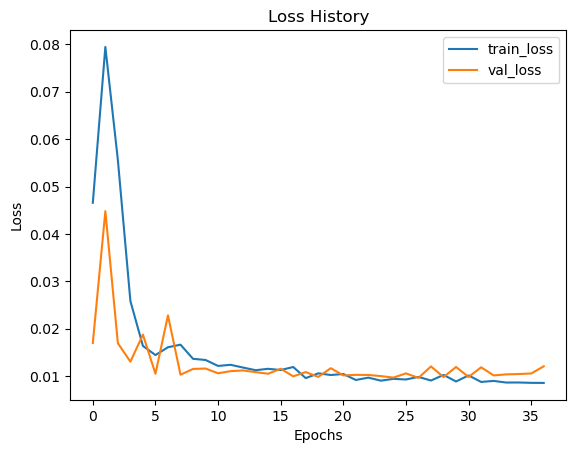

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

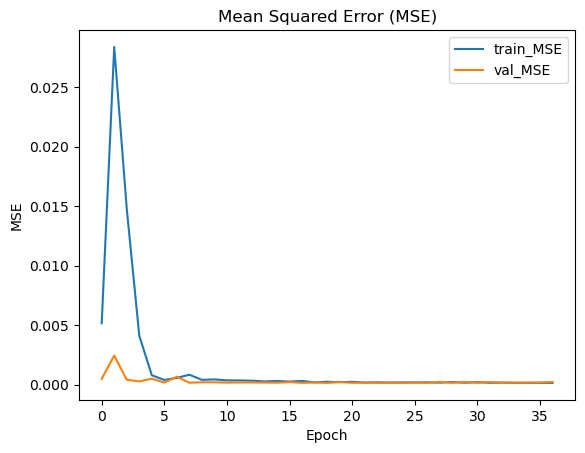

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

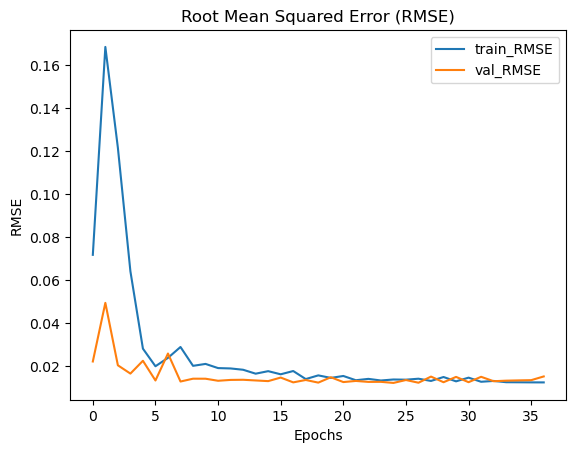

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

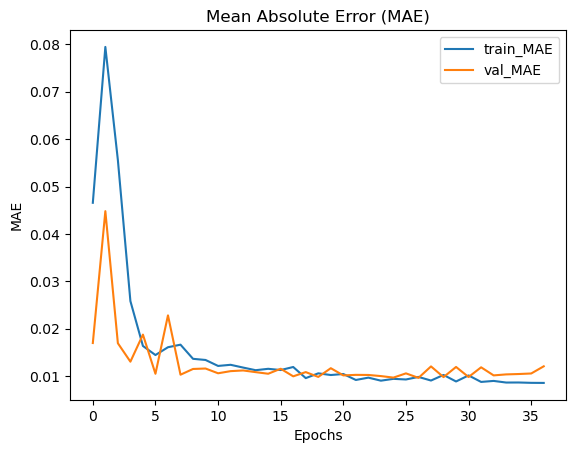

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

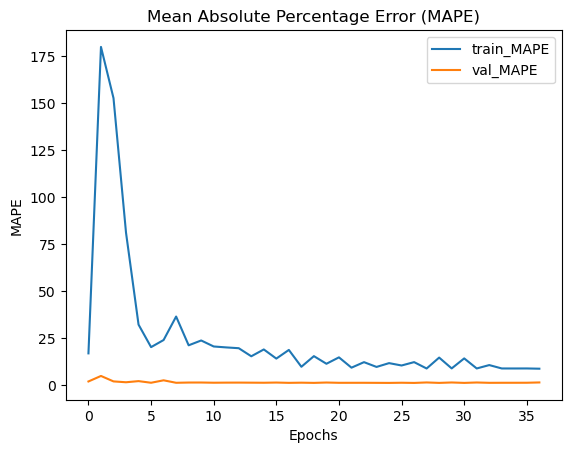

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:49:40.452787: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


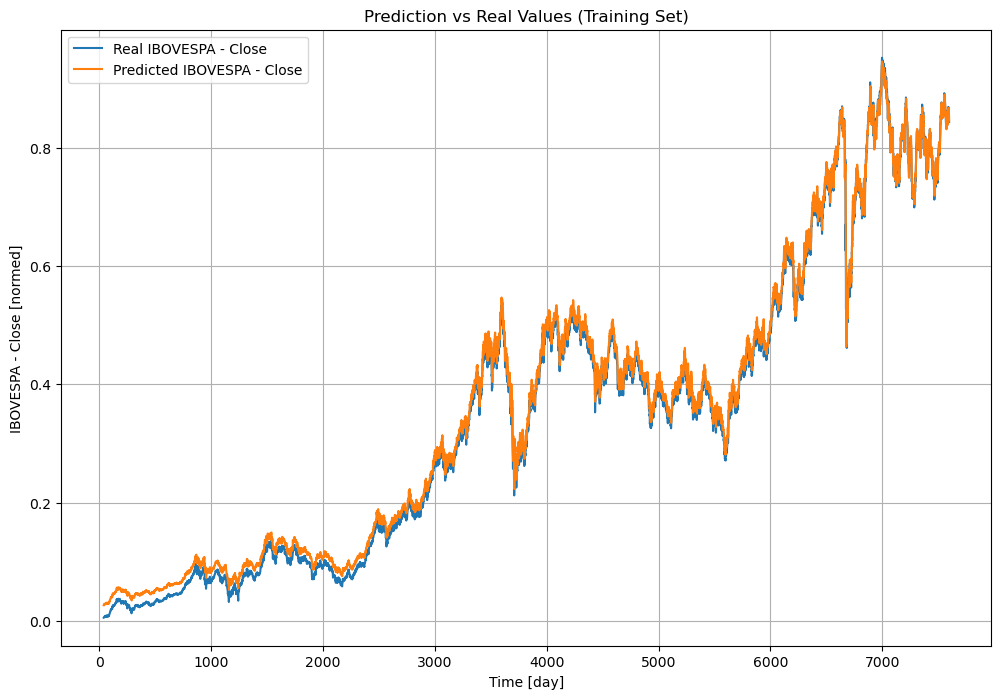

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


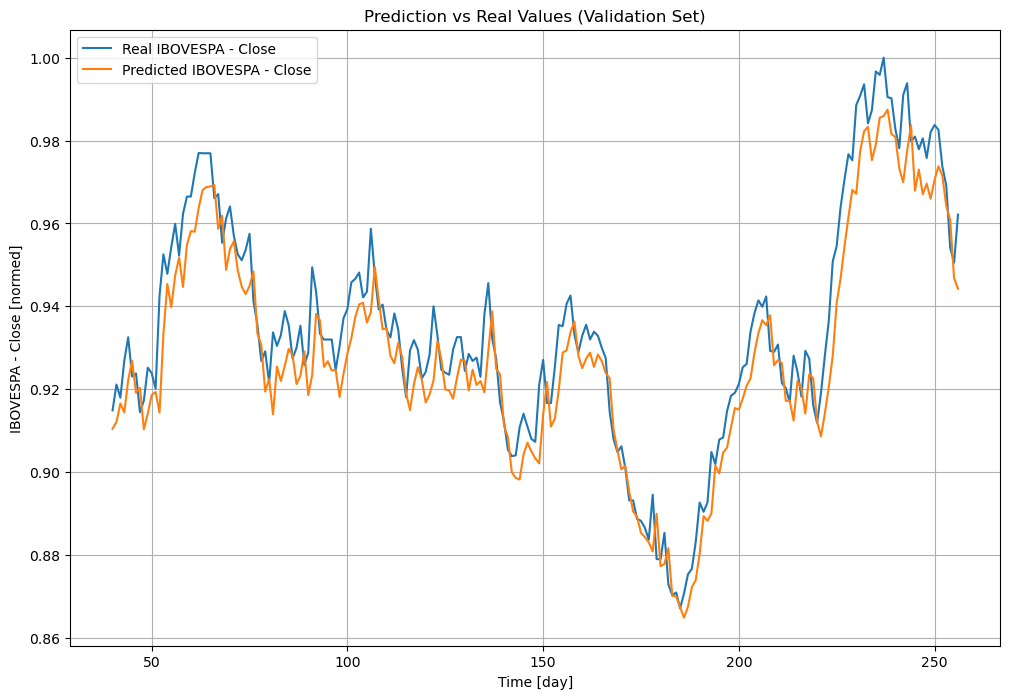

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


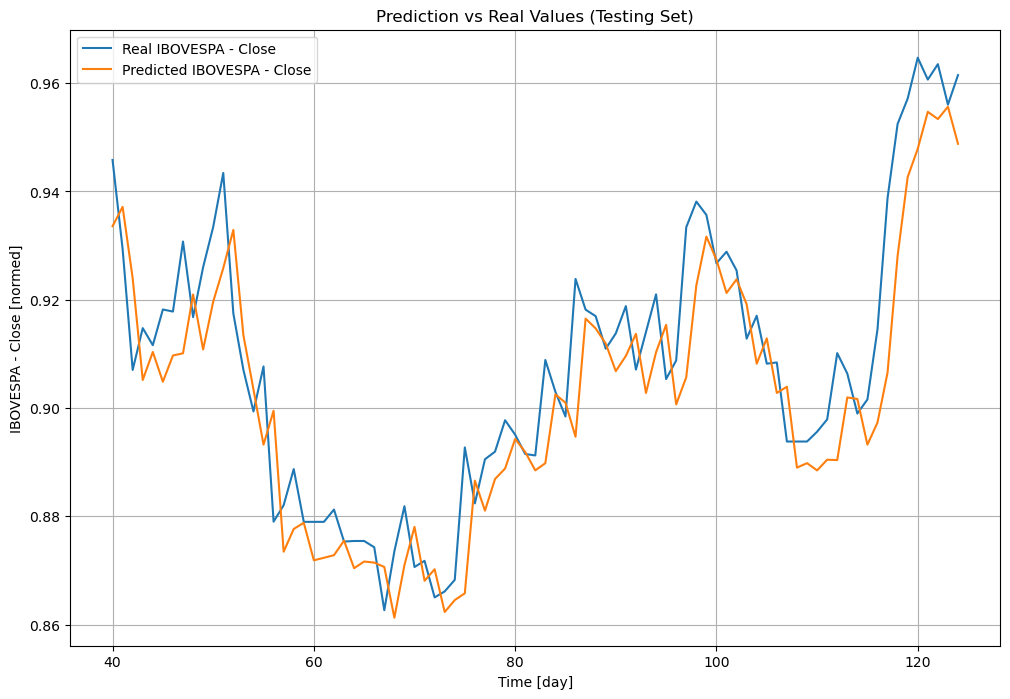

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

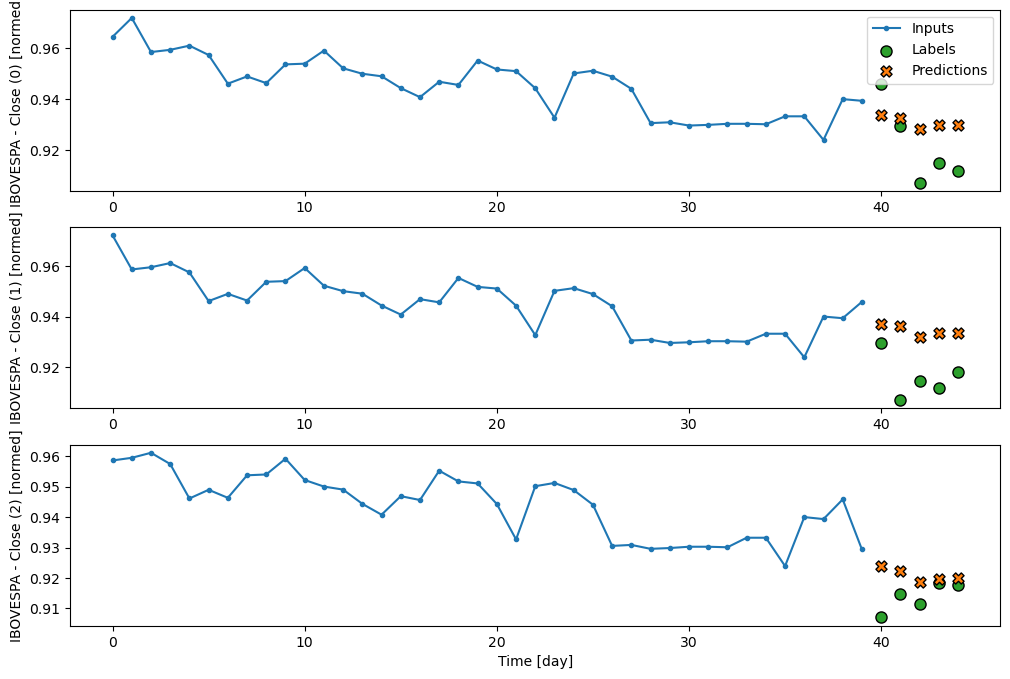

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:18s:405ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[[0.93357736, 0.93357736, 0.93357736, ..., 0.93357736,
         0.93357736, 0.93357736],
        [0.9325659 , 0.9325659 , 0.9325659 , ..., 0.9325659 ,
         0.9325659 , 0.9325659 ],
        [0.92824626, 0.92824626, 0.92824626, ..., 0.92824626,
         0.92824626, 0.92824626],
        [0.929963  , 0.929963  , 0.929963  , ..., 0.929963  ,
         0.929963  , 0.929963  ],
        [0.9298765 , 0.9298765 , 0.9298765 , ..., 0.9298765 ,
         0.92987657, 0.92987657]],

       [[0.93714666, 0.93714666, 0.93714666, ..., 0.93714666,
         0.93714666, 0.93714666],
        [0.93633544, 0.93633544, 0.93633544, ..., 0.93633544,
         0.93633544, 0.93633544],
        [0.9317889 , 0.9317889 , 0.9317889 , ..., 0.9317889 ,
         0.9317889 , 0.9317889 ],
        [0.93357956, 0.93357956, 0.93357956, ..., 0.93357956,
         0.93357956, 0.93357956],
        [0.9335241 , 0.9335241 , 0.9335241 , ..., 0.9335241 ,
         0.9335241 , 0.9335241 ]],

       [[0.9239545 , 0.9239545 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')